# **1. Data Loading and Libraries**
---

## **1.1 Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random
import warnings
import missingno as msno
import re
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler ,OrdinalEncoder,OneHotEncoder
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import KFold, cross_val_score,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from xgboost import XGBRegressor




In [ ]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## **1.2 Data Loading**

In [ ]:
df=pd.read_csv('zameen_homes_data_v1.csv')
df.head()

type                                              title          price  \
0  House                          E-7 Corner house for sale    PKR50 Crore   
1   Flat  470 Square Feet Flat For sale In Faisal Margal...   PKR42.3 Lakh   
2   Flat  Studio Apartment 270 Sq Ft Adjacent to TANDOOR...     PKR55 Lakh   
3  House  Unleash Your Style: Spectacular One Kanal Desi...  PKR11.5 Crore   
4   Flat  I-16/3 B Type Flat For Sale Ground Floor ADC P...   PKR1.1 Crore   

                                           location       area   purpose  \
0                 E-7, Islamabad, Islamabad Capital  2.4 Kanal  For Sale   
1                B-17, Islamabad, Islamabad Capital  2.1 Marla  For Sale   
2  Faisal Town - F-18, Islamabad, Islamabad Capital  1.2 Marla  For Sale   
3         DHA Defence, Islamabad, Islamabad Capital    1 Kanal  For Sale   
4                I-16, Islamabad, Islamabad Capital  6.6 Marla  For Sale   

  bedrooms bathrooms        added  \
0        4         5   2 days ago   
1        1         1  2 weeks ago   
2        -         1  4 weeks ago   
3        6         6   2 days ago   
4        4         4  2 weeks ago   

                                         description  built_in_year  floors  \
0  Marriott Estate And Builders Offer a Ideal Hou...         2023.0     NaN   
1  Welcome to Afridi Arcade, a dynamic fusion of ...            NaN     NaN   
2  Studio Apartment 270 Sq Ft Adjacent to TANDOOR...            NaN     NaN   
3  - Spacious one kanal house for sale in DHA Pha...         2024.0     NaN   
4  Properties, right now, are at the best rates s...         2022.0     6.0   

   furnished  electricity_backup  parking_spaces  flooring  \
0        NaN                 1.0             7.0       1.0   
1        1.0                 1.0             NaN       1.0   
2        NaN                 NaN             NaN       NaN   
3        1.0                 1.0             3.0       1.0   
4        1.0                 1.0             1.0       1.0   

   double_glazed_windows  central_air_conditioning  central_heating  \
0                    1.0                       1.0              1.0   
1                    1.0                       1.0              1.0   
2                    NaN                       NaN              NaN   
3                    1.0                       1.0              NaN   
4                    1.0                       1.0              1.0   

   waste_disposal  servant_quarters  drawing_room  dining_room  kitchens  \
0             NaN               2.0           1.0          1.0       2.0   
1             1.0               NaN           1.0          1.0       NaN   
2             NaN               NaN           NaN          NaN       NaN   
3             1.0               2.0           1.0          1.0       2.0   
4             1.0               1.0           1.0          1.0       1.0   

   study_room  prayer_room  powder_room  gym  store_rooms  steam_room  \
0         1.0          1.0          1.0  1.0          NaN         1.0   
1         1.0          1.0          1.0  1.0          NaN         1.0   
2         NaN          NaN          NaN  NaN          NaN         NaN   
3         1.0          1.0          1.0  1.0          2.0         1.0   
4         1.0          1.0          1.0  1.0          1.0         1.0   

   lounge_or_sitting_room  laundry_room  broadband_internet_access  \
0                     1.0           1.0                        1.0   
1                     1.0           1.0                        1.0   
2                     NaN           NaN                        NaN   
3                     1.0           1.0                        1.0   
4                     1.0           1.0                        1.0   

   satellite_or_cable_tv_ready  intercom  community_lawn_or_garden  \
0                          1.0       1.0                       1.0   
1                          1.0       NaN                       NaN   
2                          NaN       NaN             

In [ ]:
df.shape

(6526, 51)

In [ ]:
df.drop(columns={'title','purpose','added','description','flooring'},inplace=True)
df.head(1)


type        price                           location       area bedrooms  \
0  House  PKR50 Crore  E-7, Islamabad, Islamabad Capital  2.4 Kanal        4   

  bathrooms  built_in_year  floors  furnished  electricity_backup  \
0         5         2023.0     NaN        NaN                 1.0   

   parking_spaces  double_glazed_windows  central_air_conditioning  \
0             7.0                    1.0                       1.0   

   central_heating  waste_disposal  servant_quarters  drawing_room  \
0              1.0             NaN               2.0           1.0   

   dining_room  kitchens  study_room  prayer_room  powder_room  gym  \
0          1.0       2.0         1.0          1.0          1.0  1.0   

   store_rooms  steam_room  lounge_or_sitting_room  laundry_room  \
0          NaN         1.0                     1.0           1.0   

   broadband_internet_access  satellite_or_cable_tv_ready  intercom  \
0                        1.0                          1.0       1.0   

   community_lawn_or_garden  community_swimming_pool  community_gym  \
0                       1.0                      NaN            1.0   

   first_aid_or_medical_centre  day_care_centre  kids_play_area  \
0                          1.0              1.0             1.0   

   barbeque_area  mosque  community_centre  lawn_or_garden  swimming_pool  \
0            1.0     1.0               1.0             1.0            NaN   

   sauna  jacuzzi  maintenance_staff  security_staff  facilities_for_disabled  
0    1.0      1.0                1.0             1.0                      1.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6526 entries, 0 to 6525
Data columns (total 46 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   type                         6526 non-null   object 
 1   price                        6526 non-null   object 
 2   location                     6526 non-null   object 
 3   area                         6526 non-null   object 
 4   bedrooms                     6526 non-null   object 
 5   bathrooms                    6526 non-null   object 
 6   built_in_year                4426 non-null   float64
 7   floors                       1586 non-null   float64
 8   furnished                    2389 non-null   float64
 9   electricity_backup           4676 non-null   float64
 10  parking_spaces               4826 non-null   float64
 11  double_glazed_windows        4608 non-null   float64
 12  central_air_conditioning     3990 non-null   float64
 13  central_heating   

# **2. Data Preprocessing V1**
---

## **2.1 Null values Checking**

In [ ]:
df.isnull().sum()

type                              0
price                             0
location                          0
area                              0
bedrooms                          0
bathrooms                         0
built_in_year                  2100
floors                         4940
furnished                      4137
electricity_backup             1850
parking_spaces                 1700
double_glazed_windows          1918
central_air_conditioning       2536
central_heating                2714
waste_disposal                 1962
servant_quarters               2935
drawing_room                   1614
dining_room                    1673
kitchens                       1660
study_room                     2790
prayer_room                    2900
powder_room                    2395
gym                            2160
store_rooms                    2966
steam_room                     3180
lounge_or_sitting_room         1791
laundry_room                   2093
broadband_internet_access   

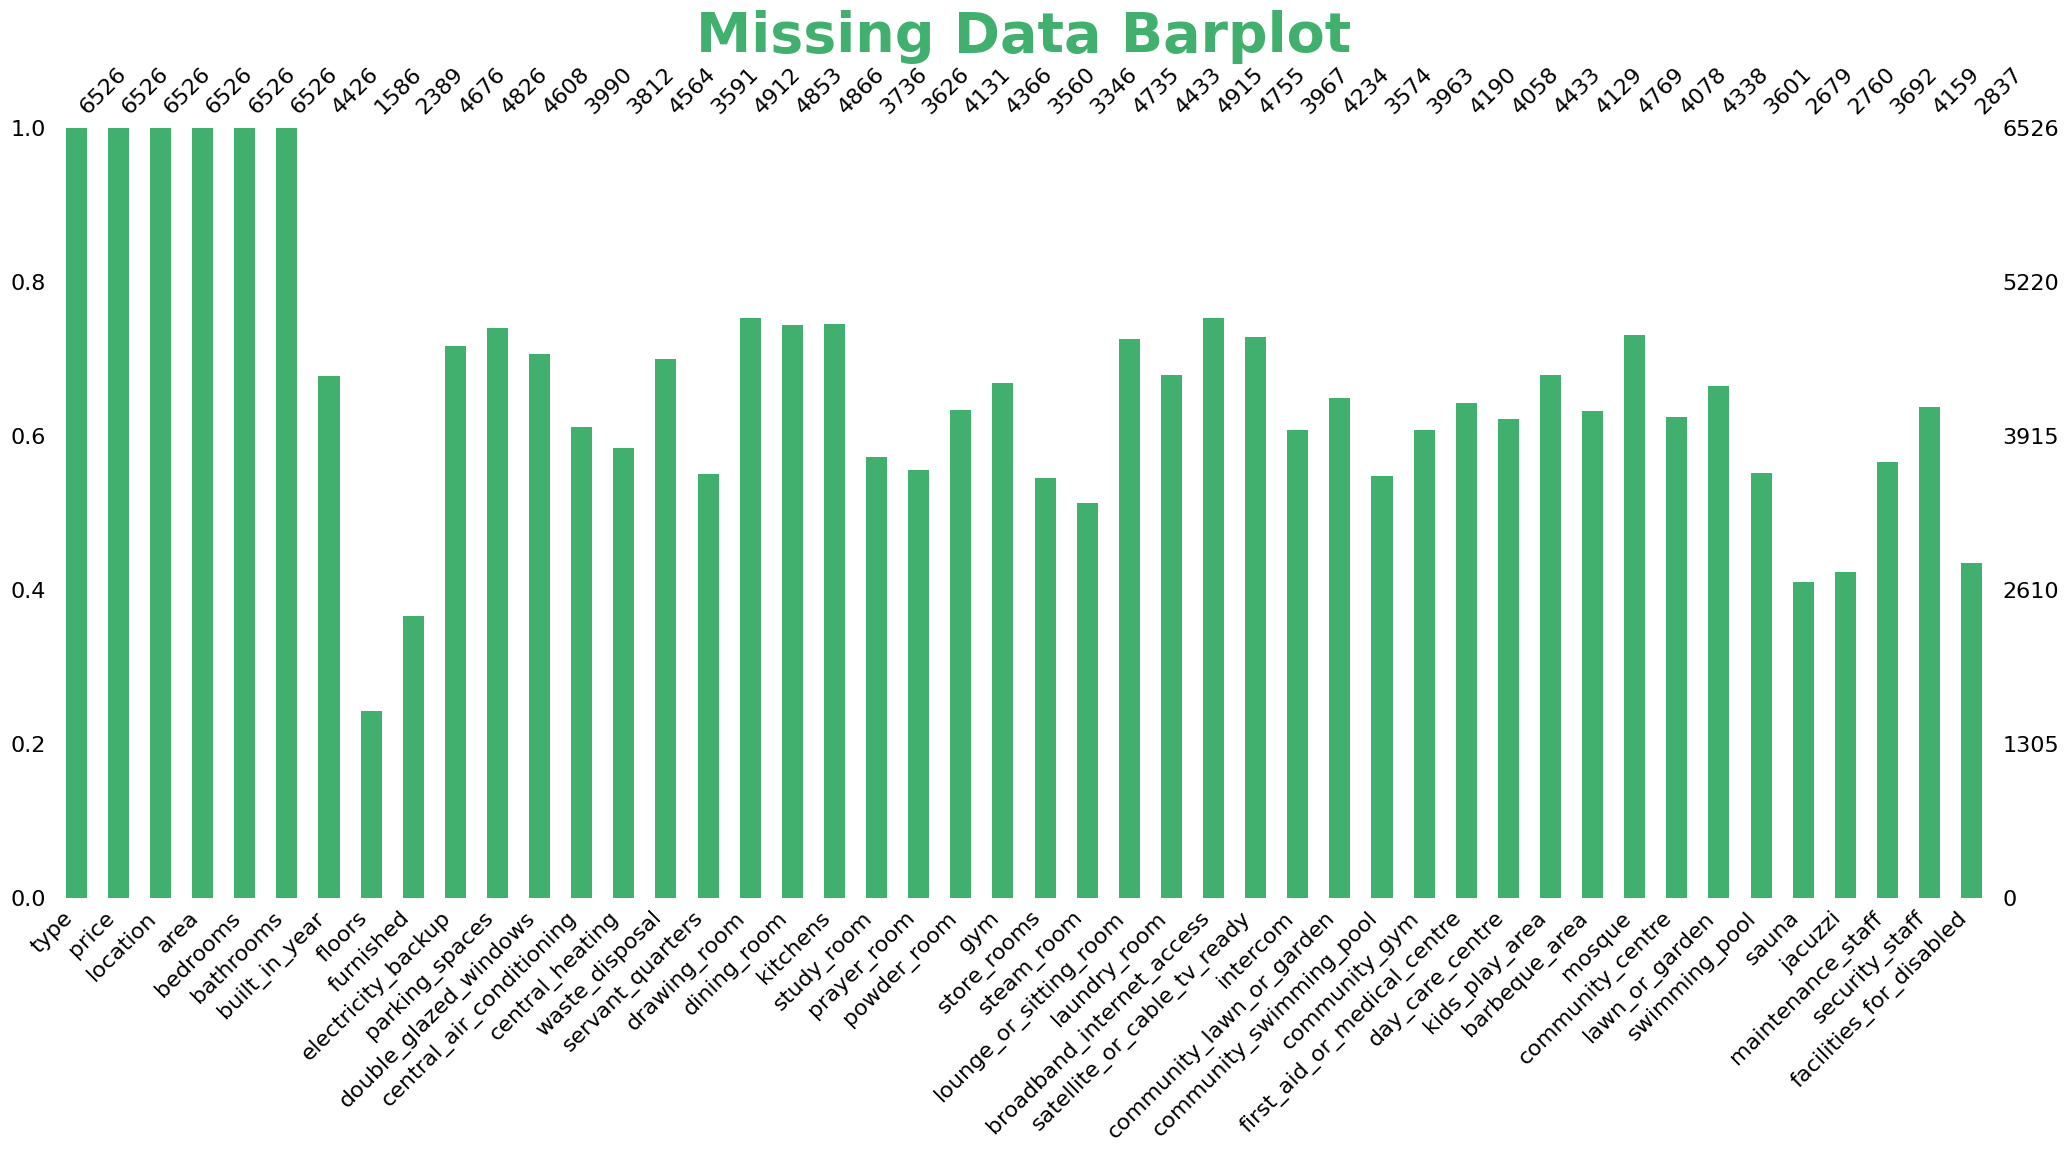

In [ ]:
msno.bar(df, color="#41B06E")
plt.title('Missing Data Barplot', fontsize=40, fontweight='bold', color='#41B06E')
plt.show()

## **2.2 Data Cleaning**

### **2.2.1 Handling Type Column**

In [ ]:
df['type'].value_counts()

type
House    3379
Flat     3147
Name: count, dtype: int64

In [ ]:
df['type'].unique()

array(['House', 'Flat'], dtype=object)

### **2.2.2 Handling Price Column**

In [ ]:
df['price'].value_counts()

price
PKR1.5 Crore      115
PKR1.1 Crore       92
PKR3.5 Crore       89
PKR2.5 Crore       82
PKR1.6 Crore       81
                 ... 
PKR56.75 Crore      1
PKR15.39 Crore      1
PKR10.7 Crore       1
PKR1.11 Crore       1
PKR5.91 Crore       1
Name: count, Length: 679, dtype: int64

In [ ]:
df['price'].unique()

array(['PKR50 Crore', 'PKR42.3 Lakh', 'PKR55 Lakh', 'PKR11.5 Crore',
       'PKR1.1 Crore', 'PKR1.63 Crore', 'PKR50 Lakh', 'PKR3.2 Crore',
       'PKR1.65 Crore', 'PKR2.55 Crore', 'PKR1.75 Crore', 'PKR78 Lakh',
       'PKR1.15 Crore', 'PKR1.25 Crore', 'PKR11.25 Crore', 'PKR1.5 Crore',
       'PKR1.22 Crore', 'PKR4.1 Crore', 'PKR14 Crore', 'PKR60 Lakh',
       'PKR72 Lakh', 'PKR1.6 Crore', 'PKR1.57 Crore', 'PKR1.7 Crore',
       'PKR1 Arab', 'PKR18 Crore', 'PKR17.25 Crore', 'PKR10.5 Crore',
       'PKR20.23 Crore', 'PKR8.8 Crore', 'PKR1.9 Crore', 'PKR28 Crore',
       'PKR24 Crore', 'PKR16.5 Crore', 'PKR12.75 Crore', 'PKR2.25 Crore',
       'PKR32.92 Lakh', 'PKR3.45 Crore', 'PKR40 Lakh', 'PKR70 Crore',
       'PKR3.5 Crore', 'PKR9.2 Crore', 'PKR2.38 Crore', 'PKR90 Lakh',
       'PKR4 Crore', 'PKR75 Lakh', 'PKR3.6 Crore', 'PKR52 Lakh',
       'PKR80 Lakh', 'PKR1.85 Crore', 'PKR4.7 Crore', 'PKR15 Crore',
       'PKR2.2 Crore', 'PKR85 Lakh', 'PKR1.45 Crore', 'PKR1.94 Crore',
       'PKR36.

In [ ]:
df['price']=df['price'].str.replace('PKR',"")
def convert_to_crore(value):
  if "Lakh" in value:
    value = round(float(value.replace("Lakh", "")) / 100,2)
  elif "Crore" in value:
    value = round(float(value.replace("Crore", "")),2)
  elif "Arab" in value:
    value = round(float(value.replace("Arab", "")) * 100,2)
  return value

df['price'] = df['price'].apply(convert_to_crore)


In [ ]:
df['price'].unique()

array([50.0, 0.42, 0.55, 11.5, 1.1, 1.63, 0.5, 3.2, 1.65, 2.55, 1.75,
       0.78, 1.15, 1.25, 11.25, 1.5, 1.22, 4.1, 14.0, 0.6, 0.72, 1.6,
       1.57, 1.7, 100.0, 18.0, 17.25, 10.5, 20.23, 8.8, 1.9, 28.0, 24.0,
       16.5, 12.75, 2.25, 0.33, 3.45, 0.4, 70.0, 3.5, 9.2, 2.38, 0.9, 4.0,
       0.75, 3.6, 0.52, 0.8, 1.85, 4.7, 15.0, 2.2, 0.85, 1.45, 1.94, 0.37,
       41.0, 1.55, 2.08, 1.8, 11.0, 1.38, 3.35, 28.5, 5.3, 0.44, 7.0,
       40.0, 3.75, 4.8, 0.81, 3.7, 9.5, 5.65, 4.35, 5.35, 0.22, 0.68, 7.9,
       4.3, 5.45, 0.76, 30.0, 26.5, 0.62, 3.8, 6.5, 0.95, 4.25, 14.5, 8.5,
       6.0, 1.05, 12.5, 32.0, 7.85, 2.95, 8.75, 6.3, 2.5, 9.7, 0.38, 0.93,
       125.0, 0.98, 0.32, 10.85, 2.45, 4.75, 10.8, 0.36, 3.25, 25.5, 6.75,
       4.5, 5.25, 5.7, 0.77, 2.0, 1.2, 10.0, 18.5, 2.72, 0.39, 0.3, 2.4,
       7.3, 4.6, 2.7, 12.9, 36.0, 1.4, 3.65, 15.5, 7.5, 16.95, 13.6, 0.87,
       0.79, 2.58, 0.74, 10.6, 2.15, 1.78, 0.2, 0.65, 3.9, 3.15, 3.95,
       0.45, 2.75, 0.31, 19.0, 48.0, 13.0, 0.48,

In [ ]:
df['price'].dtype

dtype('O')

In [ ]:
df['price']=df['price'].astype(float)

### **2.2.3 Handling Location Column**

In [ ]:
df['location'].unique()

array(['E-7, Islamabad, Islamabad Capital',
       'B-17, Islamabad, Islamabad Capital',
       'Faisal Town - F-18, Islamabad, Islamabad Capital',
       'DHA Defence, Islamabad, Islamabad Capital',
       'I-16, Islamabad, Islamabad Capital',
       'Bahria Town, Islamabad, Islamabad Capital',
       'PWD Housing Scheme, Islamabad, Islamabad Capital',
       'G-10, Islamabad, Islamabad Capital',
       'Bani Gala, Islamabad, Islamabad Capital',
       'D-17, Islamabad, Islamabad Capital',
       'I-8, Islamabad, Islamabad Capital',
       'G-15, Islamabad, Islamabad Capital',
       'E-11, Islamabad, Islamabad Capital',
       'D-12, Islamabad, Islamabad Capital',
       'FECHS, Islamabad, Islamabad Capital',
       'Gulberg, Islamabad, Islamabad Capital',
       'G-11, Islamabad, Islamabad Capital',
       'F-6, Islamabad, Islamabad Capital',
       'F-10, Islamabad, Islamabad Capital',
       'G-13, Islamabad, Islamabad Capital',
       'Kashmir Highway, Islamabad, Islamabad Capita

In [ ]:
df["location"]=df['location'].str.split(",").str.get(0).str.strip()

In [ ]:
df['location'].unique()

array(['E-7', 'B-17', 'Faisal Town - F-18', 'DHA Defence', 'I-16',
       'Bahria Town', 'PWD Housing Scheme', 'G-10', 'Bani Gala', 'D-17',
       'I-8', 'G-15', 'E-11', 'D-12', 'FECHS', 'Gulberg', 'G-11', 'F-6',
       'F-10', 'G-13', 'Kashmir Highway', 'Blue Area', 'I-10', 'GT Road',
       'G-6', 'F-8', 'C-18', 'Karakoram Diplomatic Enclave', 'H-13',
       'F-11', 'Multi Residencia & Orchards', 'F-7', 'G-16',
       'Soan Garden', 'Diplomatic Enclave', 'Jinnah Avenue', 'CBR Town',
       'Ghauri Town', 'Korang Town', 'Ali Pur', 'Shah Allah Ditta',
       'Pakistan Town', 'I-12', 'River Garden', 'G-8', 'F-15', 'I-14',
       'Main Margalla Road', 'PWD Road', 'G-14',
       'Sanam Garden Housing Scheme', 'Top City 1', 'Chak Shahzad',
       'National Police Foundation O-9', 'Kuri Road', 'G-9',
       'Karakoram Enclave 1', 'D-18', 'Islamabad Expressway', 'F-17',
       'Park Enclave', 'I-9', 'Airport Enclave', 'Naval Anchorage',
       'Park View City', 'Tarnol', 'Zaraj Housing Schem

### **2.2.4 Handling Area Column**

In [ ]:
df['area'].unique()

array(['2.4 Kanal', '2.1 Marla', '1.2 Marla', '1 Kanal', '6.6 Marla',
       '5.6 Marla', '2.9 Marla', '8 Marla', '4 Marla', '10 Marla',
       '5 Marla', '4.7 Marla', '3.9 Marla', '4.8 Marla', '3.6 Marla',
       '10.2 Marla', '10.9 Marla', '4.4 Marla', '5.5 Marla', '1.6 Marla',
       '3.8 Kanal', '14.2 Marla', '2 Kanal', '8.3 Marla', '7.9 Marla',
       '6 Marla', '4.2 Marla', '5.8 Marla', '1.4 Marla', '2.4 Marla',
       '1.6 Kanal', '1.9 Marla', '9.6 Marla', '17.8 Marla', '4 Kanal',
       '2 Marla', '11.1 Marla', '1.8 Marla', '12.4 Marla', '3.2 Marla',
       '7.6 Marla', '3.8 Marla', '3 Marla', '1.5 Marla', '1.3 Kanal',
       '6.9 Marla', '9.1 Marla', '12.7 Marla', '1.2 Kanal', '12 Marla',
       '6.5 Marla', '2.8 Marla', '7 Marla', '9.3 Marla', '11.7 Marla',
       '3.3 Marla', '3.4 Marla', '13.3 Marla', '14 Marla', '5.1 Marla',
       '7.8 Marla', '8.7 Marla', '1.1 Kanal', '2.2 Marla', '7.3 Marla',
       '2.6 Marla', '4.8 Kanal', '6.4 Marla', '8.2 Marla', '15 Marla',
       

In [ ]:
def  convert_to_marla(value):
  if "Marla" in value:
    value = float(value.replace("Marla", ""))
  elif "Kanal" in value:
    value = float(value.replace("Kanal", "")) * 20
  return value

df['area'] = df['area'].apply(convert_to_marla)


In [ ]:
df['area'].unique()

array([4.80e+01, 2.10e+00, 1.20e+00, 2.00e+01, 6.60e+00, 5.60e+00,
       2.90e+00, 8.00e+00, 4.00e+00, 1.00e+01, 5.00e+00, 4.70e+00,
       3.90e+00, 4.80e+00, 3.60e+00, 1.02e+01, 1.09e+01, 4.40e+00,
       5.50e+00, 1.60e+00, 7.60e+01, 1.42e+01, 4.00e+01, 8.30e+00,
       7.90e+00, 6.00e+00, 4.20e+00, 5.80e+00, 1.40e+00, 2.40e+00,
       3.20e+01, 1.90e+00, 9.60e+00, 1.78e+01, 8.00e+01, 2.00e+00,
       1.11e+01, 1.80e+00, 1.24e+01, 3.20e+00, 7.60e+00, 3.80e+00,
       3.00e+00, 1.50e+00, 2.60e+01, 6.90e+00, 9.10e+00, 1.27e+01,
       2.40e+01, 1.20e+01, 6.50e+00, 2.80e+00, 7.00e+00, 9.30e+00,
       1.17e+01, 3.30e+00, 3.40e+00, 1.33e+01, 1.40e+01, 5.10e+00,
       7.80e+00, 8.70e+00, 2.20e+01, 2.20e+00, 7.30e+00, 2.60e+00,
       9.60e+01, 6.40e+00, 8.20e+00, 1.50e+01, 4.90e+00, 5.20e+00,
       6.70e+00, 4.30e+00, 3.10e+00, 6.10e+00, 1.30e+00, 1.70e+00,
       7.50e+00, 5.30e+00, 2.30e+00, 3.60e+01, 8.40e+00, 1.01e+01,
       2.70e+00, 9.00e-01, 4.10e+00, 4.20e+01, 7.10e+00, 8.50e

In [ ]:
df['area'].dtype

dtype('float64')

### **2.2.5 Handling Bedrooms Column**

In [ ]:
df['bedrooms'].unique()

array(['4', '1', '-', '6', '2', '3', '5', '7', '9', '10', '8', '11'],
      dtype=object)

In [ ]:
df[df['bedrooms']=='-']['type'].value_counts()

type
Flat     291
House    141
Name: count, dtype: int64

In [ ]:
df['bedrooms'].mode()[0]

'2'

In [ ]:
df.loc[df['bedrooms'] == '-', 'bedrooms'] = np.NaN

In [ ]:
df['bedrooms'].unique()

array(['4', '1', nan, '6', '2', '3', '5', '7', '9', '10', '8', '11'],
      dtype=object)

In [ ]:
df['bedrooms'].isnull().sum()

432

In [ ]:
df['bedrooms']=df['bedrooms'].fillna(0).astype('int')

In [ ]:
df['bedrooms'] = np.where(df['bedrooms'] == 0, np.NaN, df['bedrooms'])

In [ ]:
df['bedrooms'].isnull().sum()

432

In [ ]:
df.shape

(6526, 46)

### **2.2.6 Handling Bathrooms Column**

In [ ]:
df['bathrooms'].unique()

array(['5', '1', '6', '4', '2', '3', '-', '10', '8', '7', '9'],
      dtype=object)

In [ ]:
df[df['bathrooms']=='-']

type  price                     location  area  bedrooms bathrooms  \
39     Flat   0.33                         C-18   1.4       NaN         -   
67     Flat   0.37  Multi Residencia & Orchards   1.5       NaN         -   
68    House  41.00                          F-7  26.0       9.0         -   
104    Flat   0.85                  DHA Defence   3.6       NaN         -   
116    Flat   0.60  Multi Residencia & Orchards   3.6       NaN         -   
...     ...    ...                          ...   ...       ...       ...   
6463   Flat   1.05                  DHA Defence   3.6       1.0         -   
6486   Flat   1.37                  DHA Defence   3.9       NaN         -   
6491   Flat   0.32  Multi Residencia & Orchards   1.3       NaN         -   
6494  House  12.50                         E-11  20.0       7.0         -   
6503   Flat   2.80                  Bahria Town   9.6       3.0         -   

      built_in_year  floors  furnished  electricity_backup  parking_spaces  \
39              NaN     NaN        1.0                 1.0             NaN   
67              NaN     NaN        1.0                 1.0             NaN   
68           2024.0     NaN        1.0                 1.0             1.0   
104             NaN     NaN        NaN                 1.0             NaN   
116             NaN     NaN        NaN                 NaN             NaN   
...             ...     ...        ...                 ...             ...   
6463            NaN     NaN        NaN                 1.0             NaN   
6486         2022.0     NaN        NaN                 1.0            20.0   
6491            NaN     NaN        1.0                 1.0             NaN   
6494            5.0     NaN        1.0                 1.0             1.0   
6503            NaN     NaN        NaN                 1.0             NaN   

      double_glazed_windows  central_air_conditioning  central_heating  \
39                      1.0                       1.0              1.0   
67                      1.0                       1.0              1.0   
68                      1.0                       1.0              1.0   
104                     1.0                       1.0              1.0   
116                     NaN                       NaN              NaN   
...                     ...                       ...              ...   
6463                    NaN                       NaN              NaN   
6486                    NaN                       1.0              1.0   
6491                    1.0                       1.0              1.0   
6494                    1.0                       1.0              1.0   
6503                    1.0                       1.0              1.0   

      waste_disposal  servant_quarters  drawing_room  dining_room  kitchens  \
39               1.0               NaN           1.0          1.0       NaN   
67               1.0               NaN           1.0          1.0       NaN   
68               1.0               1.0           1.0          1.0       1.0   
104              1.0               NaN           1.0          1.0       NaN   
116              NaN               NaN           NaN          NaN       NaN   
...              ...               ...           ...          ...       ...   
6463             NaN               NaN           NaN          NaN       NaN   
6486             1.0               NaN           NaN          NaN       NaN   
6491             1.0               NaN           1.0          1.0       NaN   
6494             1.0               1.0           1.0          1.0       1.0   
6503             NaN               NaN           1.0          1.0       NaN   

      study_room  prayer_room  powder_room  gym  store_rooms  steam_room  \
39           1.0          1.0          1.0  1.0          NaN         1.0   
67           1.0          1.0          1.0  1.0          NaN         1.0   
68           1.0          1.0          1.0  1.0          1.0         1.0   
104

In [ ]:
df[df['bathrooms']=='-']['type'].value_counts()

type
House    344
Flat     212
Name: count, dtype: int64

In [ ]:
df['bathrooms'].mode()[0]

'6'

In [ ]:
df.loc[df['bathrooms'] == '-', 'bathrooms'] = np.NaN

In [ ]:
df['bathrooms'].unique()

array(['5', '1', '6', '4', '2', '3', nan, '10', '8', '7', '9'],
      dtype=object)

In [ ]:
df['bathrooms'].isnull().sum()

556

In [ ]:
df['bathrooms']=df['bathrooms'].fillna(0).astype('int')

In [ ]:
df['bathrooms'] = np.where(df['bathrooms'] == 0, np.NaN, df['bathrooms'])

In [ ]:
df['bathrooms'].isnull().sum()

556

In [ ]:
df['bathrooms'].dtype

dtype('float64')

### **2.2.7 Handling Built In Year Column**

In [ ]:
df['built_in_year'].dtype

dtype('float64')

In [ ]:
df['built_in_year'].value_counts()

built_in_year
2023.0    1319
2024.0     908
1.0        352
2022.0     319
2020.0     195
          ... 
2121.0       1
1986.0       1
3400.0       1
1992.0       1
1010.0       1
Name: count, Length: 72, dtype: int64

In [ ]:
df['built_in_year'].unique()

array([2.02300e+03,         nan, 2.02400e+03, 2.02200e+03, 2.01300e+03,
       2.01500e+03, 2.02100e+03, 1.00000e+00, 2.02000e+03, 2.02700e+03,
       1.98000e+03, 7.00000e+00, 3.00000e+00, 2.01900e+03, 1.99000e+03,
       1.99600e+03, 2.02600e+03, 2.01600e+03, 2.01000e+03, 2.01800e+03,
       2.00100e+03, 2.01700e+03, 2.00800e+03, 2.00900e+03, 2.02500e+03,
       1.99900e+03, 2.00000e+00, 5.00000e+00, 2.00000e+03, 1.98800e+03,
       2.01100e+03, 6.00000e+00, 1.98500e+03, 0.00000e+00, 4.00000e+00,
       3.35000e+03, 2.01200e+03, 2.01400e+03, 2.02800e+03, 2.00500e+03,
       1.99500e+03, 1.99300e+03, 8.00000e+00, 1.99800e+03, 1.00000e+01,
       2.00600e+03, 2.50000e+00, 2.00000e+02, 3.40000e+03, 1.90000e+01,
       2.10000e+02, 2.00300e+03, 2.00400e+03, 1.99200e+03, 2.02230e+04,
       1.98600e+03, 2.12100e+03, 1.97000e+03, 2.00200e+03, 1.99100e+03,
       2.02223e+05, 9.00000e+00, 1.01000e+03, 1.80000e+01, 2.50000e+01,
       1.50000e+01, 2.00700e+03, 2.02019e+05, 1.99400e+03, 3.500

In [ ]:
def convert_to_year(value):
   if value < 1950 or value>=2025:
        value=np.NaN
   return value



In [ ]:
df['built_in_year'] = df['built_in_year'].apply(convert_to_year)

In [ ]:
df['built_in_year'].unique()

array([2023.,   nan, 2024., 2022., 2013., 2015., 2021., 2020., 1980.,
       2019., 1990., 1996., 2016., 2010., 2018., 2001., 2017., 2008.,
       2009., 1999., 2000., 1988., 2011., 1985., 2012., 2014., 2005.,
       1995., 1993., 1998., 2006., 2003., 2004., 1992., 1986., 1970.,
       2002., 1991., 2007., 1994.])

### **2.2.8 Handling Floors Column**

In [ ]:
df['floors'].dtype

dtype('float64')

In [ ]:
df['floors'].value_counts()

floors
1.0       603
3.0       190
4.0       159
2.0       155
5.0       145
6.0        76
7.0        67
8.0        42
10.0       26
9.0        24
18.0       18
11.0       14
0.0        10
13.0        8
12.0        8
21.0        6
16.0        6
17.0        6
19.0        4
14.0        4
30.0        3
15.0        3
22.0        2
20.0        2
39.0        1
1014.0      1
51.0        1
32.0        1
26.0        1
Name: count, dtype: int64

In [ ]:
df['floors'].unique()

array([      nan, 6.000e+00, 1.000e+00, 4.000e+00, 5.000e+00, 7.000e+00,
       2.000e+00, 1.800e+01, 3.000e+00, 8.000e+00, 9.000e+00, 1.200e+01,
       1.100e+01, 0.000e+00, 3.200e+01, 1.014e+03, 1.300e+01, 2.100e+01,
       1.600e+01, 1.000e+01, 1.700e+01, 1.900e+01, 3.000e+01, 5.100e+01,
       1.400e+01, 1.500e+01, 2.000e+01, 3.900e+01, 2.200e+01, 2.600e+01])

### **2.2.9 Positions Changings**

In [ ]:
parking = df.pop('parking_spaces')
df.insert(7, 'parking_spaces', parking)


In [ ]:
servent = df.pop('servant_quarters')
df.insert(8, 'servant_quarters', servent)

In [ ]:
kitchens = df.pop('kitchens')
df.insert(7, 'kitchens', kitchens)

In [ ]:
storeRoom = df.pop('store_rooms')
df.insert(9, 'store_rooms', storeRoom)

In [ ]:
df.head()

type  price            location  area  bedrooms  bathrooms  built_in_year  \
0  House  50.00                 E-7  48.0       4.0        5.0         2023.0   
1   Flat   0.42                B-17   2.1       1.0        1.0            NaN   
2   Flat   0.55  Faisal Town - F-18   1.2       NaN        1.0            NaN   
3  House  11.50         DHA Defence  20.0       6.0        6.0         2024.0   
4   Flat   1.10                I-16   6.6       4.0        4.0         2022.0   

   kitchens  parking_spaces  store_rooms  servant_quarters  floors  furnished  \
0       2.0             7.0          NaN               2.0     NaN        NaN   
1       NaN             NaN          NaN               NaN     NaN        1.0   
2       NaN             NaN          NaN               NaN     NaN        NaN   
3       2.0             3.0          2.0               2.0     NaN        1.0   
4       1.0             1.0          1.0               1.0     6.0        1.0   

   electricity_backup  double_glazed_windows  central_air_conditioning  \
0                 1.0                    1.0                       1.0   
1                 1.0                    1.0                       1.0   
2                 NaN                    NaN                       NaN   
3                 1.0                    1.0                       1.0   
4                 1.0                    1.0                       1.0   

   central_heating  waste_disposal  drawing_room  dining_room  study_room  \
0              1.0             NaN           1.0          1.0         1.0   
1              1.0             1.0           1.0          1.0         1.0   
2              NaN             NaN           NaN          NaN         NaN   
3              NaN             1.0           1.0          1.0         1.0   
4              1.0             1.0           1.0          1.0         1.0   

   prayer_room  powder_room  gym  steam_room  lounge_or_sitting_room  \
0          1.0          1.0  1.0         1.0                     1.0   
1          1.0          1.0  1.0         1.0                     1.0   
2          NaN          NaN  NaN         NaN                     NaN   
3          1.0          1.0  1.0         1.0                     1.0   
4          1.0          1.0  1.0         1.0                     1.0   

   laundry_room  broadband_internet_access  satellite_or_cable_tv_ready  \
0           1.0                        1.0                          1.0   
1           1.0                        1.0                          1.0   
2           NaN                        NaN                          NaN   
3           1.0                        1.0                          1.0   
4           1.0                        1.0                          1.0   

   intercom  community_lawn_or_garden  community_swimming_pool  community_gym  \
0       1.0                       1.0                      NaN            1.0   
1       NaN                       NaN                      NaN            NaN   
2       NaN                       NaN                      NaN            NaN   
3       1.0                       1.0                      1.0            1.0   
4       1.0                       1.0                      1.0            1.0   

   first_aid_or_medical_centre  day_care_centre  kids_play_area  \
0                          1.0              1.0             1.0   
1                          NaN              NaN             NaN   
2                          NaN              NaN             NaN   
3                          1.0              1.0             1.0   
4                          1.0              1.0             1.0   

   barbeque_area  mosque  community_centre  lawn_or_garden  swimming_pool  \
0            1.0     1.0               1.0             1.0            NaN   
1            NaN     1.0               NaN             NaN            NaN   
2            NaN     NaN               NaN             NaN            NaN   
3            1.0     1.0               1

### **2.2.10 Handling Kitchens Column**

In [ ]:
df['kitchens'].unique()

array([ 2., nan,  1.,  3., 20.,  0.,  4.,  6.,  5., 11., 21., 23.])

In [ ]:
df[df['kitchens']>4]

type  price     location  area  bedrooms  bathrooms  built_in_year  \
276   House   4.70         G-14   5.0       4.0        5.0         2023.0   
1658  House  82.00          F-8  80.0      10.0        6.0         2023.0   
2982  House  16.90  DHA Defence  30.0       5.0        NaN         2023.0   
3779   Flat   2.75  DHA Defence  14.2       4.0        4.0         2018.0   
4570  House  14.50         G-13  20.0       8.0        6.0         2018.0   
4945   Flat   1.25         G-13   7.8       3.0        3.0         2019.0   
6358  House   2.38  Bahria Town   5.0       3.0        5.0         2023.0   
6514  House   3.80  DHA Defence  14.0       5.0        5.0         2023.0   

      kitchens  parking_spaces  store_rooms  servant_quarters  floors  \
276       20.0             1.0          NaN               1.0     NaN   
1658       6.0            25.0          3.0               6.0     NaN   
2982       5.0             4.0          2.0               2.0     NaN   
3779      11.0             1.0          1.0               1.0    18.0   
4570      21.0             4.0          1.0               1.0     NaN   
4945      11.0             1.0          1.0               1.0     1.0   
6358      23.0             1.0          1.0               1.0     NaN   
6514      21.0             2.0          1.0               1.0     NaN   

      furnished  electricity_backup  double_glazed_windows  \
276         NaN                 1.0                    1.0   
1658        NaN                 1.0                    NaN   
2982        1.0                 1.0                    1.0   
3779        NaN                 1.0                    1.0   
4570        NaN                 1.0                    1.0   
4945        1.0                 1.0                    1.0   
6358        NaN                 1.0                    NaN   
6514        1.0                 1.0                    1.0   

      central_air_conditioning  central_heating  waste_disposal  drawing_room  \
276                        1.0              1.0             1.0           1.0   
1658                       NaN              NaN             NaN           NaN   
2982                       1.0              1.0             1.0           1.0   
3779                       NaN              NaN             1.0           1.0   
4570                       1.0              1.0             1.0           1.0   
4945                       1.0              1.0             1.0           1.0   
6358                       NaN              NaN             1.0           1.0   
6514                       1.0              1.0             1.0           NaN   

      dining_room  study_room  prayer_room  powder_room  gym  steam_room  \
276           1.0         1.0          1.0          1.0  1.0         1.0   
1658          NaN         NaN          NaN          NaN  NaN         NaN   
2982          1.0         1.0          1.0          1.0  1.0         1.0   
3779          1.0         1.0          NaN          1.0  1.0         1.0   
4570          1.0         1.0          1.0          1.0  1.0         1.0   
4945          1.0         1.0          1.0          1.0  1.0         1.0   
6358          1.0         NaN          1.0          1.0  1.0         NaN   
6514          NaN         NaN          NaN          NaN  NaN         NaN   

      lounge_or_sitting_room  laundry_room  broadband_internet_access  \
276                      1.0           1.0                        1.0   
1658                     NaN           NaN                        NaN   
2982                     1.0           1.0                        1.0   
3779                     NaN           1.0                        1.0   
4570                     1.0           1.0                        1.0   
4945                     1.0           1.0                        1.0   
6358                     1.0           1.0                        1.0   
6514                     NaN           NaN                        NaN   

      satellite_or_cabl

### **2.2.11 Handling Parking Spaces Column**

In [ ]:
df['parking_spaces'].value_counts()

parking_spaces
1.0       2467
2.0        949
3.0        654
4.0        291
5.0        136
7.0        110
6.0         68
10.0        36
8.0         31
250.0       20
12.0        12
9.0          9
0.0          7
50.0         4
15.0         3
100.0        3
20.0         3
500.0        3
300.0        2
200.0        2
700.0        2
400.0        2
35.0         2
2.3          1
30.0         1
13.0         1
11.0         1
22.0         1
1600.0       1
800.0        1
90.0         1
25.0         1
14.0         1
Name: count, dtype: int64

### **2.2.12 Handling Store Rooms Column**

In [ ]:
df['store_rooms'].value_counts()

store_rooms
1.0     2857
2.0      588
3.0       75
0.0       24
4.0       13
22.0       1
11.0       1
5.0        1
Name: count, dtype: int64

In [ ]:
df['store_rooms'].unique()

array([nan,  2.,  1.,  0.,  3.,  4., 22., 11.,  5.])

### **2.2.13 Handling Servant Quarters Column**

In [ ]:
df['servant_quarters'].value_counts()

servant_quarters
1.0     2473
2.0      981
3.0       71
0.0       45
4.0       10
12.0       3
11.0       3
5.0        2
6.0        1
31.0       1
32.0       1
Name: count, dtype: int64

In [ ]:
df['servant_quarters'].unique()

array([ 2., nan,  1.,  3.,  0.,  4.,  5.,  6., 12., 11., 31., 32.])

### **2.2.14 Handling Price Column**

In [ ]:
columns=df.columns[12:46]

for column in columns:
    print(column.ljust(30), "", df[column].unique())

furnished                       [nan  1.]
electricity_backup              [ 1. nan]
double_glazed_windows           [ 1. nan]
central_air_conditioning        [ 1. nan]
central_heating                 [ 1. nan]
waste_disposal                  [nan  1.]
drawing_room                    [ 1. nan]
dining_room                     [ 1. nan]
study_room                      [ 1. nan]
prayer_room                     [ 1. nan]
powder_room                     [ 1. nan]
gym                             [ 1. nan]
steam_room                      [ 1. nan]
lounge_or_sitting_room          [ 1. nan]
laundry_room                    [ 1. nan]
broadband_internet_access       [ 1. nan]
satellite_or_cable_tv_ready     [ 1. nan]
intercom                        [ 1. nan]
community_lawn_or_garden        [ 1. nan]
community_swimming_pool         [nan  1.]
community_gym                   [ 1. nan]
first_aid_or_medical_centre     [ 1. nan]
day_care_centre                 [ 1. nan]
kids_play_area                  [ 

## **2.3 Removing Dupliactes**

In [ ]:
df.duplicated().sum()

525

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(6001, 46)

# **3. Exploratory Data Analysis(EDA)**
---


## **3.1 Univariate Exploratory Data analysis**

### **3.1.1  Type Column**




In [ ]:
df['type'].isnull().sum()

0

In [ ]:
df['type'].value_counts().sum()

6001

In [ ]:
df['type'].value_counts()

type
House    3149
Flat     2852
Name: count, dtype: int64

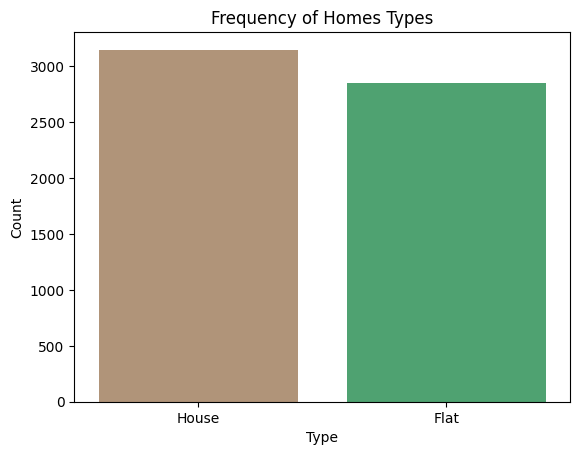

In [ ]:
palette=['#B99470','#41B06E']
sns.countplot(
    x="type",
    data=df,
    palette=palette
)
plt.title("Frequency of Homes Types")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

---
---
<h1><b>Observations</b></h1>
There are a total of 2 unique types in the dataset.

<h3><b>Distributions</b></h3>


* **Houses** There are  3149 Houses that are more then Flats in the data.
* **Flats:** Total counts of Flats are 2852.
<br>

Null value counts are:
* **Null Values:** 0

---
---

### **3.1.2  Price Column**

In [ ]:
df['price'].isnull().sum()

0

In [ ]:
df['price'].describe()

count    6001.000000
mean        8.800157
std        17.357457
min         0.180000
25%         1.400000
50%         3.250000
75%         9.400000
max       250.000000
Name: price, dtype: float64

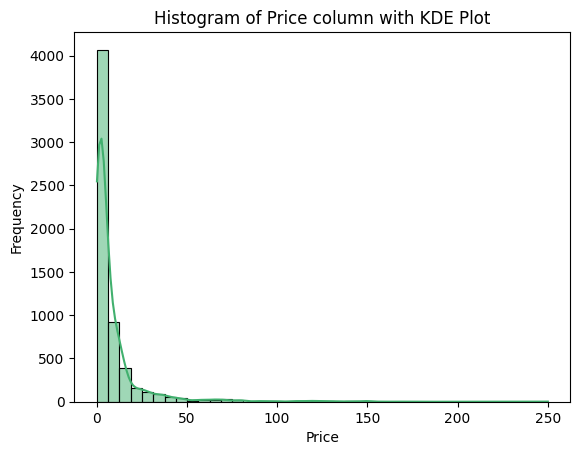

In [ ]:
sns.histplot(
    df['price'],
    kde=True,
    bins=40,
    color='#41B06E'
)
plt.title("Histogram of Price column with KDE Plot")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

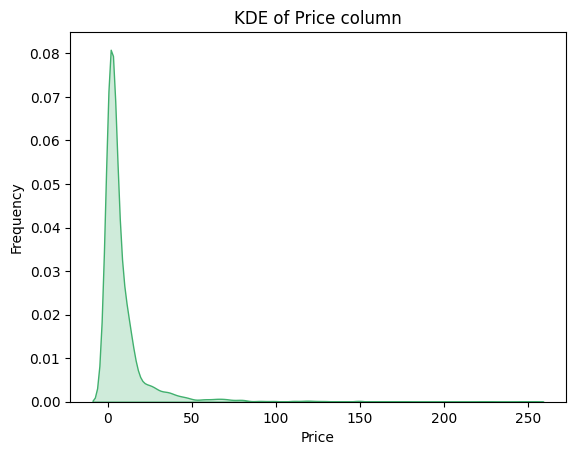

In [ ]:
sns.kdeplot(
    df['price'],
    fill=True,
    color='#41B06E'
)
plt.title("KDE of Price column")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


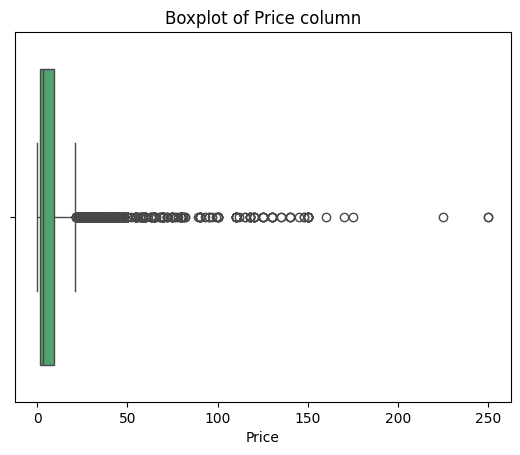

In [ ]:
sns.boxplot(
    x=df['price'],
    color='#41B06E'
)
plt.title("Boxplot of Price column")
plt.xlabel("Price")
plt.show()

In [ ]:
df['price'].describe()

count    6001.000000
mean        8.800157
std        17.357457
min         0.180000
25%         1.400000
50%         3.250000
75%         9.400000
max       250.000000
Name: price, dtype: float64

In [ ]:
skewness = df['price'].skew()
kurtosis = df['price'].kurt()

print(skewness,kurtosis)

5.334579413258151 39.67782775552644


In [ ]:
quantiles = df['price'].quantile([0.01, 0.05, 0.95, 0.99])
quantiles

0.01     0.33
0.05     0.55
0.95    35.00
0.99    93.00
Name: price, dtype: float64

In [ ]:
q1=df['price'].describe()[4]
q3=df['price'].describe()[6]

iqr=q3-q1
print("IQR is :",iqr)

IQR is : 8.0


In [ ]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(lower_bound, upper_bound)

-10.6 21.4


In [ ]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.shape

(565, 46)

In [ ]:
outliers['price'].describe()

count    565.000000
mean      49.580407
std       34.181312
min       21.500000
25%       27.000000
50%       36.000000
75%       60.000000
max      250.000000
Name: price, dtype: float64

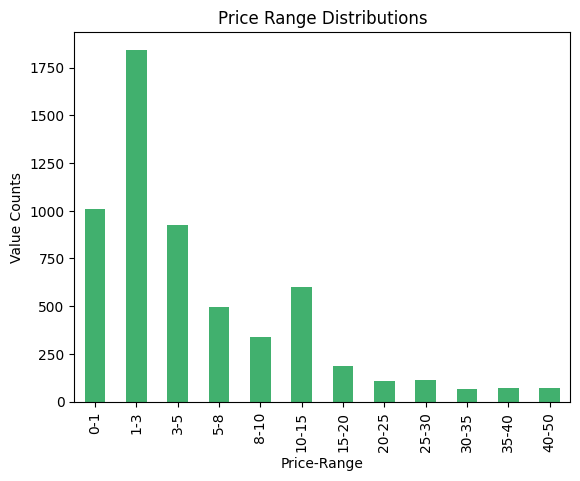

In [ ]:
bins = [0, 1, 3, 5, 8, 10,15,20,25,30,35,40,50]
bin_labels = ["0-1", "1-3", "3-5", "5-8", "8-10", "10-15", "15-20","20-25","25-30", "30-35", "35-40","40-50"]
pd.cut(
    df['price'],
    bins=bins,
    labels=bin_labels,
    right=False
).value_counts().sort_index().plot(kind='bar',color='#41B06E')
plt.title("Price Range Distributions")
plt.xlabel("Price-Range")
plt.ylabel("Value Counts")
plt.show()

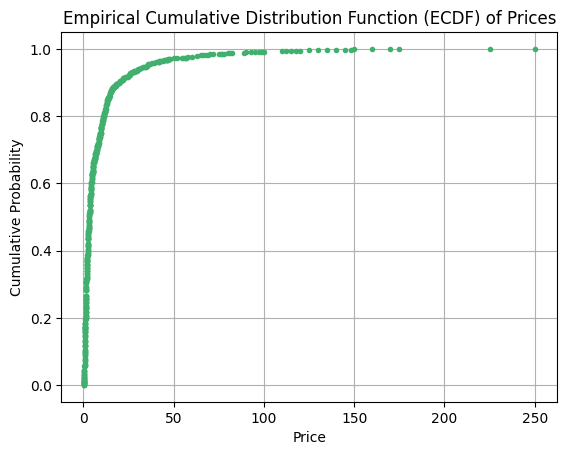

In [ ]:
ecdf = df['price'].value_counts().sort_index().cumsum() / len(df['price'])
plt.plot(
    ecdf.index,
    ecdf,
    marker='.',
    linestyle='none',
    color='#41B06E'
)

plt.title("Empirical Cumulative Distribution Function (ECDF) of Prices")
plt.xlabel("Price")
plt.ylabel("Cumulative Probability")
plt.grid()
plt.show()

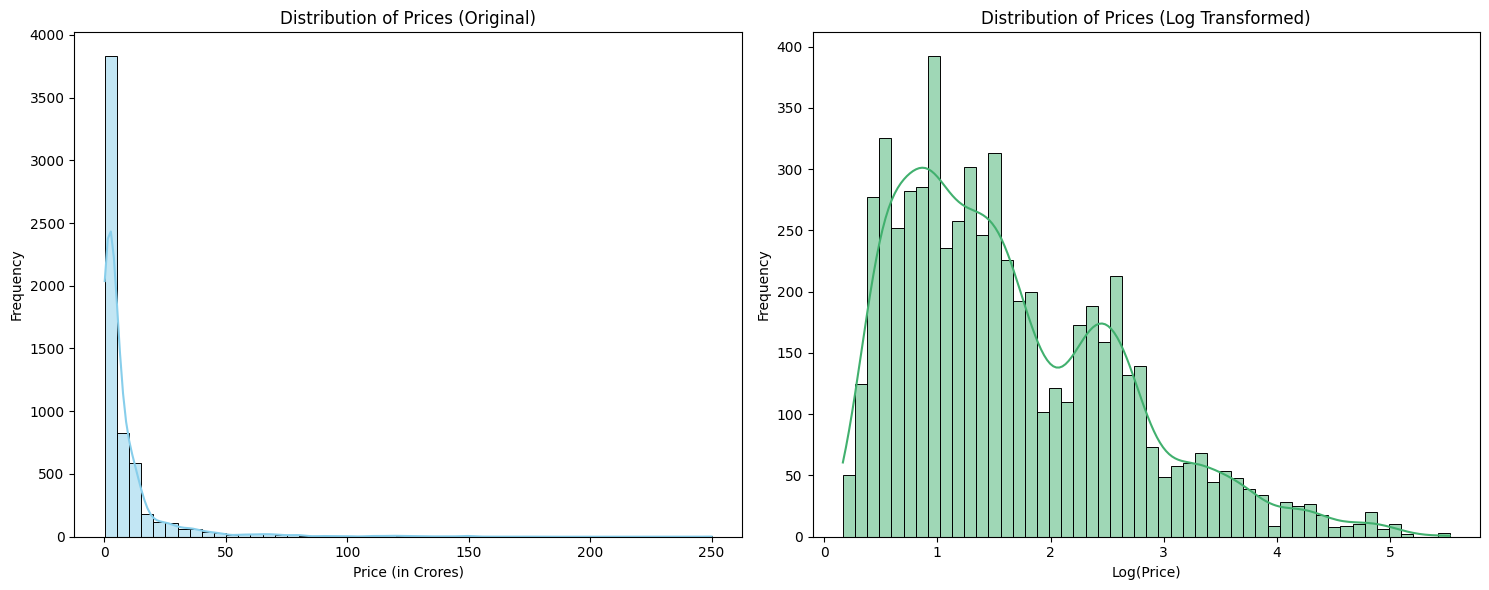

In [ ]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='#41B06E')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

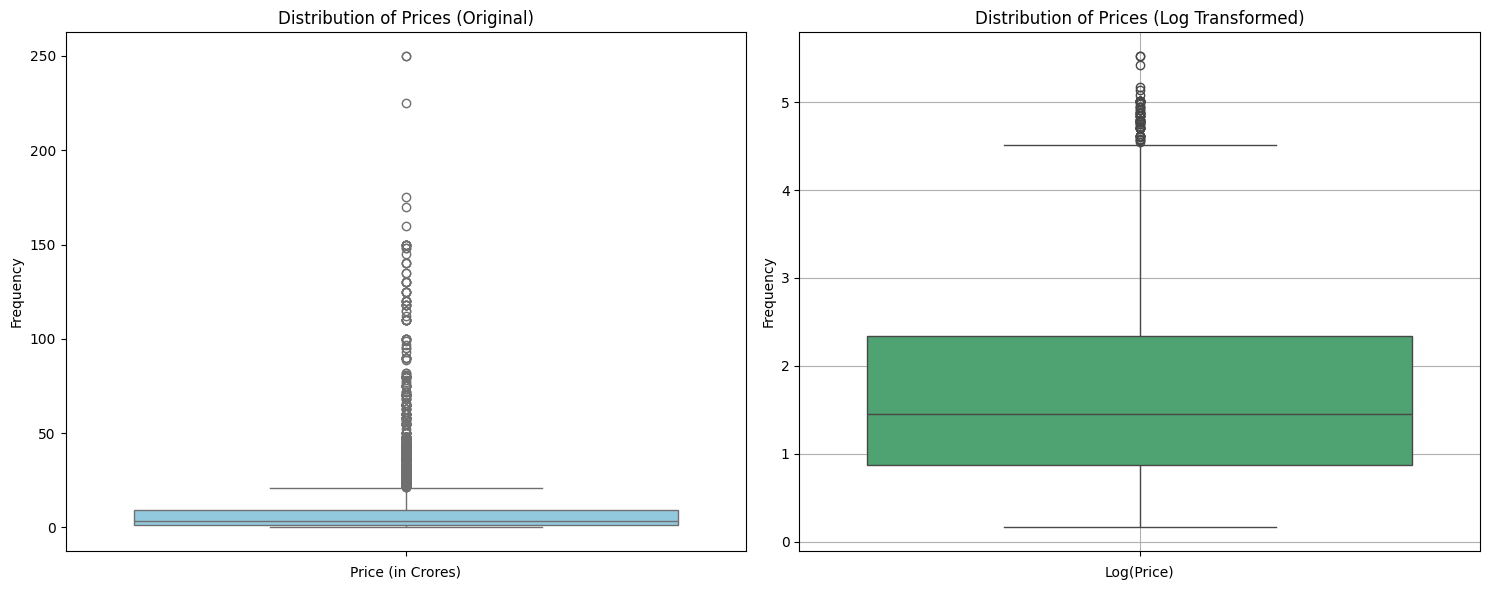

In [ ]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['price'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['price']), color='#41B06E')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
temp=np.log1p(df['price'])
skewness=temp.skew()
krutosis=temp.kurt()
print(skewness,krutosis)

0.8955175474686194 0.37841889529452866


---
---

<h1><b>Observations</b></h1>


<h3><b>Descriptive Statistics</b></h3>

* **Count:** There are 6001  price entries.
* **Mean Price:** The average price is approximately 8.8 crores.
* **Median Price:** The median (or 50th percentile) price is 3.25 crores.
* **Standard Deviation:** The standard deviation of 17.35 in the data indicates the typical variability of prices around the mean price of 8.8
* **Range:** Prices range from a minimum of 18 Lakh to a maximum of 250 crores.
* **IQR:** The IQR of 8 suggests that the middle 50% of prices are not close to the median price, indicating a higher  level of variability within the central range of the data.
* **Skewness:** The skewness value of 5.33 indicates a highly positive skew. This means the distribution of prices is heavily skewed towards the right, with a long tail of high-priced items. The majority of the data points are concentrated on the lower end of the price range, with a few extreme outliers on the higher end.
* **Kurtosis:** The kurtosis value of 39.6 indicates a highly leptokurtic distribution. This means the distribution has a very sharp peak and very heavy tails compared to the normal distribution. This further emphasizes the presence of extreme outliers and the concentration of data points around the peak.
* **1% Quantile:** Only 1% of properties are priced below 33 Lakhs.
* **5% Quantile:** 5% of properties are priced below 55 Lakhs.
* **95% Quantile:** 95% of properties are priced below 35 crores.
* **99% Quantile:** 99% of properties are priced below 93 crores, indicating that very few properties are priced above this value.
* **Log transoformation:** The log transformation Showing Bipolar distribution mean it reduces Skewness and making a balanced distribution.
* **Skewness and Kurtosos after Log transoformation:** Compared to the previous skewness and kurtosis values ,  the new values  of 0.89 and 0.37 are significantly lower and closer to zero. This confirms that the log transformation has effectively reduced the skewness and kurtosis of the data.



<h3><b>Descriptive Statistics of Outliers(Using IQR method)</b></h3>


* **Count:** There are 565  price entries.
* **Mean Price:** The average price of outliers is approximately 49.5  crores.
* **Range:** The range for these outliers is from 21 crores to 250 crores.

<h3><b>Distributions</b></h3>

* **Histogram:** The histogram indicates that most properties are priced in the lower range (below 30 crores), some properties going beyond 30 crores, while some are above 50  crores.

* **Box Plot:** The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 30 crores might be considered outliers as they lie beyond the upper whisker of the box plot.

Null value counts are:
* **Null Values:** 0
---
---

### **3.1.3 Location Column**




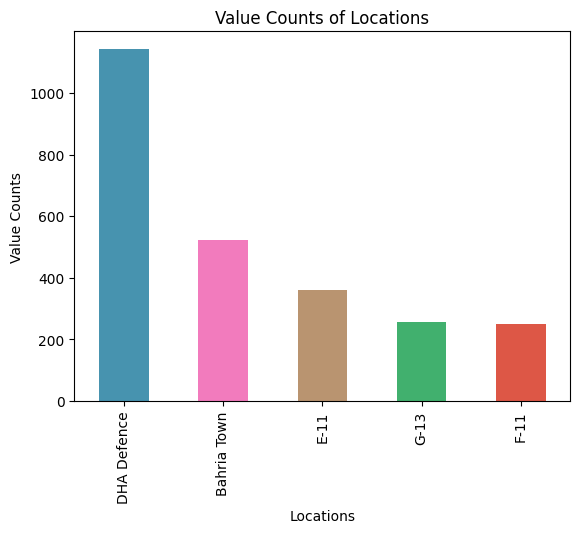

In [ ]:
bar_colors = ['#4793AF',  '#F27BBD','#B99470','#41B06E','#DD5746']
df['location'].value_counts().head(5).plot(kind='bar', color=bar_colors)

plt.title("Value Counts of Locations")
plt.xlabel("Locations")
plt.ylabel("Value Counts")
plt.show()

In [ ]:
df['location'].nunique()

108

In [ ]:
df['location'].isnull().sum()

0

In [ ]:
location_counts = df['location'].value_counts()

location_frequency_bins = {
    "Very High (>100)": (location_counts > 100).sum(),
    "High (50-100)": ((location_counts >= 50) & (location_counts <= 100)).sum(),
    "Average (10-49)": ((location_counts >= 10) & (location_counts < 50)).sum(),
    "Low (2-9)": ((location_counts > 1) & (location_counts < 10)).sum(),
    "Very Low (1)": (location_counts == 1).sum()
}

location_frequency_bins

{'Very High (>100)': 15,
 'High (50-100)': 11,
 'Average (10-49)': 32,
 'Low (2-9)': 29,
 'Very Low (1)': 21}

---
---
<h1><b>Observations</b></h1>
There are a total of 108 unique locations in the dataset.

<h3><b>Distributions</b></h3>

* **Very High (>100):** There are  15 locations that has more than 100 listings.
* **High (50-100):** 11 Locations have between 50 to 100 listings.
* **Average (10-49):** A majority,32 Locations have between 10 to 49 listings.
* **Low (2-9):**  The top second number ,29 Locations have between 2 to 9 listings.
* **Very Low (1):** There are 21 locations with only 1 listing.

Null value counts are:
* **Null Values:** 0
---
---

### **3.1.4 Area Column**

In [ ]:
df['area'].isnull().sum()

0

In [ ]:
df['area'].describe()

count    6001.000000
mean       13.241460
std        46.601454
min         0.700000
25%         4.900000
50%         7.800000
75%        17.800000
max      2650.000000
Name: area, dtype: float64

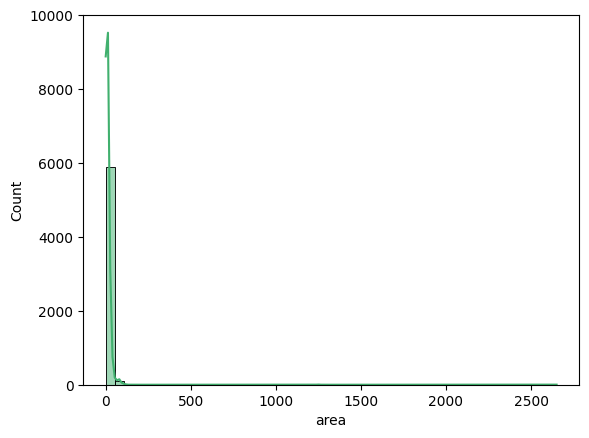

In [ ]:
sns.histplot(df['area'], bins=50, color='#41B06E', kde=True)
plt.show()

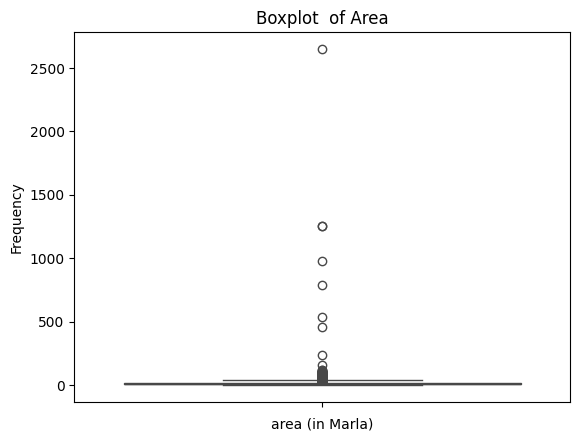

In [ ]:
sns.boxplot(
    df['area'],
    color='#41B06E'
)
plt.title('Boxplot  of Area')
plt.xlabel('area (in Marla)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
q1=df['area'].describe()[4]
q3=df['area'].describe()[6]

iqr=q3-q1
print("IQR is :",iqr)

IQR is : 12.9


In [ ]:
outliers = df[(df['area'] < lower_bound) | (df['area'] > upper_bound)]
outliers.shape

(597, 46)

In [ ]:
outliers['area'].describe()

count     597.000000
mean       53.175879
std       140.638588
min        22.000000
25%        26.000000
50%        34.000000
75%        42.000000
max      2650.000000
Name: area, dtype: float64

---
---

<h1><b>Observations</b></h1>

<h3><b>Descriptive Statistics</b></h3>


* **Count:** There are 6001  area entries.
* **Mean area size :** The average area size is approximately 13.2 marla .
* **Median area size ** The median (or 50th percentile) area size  is 7.8 marla.
* **Standard Deviation:** The standard deviation of 46.6 in the data indicates the typical variability of area size around the mean area size  of 13.2 marlas
* **Range:** Prices range from a minimum of 0.7 marla to a maximum of 2650 marlas.
* **IQR:** The IQR of 12.9 suggests that the middle 50% of area size  are not close to the median area size , indicating a higher  level of variability within the central range of the data.



<h3><b>Descriptive Statistics of Outliers(Using IQR method)</b></h3>

* **Count:** There are 597  area  entries.
* **Mean area size :** The average area size of outliers is approximately 53.17 marlas.
* **Range:** The range for these outliers is from 22 crores to 2650 crores.


<h3><b>Distributions</b></h3>

* **Histogram:** The histogram indicates that most properties are sized  in the lower range ,  while  a large Numbers of Properties  are above mean

* **Box Plot:** The box plot showcases the spread of the data and potential outliers. Properties sized above approximately 22 marlas might be considered outliers as they lie beyond the upper whisker of the box plot.

Null value counts are:
* **Null Values:** 0
---
---

### **3.1.5 Bedrooms Column**

In [ ]:
df['bedrooms'].isnull().sum()

346

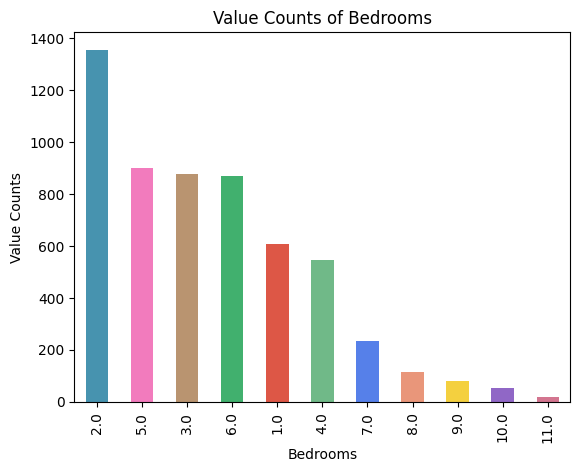

In [ ]:
bar_colors = ['#4793AF',  '#F27BBD','#B99470','#41B06E','#DD5746', '#70B988', '#5680E9', '#E9967A', '#F4D03F', '#9067C6', '#D3758F']
df['bedrooms'].value_counts().sort_values(ascending=False).plot(kind='bar', color=bar_colors)

plt.title("Value Counts of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Value Counts")
plt.show()

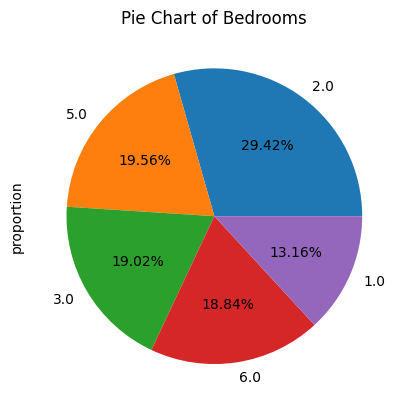

In [ ]:
bar_colors = ['#4793AF',  '#F27BBD','#B99470','#41B06E','#DD5746', ]
df['bedrooms'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')
plt.title("Pie Chart of Bedrooms")
plt.show()

### **3.1.6 Bathrooms Column**

In [ ]:
df['bathrooms'].isnull().sum()

459

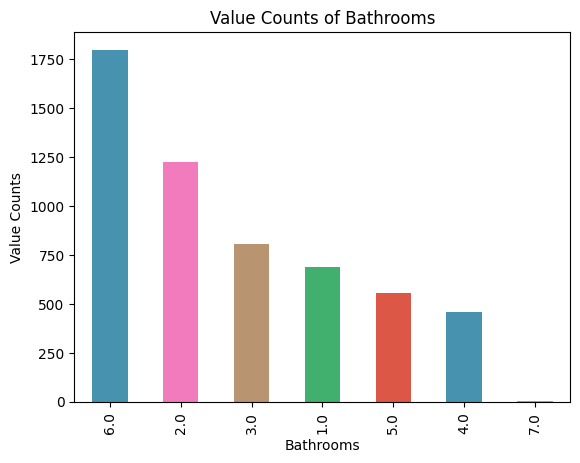

In [ ]:
bar_colors = ['#4793AF',  '#F27BBD','#B99470','#41B06E','#DD5746']
df['bathrooms'].value_counts().sort_values(ascending=False).head(7).plot(kind='bar', color=bar_colors)

plt.title("Value Counts of Bathrooms")
plt.xlabel("Bathrooms")
plt.ylabel("Value Counts")
plt.show()

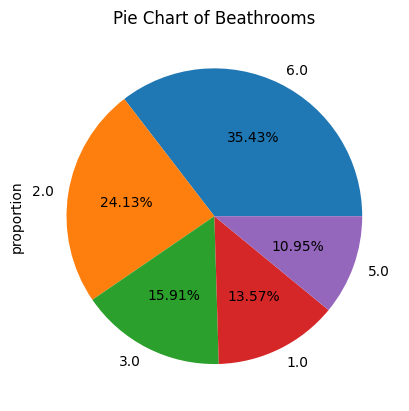

In [ ]:
df['bathrooms'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')
plt.title("Pie Chart of Beathrooms")
plt.show()

### **3.1.7 Built In Year Column**

In [ ]:
df['built_in_year'].isnull().sum()

2358

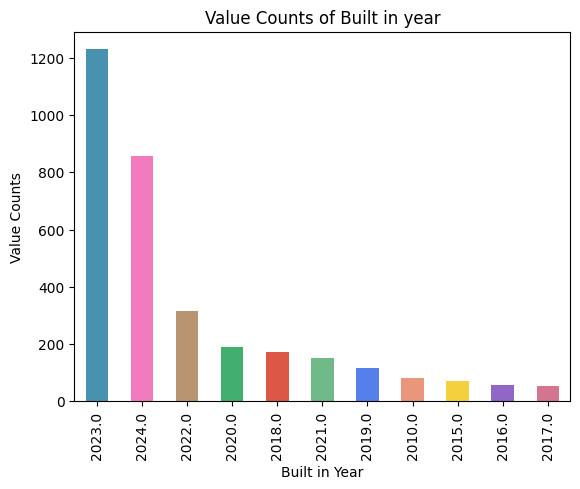

In [ ]:
bar_colors = ['#4793AF',  '#F27BBD','#B99470','#41B06E','#DD5746', '#70B988', '#5680E9', '#E9967A', '#F4D03F', '#9067C6', '#D3758F']
df['built_in_year'].value_counts().sort_values(ascending=False).head(11).plot(kind='bar', color=bar_colors)

plt.title("Value Counts of Built in year")
plt.xlabel("Built in Year")
plt.ylabel("Value Counts")
plt.show()

### **3.1.8 Kitchens Column**

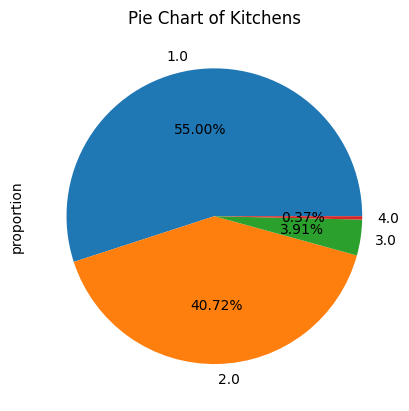

In [ ]:
df['kitchens'].value_counts(normalize=True).head(4).plot(kind='pie',autopct='%0.2f%%')
plt.title("Pie Chart of Kitchens")
plt.show()

### **3.1.9 Parking Spaces Column**

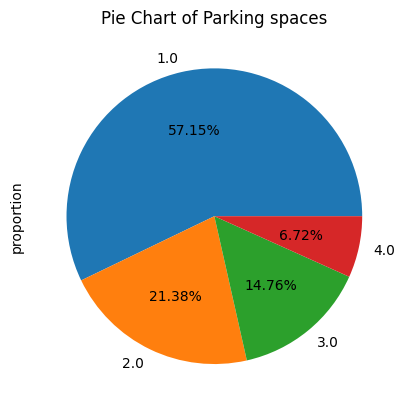

In [ ]:
df['parking_spaces'].value_counts(normalize=True).head(4).plot(kind='pie',autopct='%0.2f%%')
plt.title("Pie Chart of Parking spaces")
plt.show()

### **3.1.10 Store Rooms  Column**

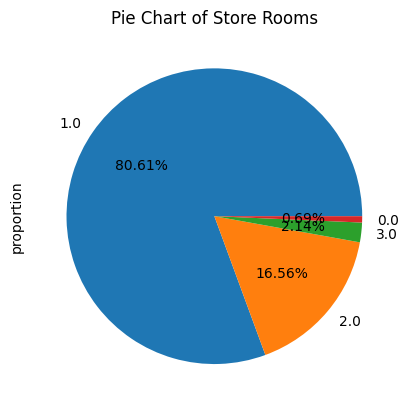

In [ ]:
df['store_rooms'].value_counts(normalize=True).head(4).plot(kind='pie',autopct='%0.2f%%')
plt.title("Pie Chart of Store Rooms")
plt.show()

### **3.1.11 Servant Quarters Column**

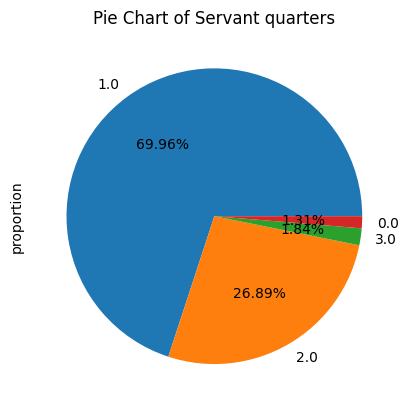

In [ ]:
df['servant_quarters'].value_counts(normalize=True).head(4).plot(kind='pie',autopct='%0.2f%%')
plt.title("Pie Chart of Servant quarters")
plt.show()

### **3.1.12 Floors Column**

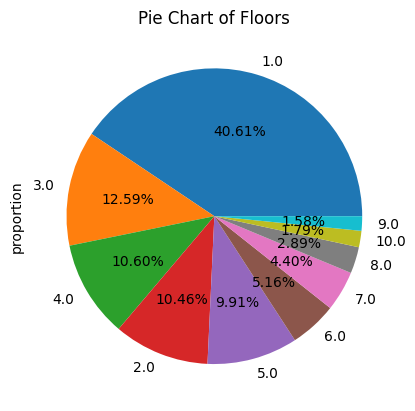

In [ ]:
df['floors'].value_counts(normalize=True).head(10).plot(kind='pie',autopct='%0.2f%%')
plt.title("Pie Chart of Floors")
plt.show()

## **3.2 Multivariate Exploratory Data Analysis**

* **Price Vs Type**

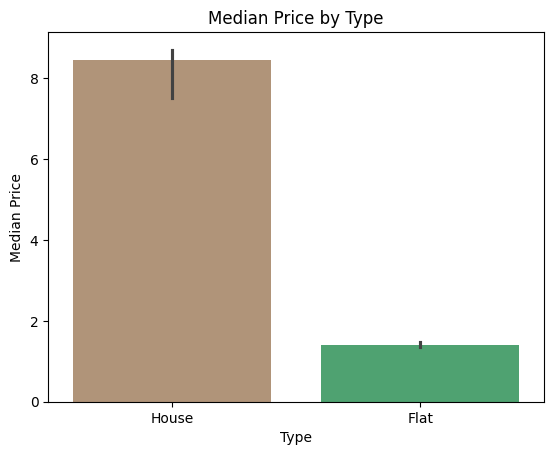

In [ ]:
sns.barplot(
    x="type",
    y="price",
    data=df,
    estimator=np.median,
    palette=['#B99470','#41B06E']
)
plt.title("Median Price by Type")
plt.xlabel("Type")
plt.ylabel("Median Price")
plt.show()

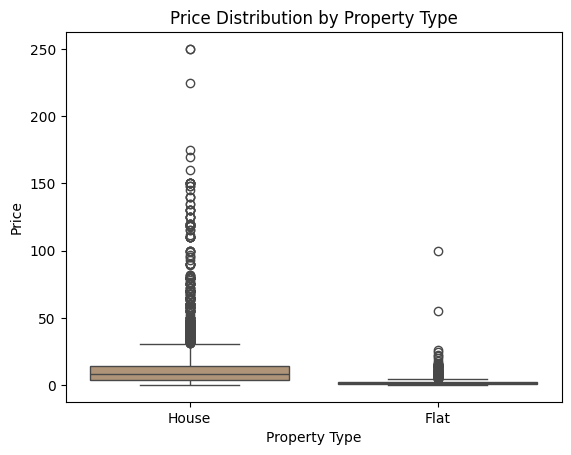

In [ ]:
sns.boxplot(
    x="type",
    y="price",
    data=df,
    palette=['#B99470','#41B06E']
)
plt.title("Price Distribution by Property Type")
plt.xlabel("Property Type")
plt.ylabel("Price")
plt.show()

* **Price Vs Locations**

In [ ]:
df['location'].value_counts().sort_values(ascending=False).head(5)

location
DHA Defence    1142
Bahria Town     523
E-11            360
G-13            258
F-11            249
Name: count, dtype: int64

In [ ]:
df.groupby("location")["price"].mean().sort_values(ascending=False).head(5)

location
F-6    70.542018
E-7    65.162162
F-7    53.561346
F-8    31.250056
G-6    29.834286
Name: price, dtype: float64

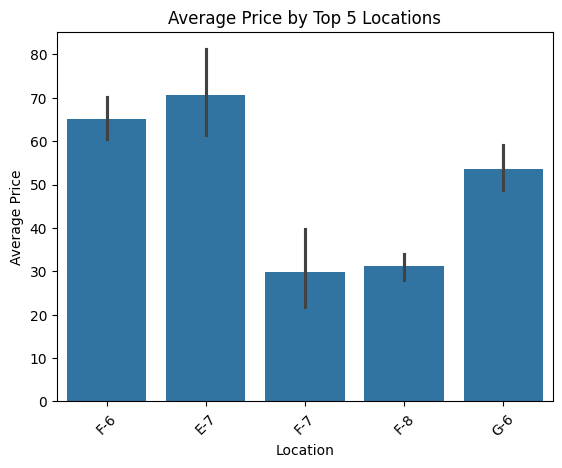

In [ ]:
top_locations = (
    df.groupby("location")["price"]
    .mean()
    .sort_values(ascending=False)
    .head(5)
    .index
)
sns.barplot(
    x="location",
    y="price",
    data=df[df["location"].isin(top_locations)]
)
plt.title("Average Price by Top 5 Locations")
plt.xlabel("Location")
plt.ylabel("Average Price")
plt.xticks(range(len(top_locations)), top_locations)
plt.xticks(rotation=45)
plt.show()

* **Price Vs Area**

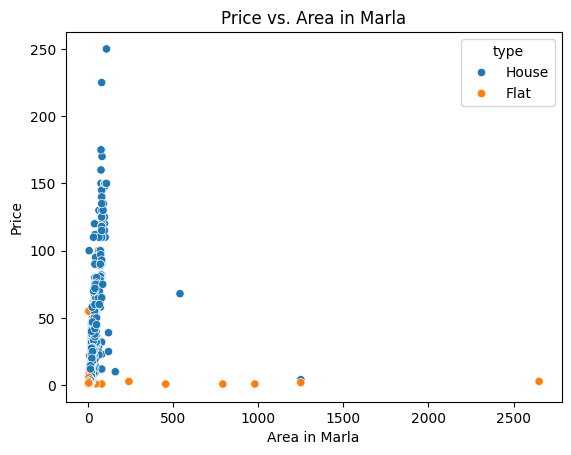

In [ ]:
sns.scatterplot(x="area", y="price", data=df,hue='type')
plt.title("Price vs. Area in Marla")
plt.xlabel("Area in Marla")
plt.ylabel("Price")
plt.show()

* **Price Vs Built In Year**

In [ ]:
df.groupby('type')['area'].max()

type
Flat     2650.0
House    1250.0
Name: area, dtype: float64

* **Price Vs Bedrooms**

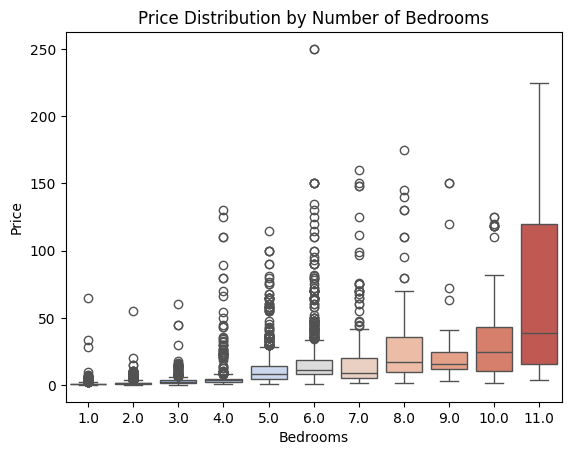

In [ ]:
sns.boxplot(
    x="bedrooms",
    y="price",
    data=df,
    palette="coolwarm"
)
plt.title("Price Distribution by Number of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()


* **Price Vs Bathrooms**

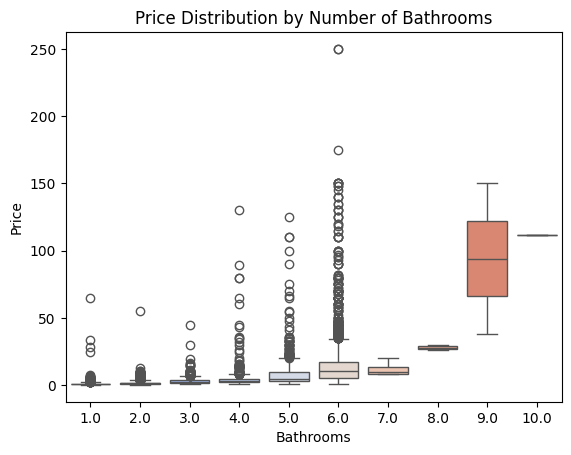

In [ ]:
sns.boxplot(
    x="bathrooms",
    y="price",
    data=df,
    palette="coolwarm"
)
plt.title("Price Distribution by Number of Bathrooms")
plt.xlabel("Bathrooms")
plt.ylabel("Price")
plt.show()

* **Heatmap**

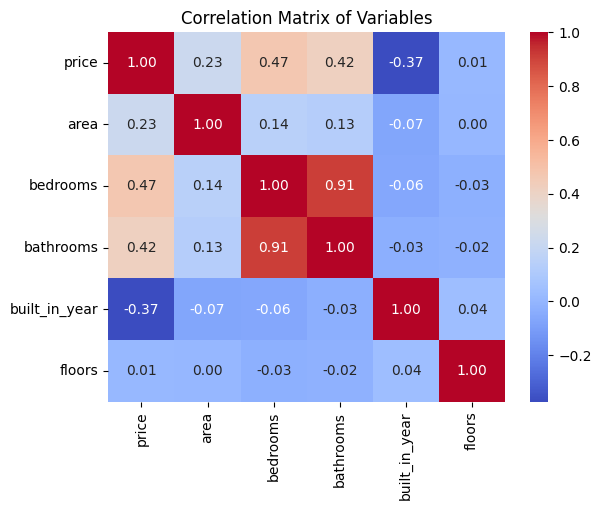

In [ ]:

corr = df[['price', 'area', 'bedrooms', 'bathrooms', 'built_in_year', 'floors']].corr()


sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Matrix of Variables")
plt.show()


# **4. Outliers Handling**
---

### **4.1 Price Column**

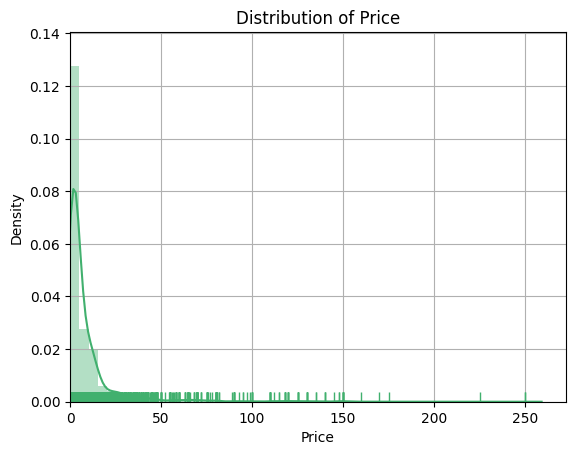

In [ ]:
sns.distplot(
    df['price'],
    color='#41B06E',
    kde=True,
    rug=True
)
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Density")
plt.xlim(left=0)
plt.grid(True)
plt.show()

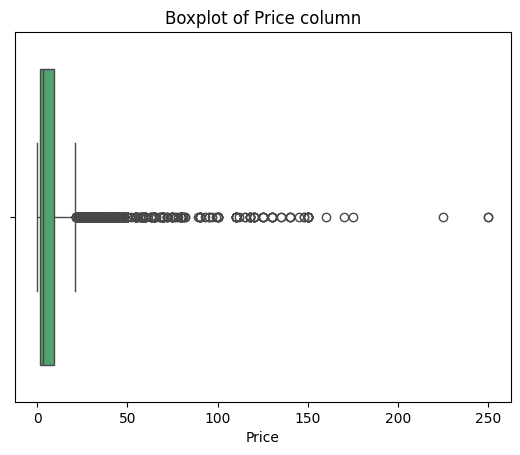

In [ ]:
sns.boxplot(
    x=df['price'],
    color='#41B06E'
)
plt.title("Boxplot of Price column")
plt.xlabel("Price")
plt.show()

In [ ]:

q1=df['price'].quantile(0.25)
q3=df['price'].quantile(0.75)
iqr=q3-q1
print("IQR is :",iqr)
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(lower_bound, upper_bound)

outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]



IQR is : 8.0
-10.6 21.4


In [ ]:
df['price'].describe()

count    6001.000000
mean        8.800157
std        17.357457
min         0.180000
25%         1.400000
50%         3.250000
75%         9.400000
max       250.000000
Name: price, dtype: float64

In [ ]:
outliers['price'].describe()

count    565.000000
mean      49.580407
std       34.181312
min       21.500000
25%       27.000000
50%       36.000000
75%       60.000000
max      250.000000
Name: price, dtype: float64

In [ ]:
df[((df['price']>=100) &(df['area']<50) & (df['bedrooms']<7))]

type  price location  area  bedrooms  bathrooms  built_in_year  \
2477  House  100.0      F-6   6.4       5.0        6.0         1980.0   
5641  House  110.0      F-6  32.0       4.0        5.0         1999.0   

      kitchens  parking_spaces  store_rooms  servant_quarters  floors  \
2477       2.0             6.0          2.0               2.0     NaN   
5641       2.0             7.0          NaN               2.0     NaN   

      furnished  electricity_backup  double_glazed_windows  \
2477        1.0                 1.0                    1.0   
5641        NaN                 1.0                    1.0   

      central_air_conditioning  central_heating  waste_disposal  drawing_room  \
2477                       1.0              1.0             1.0           1.0   
5641                       1.0              1.0             NaN           1.0   

      dining_room  study_room  prayer_room  powder_room  gym  steam_room  \
2477          1.0         1.0          1.0          1.0  1.0         1.0   
5641          1.0         1.0          1.0          1.0  1.0         1.0   

      lounge_or_sitting_room  laundry_room  broadband_internet_access  \
2477                     1.0           1.0                        1.0   
5641                     1.0           1.0                        1.0   

      satellite_or_cable_tv_ready  intercom  community_lawn_or_garden  \
2477                          1.0       1.0                       1.0   
5641                          1.0       1.0                       1.0   

      community_swimming_pool  community_gym  first_aid_or_medical_centre  \
2477                      1.0            1.0                          1.0   
5641                      NaN            1.0                          1.0   

      day_care_centre  kids_play_area  barbeque_area  mosque  \
2477              1.0             1.0            1.0     1.0   
5641              1.0             1.0            1.0     1.0   

      community_centre  lawn_or_garden  swimming_pool  sauna  jacuzzi  \
2477               1.0             1.0            1.0    NaN      NaN   
5641               1.0             1.0            NaN    1.0      1.0   

      maintenance_staff  security_staff  facilities_for_disabled  
2477                1.0             1.0                      1.0  
5641                1.0             1.0                      1.0

In [ ]:
df= df[~((df['price']>=100) &(df['area']<50) & (df['bedrooms']<7))]


In [ ]:
df[df['price']>100]

type  price location   area  bedrooms  bathrooms  built_in_year  \
147   House  125.0      F-6   96.0       6.0        6.0         1999.0   
286   House  250.0      F-6  108.0       6.0        6.0         1990.0   
359   House  120.0      F-6   96.0       6.0        6.0         2023.0   
378   House  110.0      F-6  100.0       4.0        5.0         1990.0   
390   House  140.0      F-7   80.0      11.0        6.0            NaN   
436   House  148.0      F-6  100.0       7.0        6.0            NaN   
745   House  130.0      F-6   80.0       8.0        6.0            NaN   
769   House  118.0      F-7   80.0      10.0        NaN            NaN   
947   House  110.0      F-7   80.0       6.0        6.0         1990.0   
969   House  125.0      F-8   80.0      10.0        NaN         2021.0   
979   House  125.0      F-6   80.0       7.0        6.0            NaN   
1090  House  112.0      F-7   40.0       7.0       10.0         2018.0   
1207  House  140.0      F-6   80.0      11.0        6.0            NaN   
1420  House  120.0      F-6   80.0       9.0        6.0            NaN   
1480  House  120.0      F-6   80.0      11.0        NaN            NaN   
1500  House  120.0      F-6   80.0      11.0        NaN         2018.0   
1529  House  150.0      F-6   96.0       6.0        6.0         1990.0   
1847  House  150.0      F-7   76.0       9.0        6.0         2018.0   
1871  House  115.0      F-6   96.0       6.0        6.0         2009.0   
2041  House  110.0      F-7   80.0       6.0        6.0         2010.0   
2050  House  130.0      F-7   80.0       NaN        NaN         2024.0   
2361  House  150.0      F-6  100.0       7.0        NaN            NaN   
2456  House  148.0      F-6  100.0       7.0        6.0            NaN   
2552  House  150.0      F-6   96.0       6.0        6.0         1990.0   
2596  House  170.0      F-6   82.0       NaN        NaN         2023.0   
2905  House  110.0      F-6   66.0       8.0        6.0            NaN   
3265  House  118.0      F-7   80.0      10.0        NaN            NaN   
3445  House  130.0      F-6   64.0       8.0        6.0         2023.0   
3604  House  120.0      E-7   38.0      10.0        NaN         2023.0   
3823  House  160.0      F-7   76.0       7.0        NaN         2018.0   
3886  House  225.0      F-7   80.0      11.0        NaN         2023.0   
3975  House  118.0      F-6   80.0      10.0        6.0         2006.0   
4223  House  145.0      F-7   80.0       8.0        6.0            NaN   
4248  House  175.0      F-6   76.0       8.0        6.0         2018.0   
4274  House  118.0      F-7   80.0      10.0        NaN            NaN   
4330  House  118.0      F-7   80.0      10.0        NaN            NaN   
4391  House  135.0      F-6   90.0       6.0        6.0         2000.0   
4462  House  110.0      F-7   80.0      10.0        6.0         2008.0   
4522  House  110.0      F-6   64.0       8.0        NaN         2014.0   
4533  House  130.0      F-6   80.0       6.0        6.0         1980.0   
4552  House  150.0      F-6  100.0       6.0        6.0         2004.0   
4656  House  115.0      F-7   80.0       5.0        6.0         1990.0   
4944  House  250.0      F-6  108.0       6.0        6.0         1990.0   
4948  House  140.0      F-7   80.0       8.0        6.0         1990.0   
5138  House  125.0      F-6   80.0      10.0        6.0         2023.0   
5339  House  125.0      F-6   80.0       4.0        5.0         1999.0   
5499  House  150.0      F-6  100.0       6.0        6.0         2024.0   
5569  House  150.0      F-6  108.0       9.0        9.0            NaN   
6228  House  130.0      F-6   88.0       4.0        4.0         1998.0   
6298  House  135.0      F-6   80.0      11.0        6.0         2018.0   

      kitchens  parking_spaces  store_rooms  servant_quarters  floors  \
147        2.0             7.0          NaN               3.0     NaN   
286        1.0             7.0          2.0               2.0     NaN   
359        2.

In [ ]:
outliers['price'].describe()

count    565.000000
mean      49.580407
std       34.181312
min       21.500000
25%       27.000000
50%       36.000000
75%       60.000000
max      250.000000
Name: price, dtype: float64

In [ ]:
df[df['price']>100].shape

(50, 46)

In [ ]:
df=df[df['price']<100]

In [ ]:
df.describe()

price         area     bedrooms    bathrooms  built_in_year  \
count  5945.000000  5945.000000  5601.000000  5500.000000    3603.000000   
mean      7.623505    12.614230     3.831816     3.778182    2020.083541   
std      12.102629    46.333633     2.063179     1.875337       6.669435   
min       0.180000     0.700000     1.000000     1.000000    1970.000000   
25%       1.400000     4.800000     2.000000     2.000000    2020.000000   
50%       3.200000     7.600000     3.000000     4.000000    2023.000000   
75%       9.000000    16.000000     5.000000     6.000000    2023.000000   
max      99.000000  2650.000000    11.000000     9.000000    2024.000000   

          kitchens  parking_spaces  store_rooms  servant_quarters  \
count  4571.000000     4525.000000  3331.000000       3333.000000   
mean      1.515642        4.904597     1.209246          1.322532   
std       0.860465       38.588505     0.516152          0.864166   
min       0.000000        0.000000     0.000000          0.000000   
25%       1.000000        1.000000     1.000000          1.000000   
50%       1.000000        1.000000     1.000000          1.000000   
75%       2.000000        3.000000     1.000000          2.000000   
max      23.000000     1600.000000    11.000000         31.000000   

            floors  furnished  electricity_backup  double_glazed_windows  \
count  1550.000000     2162.0              4327.0                 4200.0   
mean      4.485161        1.0                 1.0                    1.0   
std      26.000014        0.0                 0.0                    0.0   
min       0.000000        1.0                 1.0                    1.0   
25%       1.000000        1.0                 1.0                    1.0   
50%       3.000000        1.0                 1.0                    1.0   
75%       5.000000        1.0                 1.0                    1.0   
max    1014.000000        1.0                 1.0                    1.0   

       central_air_conditioning  central_heating  waste_disposal  \
count                    3618.0           3465.0          4223.0   
mean                        1.0              1.0             1.0   
std                         0.0              0.0             0.0   
min                         1.0              1.0             1.0   
25%                         1.0              1.0             1.0   
50%                         1.0              1.0             1.0   
75%                         1.0              1.0             1.0   
max                         1.0              1.0             1.0   

       drawing_room  dining_room  study_room  prayer_room  powder_room  \
count        4447.0       4393.0      3362.0       3265.0       3721.0   
mean            1.0          1.0         1.0          1.0          1.0   
std             0.0          0.0         0.0          0.0          0.0   
min             1.0          1.0         1.0          1.0          1.0   
25%             1.0          1.0         1.0          1.0          1.0   
50%             1.0          1.0         1.0          1.0          1.0   
75%             1.0          1.0         1.0          1.0          1.0   
max             1.0          1.0         1.0          1.0          1.0   

          gym  steam_room  lounge_or_sitting_room  laundry_room  \
count  3958.0      3001.0                  4319.0        3999.0   
mean      1.0         1.0                     1.0           1.0   
std       0.0         0.0                     0.0           0.0   
min       1.0         1.0                     1.0           1.0   
25%       1.0         1.0                     1.0           1.0   
50%       1.0         1.0                     1.0           1.0   
75%       1.0         1.0                     1.0           1.0   
max       1.0         1.0                     1.0           1.0   

       broadband_internet_access  satellite_or_cable_tv_ready  intercom  \
count                     4457.0                       4306.0 

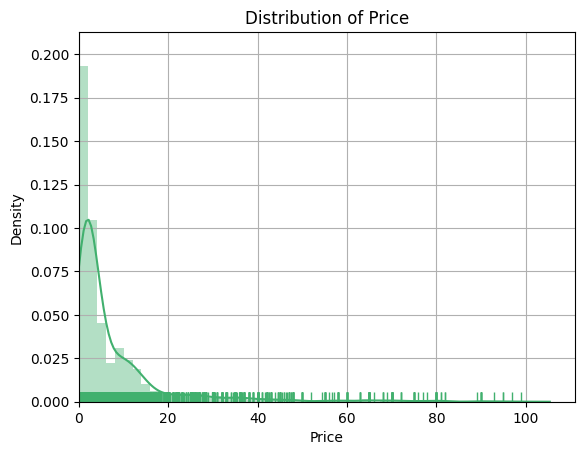

In [ ]:
sns.distplot(
    df['price'],
    color='#41B06E',
    kde=True,
    rug=True
)
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Density")
plt.xlim(left=0)
plt.grid(True)
plt.show()

### **4.2 Area Column**





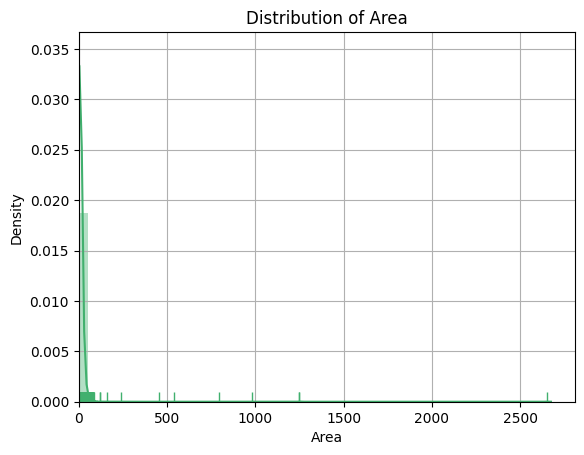

In [ ]:

sns.distplot(
    df['area'],
    color='#41B06E',
    kde=True,
    rug=True
)
plt.title("Distribution of Area")
plt.xlabel("Area")
plt.ylabel("Density")
plt.xlim(left=0)  # Set minimum x-axis limit to 0
plt.grid(True)
plt.show()

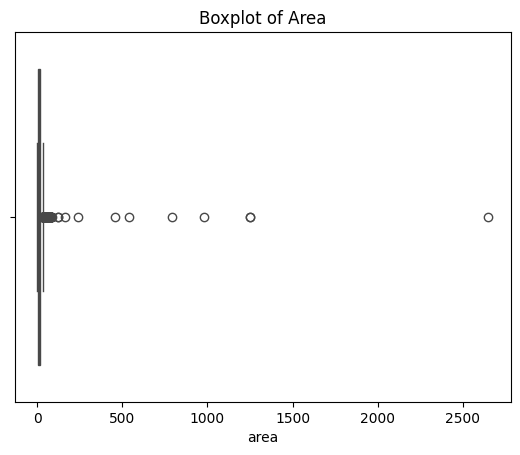

In [ ]:
sns.boxplot(
    x=df['area'],
    color='#41B06E'
)
plt.title("Boxplot of Area")
plt.xlabel("area")
plt.show()

In [ ]:
q1=df['area'].quantile(0.25)
q3=df['area'].quantile(0.75)
iqr=q3-q1
print("IQR is :",iqr)
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(lower_bound, upper_bound)

outliers = df[(df['area'] < lower_bound) | (df['area'] > upper_bound)]

IQR is : 11.2
-11.999999999999996 32.8


In [ ]:
df.describe()

price         area     bedrooms    bathrooms  built_in_year  \
count  5945.000000  5945.000000  5601.000000  5500.000000    3603.000000   
mean      7.623505    12.614230     3.831816     3.778182    2020.083541   
std      12.102629    46.333633     2.063179     1.875337       6.669435   
min       0.180000     0.700000     1.000000     1.000000    1970.000000   
25%       1.400000     4.800000     2.000000     2.000000    2020.000000   
50%       3.200000     7.600000     3.000000     4.000000    2023.000000   
75%       9.000000    16.000000     5.000000     6.000000    2023.000000   
max      99.000000  2650.000000    11.000000     9.000000    2024.000000   

          kitchens  parking_spaces  store_rooms  servant_quarters  \
count  4571.000000     4525.000000  3331.000000       3333.000000   
mean      1.515642        4.904597     1.209246          1.322532   
std       0.860465       38.588505     0.516152          0.864166   
min       0.000000        0.000000     0.000000          0.000000   
25%       1.000000        1.000000     1.000000          1.000000   
50%       1.000000        1.000000     1.000000          1.000000   
75%       2.000000        3.000000     1.000000          2.000000   
max      23.000000     1600.000000    11.000000         31.000000   

            floors  furnished  electricity_backup  double_glazed_windows  \
count  1550.000000     2162.0              4327.0                 4200.0   
mean      4.485161        1.0                 1.0                    1.0   
std      26.000014        0.0                 0.0                    0.0   
min       0.000000        1.0                 1.0                    1.0   
25%       1.000000        1.0                 1.0                    1.0   
50%       3.000000        1.0                 1.0                    1.0   
75%       5.000000        1.0                 1.0                    1.0   
max    1014.000000        1.0                 1.0                    1.0   

       central_air_conditioning  central_heating  waste_disposal  \
count                    3618.0           3465.0          4223.0   
mean                        1.0              1.0             1.0   
std                         0.0              0.0             0.0   
min                         1.0              1.0             1.0   
25%                         1.0              1.0             1.0   
50%                         1.0              1.0             1.0   
75%                         1.0              1.0             1.0   
max                         1.0              1.0             1.0   

       drawing_room  dining_room  study_room  prayer_room  powder_room  \
count        4447.0       4393.0      3362.0       3265.0       3721.0   
mean            1.0          1.0         1.0          1.0          1.0   
std             0.0          0.0         0.0          0.0          0.0   
min             1.0          1.0         1.0          1.0          1.0   
25%             1.0          1.0         1.0          1.0          1.0   
50%             1.0          1.0         1.0          1.0          1.0   
75%             1.0          1.0         1.0          1.0          1.0   
max             1.0          1.0         1.0          1.0          1.0   

          gym  steam_room  lounge_or_sitting_room  laundry_room  \
count  3958.0      3001.0                  4319.0        3999.0   
mean      1.0         1.0                     1.0           1.0   
std       0.0         0.0                     0.0           0.0   
min       1.0         1.0                     1.0           1.0   
25%       1.0         1.0                     1.0           1.0   
50%       1.0         1.0                     1.0           1.0   
75%       1.0         1.0                     1.0           1.0   
max       1.0         1.0                     1.0           1.0   

       broadband_internet_access  satellite_or_cable_tv_ready  intercom  \
count                     4457.0                       4306.0 

In [ ]:
outliers['area'].describe()

count     253.000000
mean       77.794466
std       212.384920
min        34.000000
25%        40.000000
50%        40.000000
75%        50.000000
max      2650.000000
Name: area, dtype: float64

In [ ]:
df[((df['area']>110) & (df['type']=='Flat'))]

type  price     location    area  bedrooms  bathrooms  built_in_year  \
300   Flat   0.84  DHA Defence   792.0       2.0        2.0         2019.0   
789   Flat   2.80  DHA Defence  2650.0       3.0        3.0         2023.0   
3680  Flat   2.75  DHA Defence   240.0       3.0        4.0         2023.0   
4120  Flat   0.87         H-13   980.0       2.0        2.0         2023.0   
5770  Flat   1.90  DHA Defence  1250.0       2.0        2.0            NaN   
5999  Flat   0.82  DHA Defence   456.0       NaN        NaN         2023.0   

      kitchens  parking_spaces  store_rooms  servant_quarters  floors  \
300        1.0             1.0          NaN               NaN     8.0   
789        1.0             2.0          1.0               1.0     1.0   
3680       1.0             NaN          1.0               1.0     8.0   
4120       NaN             1.0          NaN               NaN     5.0   
5770       1.0             1.0          1.0               NaN    18.0   
5999       1.0             1.0          1.0               NaN     3.0   

      furnished  electricity_backup  double_glazed_windows  \
300         NaN                 1.0                    NaN   
789         NaN                 1.0                    1.0   
3680        NaN                 NaN                    NaN   
4120        1.0                 NaN                    1.0   
5770        NaN                 1.0                    1.0   
5999        NaN                 1.0                    1.0   

      central_air_conditioning  central_heating  waste_disposal  drawing_room  \
300                        NaN              NaN             1.0           NaN   
789                        1.0              NaN             NaN           1.0   
3680                       NaN              NaN             1.0           1.0   
4120                       NaN              NaN             1.0           NaN   
5770                       1.0              1.0             1.0           NaN   
5999                       NaN              NaN             1.0           1.0   

      dining_room  study_room  prayer_room  powder_room  gym  steam_room  \
300           NaN         NaN          NaN          NaN  1.0         NaN   
789           1.0         1.0          1.0          1.0  NaN         NaN   
3680          1.0         1.0          NaN          NaN  NaN         1.0   
4120          NaN         NaN          NaN          NaN  NaN         NaN   
5770          NaN         1.0          1.0          1.0  1.0         1.0   
5999          1.0         NaN          1.0          NaN  NaN         NaN   

      lounge_or_sitting_room  laundry_room  broadband_internet_access  \
300                      1.0           1.0                        1.0   
789                      1.0           1.0                        1.0   
3680                     1.0           1.0                        1.0   
4120                     NaN           NaN                        NaN   
5770                     1.0           1.0                        1.0   
5999                     1.0           NaN                        1.0   

      satellite_or_cable_tv_ready  intercom  community_lawn_or_garden  \
300                           1.0       NaN                       NaN   
789                           1.0       1.0                       1.0   
3680                          1.0       NaN                       1.0   
4120                          NaN       NaN                       NaN   
5770                          1.0       1.0                       1.0   
5999                          1.0       1.0                       NaN   

      community_swimming_pool  community_gym  first_aid_or_medical_centre  \
300                       NaN            1.0                          NaN   
789                       NaN            NaN                          1.0   
3680                      1.0            NaN                          1.0   
4120                      NaN            NaN                          NaN   
57

In [ ]:
df[((df['area']>110) & ~(df['type']=='Flat'))]

type  price     location    area  bedrooms  bathrooms  built_in_year  \
324   House   10.0         E-11   160.0       6.0        6.0         2018.0   
1573  House   68.0          F-6   540.0       5.0        6.0            NaN   
2513  House   25.0  Bahria Town   120.0       6.0        6.0         2020.0   
3389  House    4.1         G-11  1250.0       4.0        4.0         2022.0   
5417  House   39.0      Gulberg   120.0      11.0        6.0         2023.0   

      kitchens  parking_spaces  store_rooms  servant_quarters  floors  \
324        1.0             2.0          1.0               1.0     NaN   
1573       1.0             1.0          1.0               1.0     NaN   
2513       2.0             2.0          1.0               NaN     NaN   
3389       NaN            10.0          NaN               NaN     NaN   
5417       3.0            20.0          2.0               2.0     NaN   

      furnished  electricity_backup  double_glazed_windows  \
324         1.0                 1.0                    1.0   
1573        NaN                 NaN                    1.0   
2513        NaN                 1.0                    1.0   
3389        1.0                 1.0                    1.0   
5417        NaN                 1.0                    1.0   

      central_air_conditioning  central_heating  waste_disposal  drawing_room  \
324                        1.0              1.0             1.0           1.0   
1573                       1.0              1.0             1.0           1.0   
2513                       1.0              1.0             1.0           1.0   
3389                       1.0              1.0             1.0           NaN   
5417                       1.0              1.0             1.0           1.0   

      dining_room  study_room  prayer_room  powder_room  gym  steam_room  \
324           1.0         1.0          1.0          1.0  1.0         1.0   
1573          1.0         1.0          1.0          1.0  1.0         NaN   
2513          1.0         NaN          NaN          NaN  1.0         NaN   
3389          NaN         NaN          NaN          NaN  NaN         NaN   
5417          1.0         1.0          1.0          1.0  1.0         1.0   

      lounge_or_sitting_room  laundry_room  broadband_internet_access  \
324                      1.0           1.0                        1.0   
1573                     1.0           1.0                        1.0   
2513                     1.0           1.0                        1.0   
3389                     NaN           NaN                        NaN   
5417                     1.0           1.0                        1.0   

      satellite_or_cable_tv_ready  intercom  community_lawn_or_garden  \
324                           1.0       1.0                       1.0   
1573                          1.0       NaN                       NaN   
2513                          1.0       1.0                       1.0   
3389                          NaN       NaN                       NaN   
5417                          1.0       1.0                       1.0   

      community_swimming_pool  community_gym  first_aid_or_medical_centre  \
324                       NaN            1.0                          1.0   
1573                      NaN            NaN                          NaN   
2513                      1.0            1.0                          1.0   
3389                      NaN            NaN                          NaN   
5417                      1.0            1.0                          1.0   

      day_care_centre  kids_play_area  barbeque_area  mosque  \
324               1.0             1.0            1.0     1.0   
1573              NaN             NaN            NaN     NaN   
2513              1.0             1.0            1.0     1.0   
3389              NaN             NaN            NaN     NaN   
5417              1.0             1.0            1.0     1.0   

      community_centre  lawn_or_garden  swimming_p

In [ ]:
df=df[(df['area']<110)]

In [ ]:
df[(df['area']>=50) ]

type  price         location  area  bedrooms  bathrooms  built_in_year  \
50     Flat   0.90      Bahria Town  80.0       2.0        2.0            NaN   
254   House  32.00          Gulberg  80.0       5.0        6.0         2023.0   
322   House  65.00              F-8  72.0       5.0        6.0         1985.0   
351   House  23.00  Kashmir Highway  80.0       NaN        NaN            NaN   
541   House  28.00      DHA Defence  60.0       5.0        5.0         2024.0   
546   House  54.50              F-7  50.0       4.0        5.0            NaN   
587   House  80.00              F-8  72.0       6.0        6.0         1993.0   
849   House  65.00              G-6  66.0       1.0        1.0         1990.0   
924   House  65.00              F-6  60.0       5.0        5.0         2001.0   
1340  House  80.00              F-7  80.0       6.0        6.0         1990.0   
1459  House  90.00              F-7  80.0       6.0        6.0         1990.0   
1527  House  60.00              F-7  50.0       5.0        6.0         2000.0   
1587  House  80.00              F-8  72.0      11.0        NaN            NaN   
1658  House  82.00              F-8  80.0      10.0        6.0         2023.0   
1909  House  60.00              F-7  50.0       5.0        6.0         2000.0   
1917  House  82.00              F-7  76.0       6.0        6.0            NaN   
2089  House  80.00              F-7  50.0       4.0        4.0         1995.0   
2094  House  80.00              F-8  72.0      11.0        NaN            NaN   
2371  House  69.00              G-6  66.0       8.0        6.0         2018.0   
2421  House  58.00              F-8  72.0       6.0        NaN            NaN   
2573  House  75.00              F-8  72.0       NaN        NaN         2018.0   
2612  House  56.75              F-7  50.0       5.0        6.0         1991.0   
2648  House  65.00              F-8  72.0       NaN        NaN            NaN   
2735  House  65.00              F-7  50.0       7.0        4.0            NaN   
3216  House  99.00              G-6  74.0       7.0        6.0         2018.0   
3612  House  12.00        Bani Gala  80.0       7.0        6.0            NaN   
3638  House  80.00              F-7  76.0      10.0        NaN            NaN   
3801  House  81.00              F-8  72.0       6.0        NaN         2003.0   
3831  House  75.00              F-6  60.0       5.0        6.0            NaN   
3899  House  80.00              F-8  72.0       5.0        6.0         1990.0   
4026  House  12.00        Bani Gala  80.0       7.0        6.0            NaN   
4075  House  25.00      DHA Defence  60.0       8.0        6.0         2023.0   
4078  House  80.00              F-8  72.0       8.0        6.0         1990.0   
4282  House  80.00              F-7  50.0       4.0        4.0         1995.0   
4302  House  81.00              F-8  72.0       5.0        6.0         2018.0   
4367  House  89.00              F-8  72.0       4.0        4.0         1999.0   
4442  House  44.00              F-7  50.0       7.0        6.0         2023.0   
4722  House  63.00              F-8  72.0       5.0        NaN         1990.0   
4740  House  68.00              F-6  60.0       5.0        6.0            NaN   
4826  House  22.50      Bahria Town  64.0       6.0        6.0         2024.0   
4857  House  78.00              F-8  72.0       6.0        6.0            NaN   
5071  House  97.00              G-6  74.0       7.0        6.0         2012.0   
5119  House  93.00              F-7  80.0       6.0        6.0            NaN   
5226  House  80.00              E-7  50.0       6.0        6.0         2023.0   
5409  House  65.00              F-6  60.0       5.0        6.0         1990.0   
5470  House  70.00              G-6  66.0       7.0        6.0         2010.0   
5829  House  90.00              F-7  72.0       5.0        5.0         2003.0   
5847  House  90.00              F-7  72.0       5.0        6.0         1990.0   
6154  House  65.00              F-8  8

In [ ]:
df[(df['area']>=50) & (df['price']<25 )]

type  price         location  area  bedrooms  bathrooms  built_in_year  \
50     Flat    0.9      Bahria Town  80.0       2.0        2.0            NaN   
351   House   23.0  Kashmir Highway  80.0       NaN        NaN            NaN   
3612  House   12.0        Bani Gala  80.0       7.0        6.0            NaN   
4026  House   12.0        Bani Gala  80.0       7.0        6.0            NaN   
4826  House   22.5      Bahria Town  64.0       6.0        6.0         2024.0   

      kitchens  parking_spaces  store_rooms  servant_quarters  floors  \
50         NaN             NaN          NaN               NaN     NaN   
351        1.0             1.0          1.0               1.0     NaN   
3612       NaN             NaN          1.0               NaN     NaN   
4026       NaN             NaN          NaN               NaN     NaN   
4826       1.0             5.0          1.0               2.0     NaN   

      furnished  electricity_backup  double_glazed_windows  \
50          NaN                 NaN                    NaN   
351         1.0                 1.0                    1.0   
3612        NaN                 NaN                    NaN   
4026        NaN                 1.0                    NaN   
4826        NaN                 1.0                    1.0   

      central_air_conditioning  central_heating  waste_disposal  drawing_room  \
50                         NaN              NaN             NaN           NaN   
351                        1.0              1.0             1.0           1.0   
3612                       NaN              NaN             1.0           1.0   
4026                       1.0              1.0             1.0           NaN   
4826                       1.0              1.0             1.0           1.0   

      dining_room  study_room  prayer_room  powder_room  gym  steam_room  \
50            NaN         NaN          NaN          NaN  NaN         NaN   
351           1.0         1.0          1.0          1.0  1.0         1.0   
3612          1.0         1.0          1.0          1.0  1.0         1.0   
4026          NaN         NaN          NaN          NaN  1.0         NaN   
4826          1.0         1.0          1.0          1.0  1.0         1.0   

      lounge_or_sitting_room  laundry_room  broadband_internet_access  \
50                       NaN           NaN                        NaN   
351                      1.0           1.0                        1.0   
3612                     NaN           1.0                        1.0   
4026                     NaN           NaN                        1.0   
4826                     1.0           1.0                        1.0   

      satellite_or_cable_tv_ready  intercom  community_lawn_or_garden  \
50                            NaN       NaN                       NaN   
351                           1.0       1.0                       1.0   
3612                          1.0       1.0                       1.0   
4026                          1.0       NaN                       1.0   
4826                          1.0       1.0                       1.0   

      community_swimming_pool  community_gym  first_aid_or_medical_centre  \
50                        NaN            NaN                          NaN   
351                       1.0            1.0                          1.0   
3612                      1.0            1.0                          1.0   
4026                      1.0            1.0                          1.0   
4826                      1.0            1.0                          1.0   

      day_care_centre  kids_play_area  barbeque_area  mosque  \
50                NaN             NaN            NaN     NaN   
351               1.0             1.0            1.0     1.0   
3612              1.0             1.0            1.0     1.0   
4026              1.0             1.0            1.0     1.0   
4826              1.0             1.0            1.0     1.0   

      community_centre  lawn_or_garden

In [ ]:
df=df[~((df['area']>=50) & (df['price']<25 ))]


In [ ]:
df.describe()

price         area     bedrooms    bathrooms  built_in_year  \
count  5929.000000  5929.000000  5587.000000  5486.000000    3593.000000   
mean      7.605880    11.140091     3.829604     3.776704    2020.078764   
std      12.079141    10.013307     2.061348     1.875402       6.677312   
min       0.180000     0.700000     1.000000     1.000000    1970.000000   
25%       1.400000     4.800000     2.000000     2.000000    2020.000000   
50%       3.200000     7.600000     3.000000     4.000000    2023.000000   
75%       9.000000    15.000000     5.000000     6.000000    2023.000000   
max      99.000000    86.000000    11.000000     9.000000    2024.000000   

          kitchens  parking_spaces  store_rooms  servant_quarters  \
count  4560.000000     4513.000000  3320.000000       3326.000000   
mean      1.516228        4.907224     1.209639          1.322610   
std       0.860887       38.638723     0.516697          0.864825   
min       0.000000        0.000000     0.000000          0.000000   
25%       1.000000        1.000000     1.000000          1.000000   
50%       1.000000        1.000000     1.000000          1.000000   
75%       2.000000        3.000000     1.000000          2.000000   
max      23.000000     1600.000000    11.000000         31.000000   

            floors  furnished  electricity_backup  double_glazed_windows  \
count  1544.000000     2158.0              4316.0                 4189.0   
mean      4.474741        1.0                 1.0                    1.0   
std      26.047753        0.0                 0.0                    0.0   
min       0.000000        1.0                 1.0                    1.0   
25%       1.000000        1.0                 1.0                    1.0   
50%       3.000000        1.0                 1.0                    1.0   
75%       5.000000        1.0                 1.0                    1.0   
max    1014.000000        1.0                 1.0                    1.0   

       central_air_conditioning  central_heating  waste_disposal  \
count                    3608.0           3456.0          4209.0   
mean                        1.0              1.0             1.0   
std                         0.0              0.0             0.0   
min                         1.0              1.0             1.0   
25%                         1.0              1.0             1.0   
50%                         1.0              1.0             1.0   
75%                         1.0              1.0             1.0   
max                         1.0              1.0             1.0   

       drawing_room  dining_room  study_room  prayer_room  powder_room  \
count        4437.0       4383.0      3353.0       3256.0       3713.0   
mean            1.0          1.0         1.0          1.0          1.0   
std             0.0          0.0         0.0          0.0          0.0   
min             1.0          1.0         1.0          1.0          1.0   
25%             1.0          1.0         1.0          1.0          1.0   
50%             1.0          1.0         1.0          1.0          1.0   
75%             1.0          1.0         1.0          1.0          1.0   
max             1.0          1.0         1.0          1.0          1.0   

          gym  steam_room  lounge_or_sitting_room  laundry_room  \
count  3948.0      2994.0                  4308.0        3988.0   
mean      1.0         1.0                     1.0           1.0   
std       0.0         0.0                     0.0           0.0   
min       1.0         1.0                     1.0           1.0   
25%       1.0         1.0                     1.0           1.0   
50%       1.0         1.0                     1.0           1.0   
75%       1.0         1.0                     1.0           1.0   
max       1.0         1.0                     1.0           1.0   

       broadband_internet_access  satellite_or_cable_tv_ready  intercom  \
count                     4444.0                       4293.0 

In [ ]:
df[((df['area']>upper_bound ) & (df['price']<10 )) &(df['type']!='House') ]

type  price location  area  bedrooms  bathrooms  built_in_year  \
1475  Flat   0.99     D-17  46.0       2.0        2.0            NaN   

      kitchens  parking_spaces  store_rooms  servant_quarters  floors  \
1475       NaN             1.0          NaN               NaN     NaN   

      furnished  electricity_backup  double_glazed_windows  \
1475        1.0                 NaN                    1.0   

      central_air_conditioning  central_heating  waste_disposal  drawing_room  \
1475                       1.0              1.0             1.0           NaN   

      dining_room  study_room  prayer_room  powder_room  gym  steam_room  \
1475          NaN         NaN          1.0          NaN  1.0         NaN   

      lounge_or_sitting_room  laundry_room  broadband_internet_access  \
1475                     1.0           NaN                        1.0   

      satellite_or_cable_tv_ready  intercom  community_lawn_or_garden  \
1475                          1.0       1.0                       NaN   

      community_swimming_pool  community_gym  first_aid_or_medical_centre  \
1475                      NaN            1.0                          NaN   

      day_care_centre  kids_play_area  barbeque_area  mosque  \
1475              NaN             1.0            NaN     1.0   

      community_centre  lawn_or_garden  swimming_pool  sauna  jacuzzi  \
1475               NaN             NaN            NaN    NaN      NaN   

      maintenance_staff  security_staff  facilities_for_disabled  
1475                NaN             NaN                      NaN

In [ ]:
df=df[~((df['area']>upper_bound ) & (df['price']<10 ) &(df['type']!='House')) ]

In [ ]:
df.describe()

price         area     bedrooms    bathrooms  built_in_year  \
count  5928.000000  5928.000000  5586.000000  5485.000000    3593.000000   
mean      7.606996    11.134211     3.829932     3.777028    2020.078764   
std      12.079854    10.003907     2.061387     1.875419       6.677312   
min       0.180000     0.700000     1.000000     1.000000    1970.000000   
25%       1.400000     4.800000     2.000000     2.000000    2020.000000   
50%       3.200000     7.600000     3.000000     4.000000    2023.000000   
75%       9.000000    15.000000     5.000000     6.000000    2023.000000   
max      99.000000    86.000000    11.000000     9.000000    2024.000000   

          kitchens  parking_spaces  store_rooms  servant_quarters  \
count  4560.000000     4512.000000  3320.000000       3326.000000   
mean      1.516228        4.908090     1.209639          1.322610   
std       0.860887       38.642961     0.516697          0.864825   
min       0.000000        0.000000     0.000000          0.000000   
25%       1.000000        1.000000     1.000000          1.000000   
50%       1.000000        1.000000     1.000000          1.000000   
75%       2.000000        3.000000     1.000000          2.000000   
max      23.000000     1600.000000    11.000000         31.000000   

            floors  furnished  electricity_backup  double_glazed_windows  \
count  1544.000000     2157.0              4316.0                 4188.0   
mean      4.474741        1.0                 1.0                    1.0   
std      26.047753        0.0                 0.0                    0.0   
min       0.000000        1.0                 1.0                    1.0   
25%       1.000000        1.0                 1.0                    1.0   
50%       3.000000        1.0                 1.0                    1.0   
75%       5.000000        1.0                 1.0                    1.0   
max    1014.000000        1.0                 1.0                    1.0   

       central_air_conditioning  central_heating  waste_disposal  \
count                    3607.0           3455.0          4208.0   
mean                        1.0              1.0             1.0   
std                         0.0              0.0             0.0   
min                         1.0              1.0             1.0   
25%                         1.0              1.0             1.0   
50%                         1.0              1.0             1.0   
75%                         1.0              1.0             1.0   
max                         1.0              1.0             1.0   

       drawing_room  dining_room  study_room  prayer_room  powder_room  \
count        4437.0       4383.0      3353.0       3255.0       3713.0   
mean            1.0          1.0         1.0          1.0          1.0   
std             0.0          0.0         0.0          0.0          0.0   
min             1.0          1.0         1.0          1.0          1.0   
25%             1.0          1.0         1.0          1.0          1.0   
50%             1.0          1.0         1.0          1.0          1.0   
75%             1.0          1.0         1.0          1.0          1.0   
max             1.0          1.0         1.0          1.0          1.0   

          gym  steam_room  lounge_or_sitting_room  laundry_room  \
count  3947.0      2994.0                  4307.0        3988.0   
mean      1.0         1.0                     1.0           1.0   
std       0.0         0.0                     0.0           0.0   
min       1.0         1.0                     1.0           1.0   
25%       1.0         1.0                     1.0           1.0   
50%       1.0         1.0                     1.0           1.0   
75%       1.0         1.0                     1.0           1.0   
max       1.0         1.0                     1.0           1.0   

       broadband_internet_access  satellite_or_cable_tv_ready  intercom  \
count                     4443.0                       4292.0 

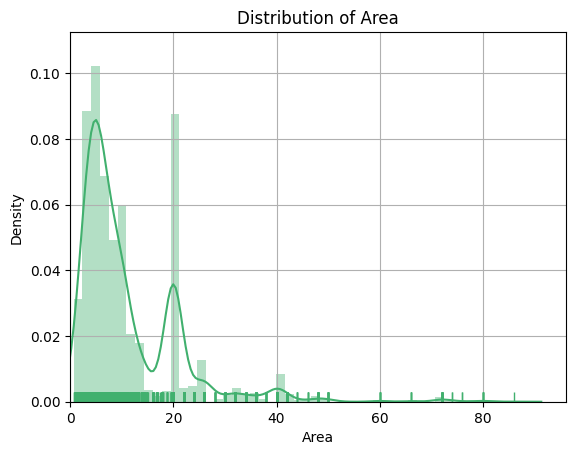

In [ ]:
sns.distplot(
    df['area'],
    color='#41B06E',
    kde=True,
    rug=True
)
plt.title("Distribution of Area")
plt.xlabel("Area")
plt.ylabel("Density")
plt.xlim(left=0)  # Set minimum x-axis limit to 0
plt.grid(True)
plt.show()

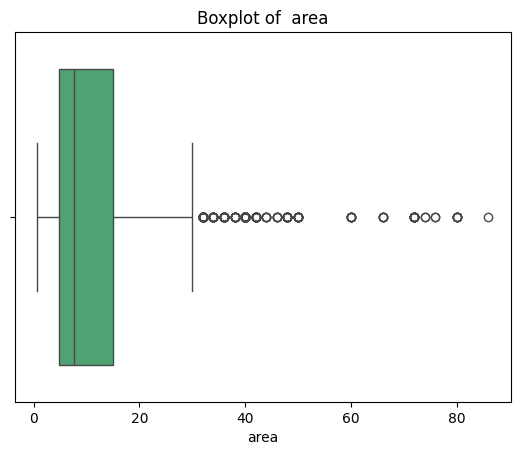

In [ ]:
sns.boxplot(
    x=df['area'],
    color='#41B06E'
)
plt.title("Boxplot of  area")
plt.xlabel("area")
plt.show()

In [ ]:
df.describe()

price         area     bedrooms    bathrooms  built_in_year  \
count  5928.000000  5928.000000  5586.000000  5485.000000    3593.000000   
mean      7.606996    11.134211     3.829932     3.777028    2020.078764   
std      12.079854    10.003907     2.061387     1.875419       6.677312   
min       0.180000     0.700000     1.000000     1.000000    1970.000000   
25%       1.400000     4.800000     2.000000     2.000000    2020.000000   
50%       3.200000     7.600000     3.000000     4.000000    2023.000000   
75%       9.000000    15.000000     5.000000     6.000000    2023.000000   
max      99.000000    86.000000    11.000000     9.000000    2024.000000   

          kitchens  parking_spaces  store_rooms  servant_quarters  \
count  4560.000000     4512.000000  3320.000000       3326.000000   
mean      1.516228        4.908090     1.209639          1.322610   
std       0.860887       38.642961     0.516697          0.864825   
min       0.000000        0.000000     0.000000          0.000000   
25%       1.000000        1.000000     1.000000          1.000000   
50%       1.000000        1.000000     1.000000          1.000000   
75%       2.000000        3.000000     1.000000          2.000000   
max      23.000000     1600.000000    11.000000         31.000000   

            floors  furnished  electricity_backup  double_glazed_windows  \
count  1544.000000     2157.0              4316.0                 4188.0   
mean      4.474741        1.0                 1.0                    1.0   
std      26.047753        0.0                 0.0                    0.0   
min       0.000000        1.0                 1.0                    1.0   
25%       1.000000        1.0                 1.0                    1.0   
50%       3.000000        1.0                 1.0                    1.0   
75%       5.000000        1.0                 1.0                    1.0   
max    1014.000000        1.0                 1.0                    1.0   

       central_air_conditioning  central_heating  waste_disposal  \
count                    3607.0           3455.0          4208.0   
mean                        1.0              1.0             1.0   
std                         0.0              0.0             0.0   
min                         1.0              1.0             1.0   
25%                         1.0              1.0             1.0   
50%                         1.0              1.0             1.0   
75%                         1.0              1.0             1.0   
max                         1.0              1.0             1.0   

       drawing_room  dining_room  study_room  prayer_room  powder_room  \
count        4437.0       4383.0      3353.0       3255.0       3713.0   
mean            1.0          1.0         1.0          1.0          1.0   
std             0.0          0.0         0.0          0.0          0.0   
min             1.0          1.0         1.0          1.0          1.0   
25%             1.0          1.0         1.0          1.0          1.0   
50%             1.0          1.0         1.0          1.0          1.0   
75%             1.0          1.0         1.0          1.0          1.0   
max             1.0          1.0         1.0          1.0          1.0   

          gym  steam_room  lounge_or_sitting_room  laundry_room  \
count  3947.0      2994.0                  4307.0        3988.0   
mean      1.0         1.0                     1.0           1.0   
std       0.0         0.0                     0.0           0.0   
min       1.0         1.0                     1.0           1.0   
25%       1.0         1.0                     1.0           1.0   
50%       1.0         1.0                     1.0           1.0   
75%       1.0         1.0                     1.0           1.0   
max       1.0         1.0                     1.0           1.0   

       broadband_internet_access  satellite_or_cable_tv_ready  intercom  \
count                     4443.0                       4292.0 

### **3.3 Bedrooms Column**

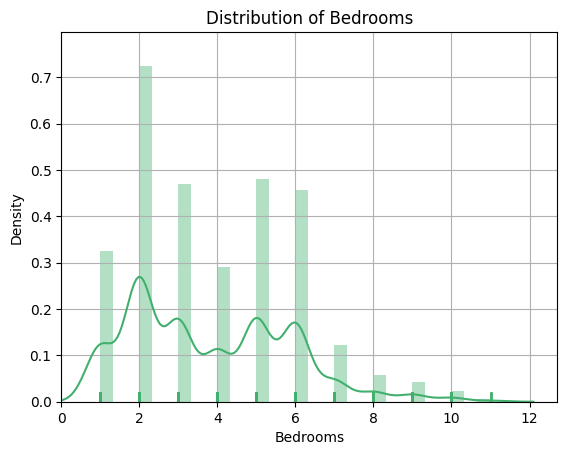

In [ ]:
sns.distplot(
    df['bedrooms'],
    color='#41B06E',
    kde=True,
    rug=True
)
plt.title("Distribution of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Density")
plt.xlim(left=0)  # Set minimum x-axis limit to 0
plt.grid(True)
plt.show()

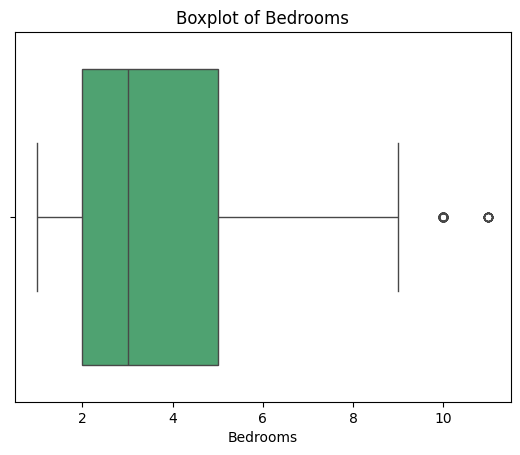

In [ ]:
sns.boxplot(
    x=df['bedrooms'],
    color='#41B06E'
)
plt.title("Boxplot of Bedrooms")
plt.xlabel("Bedrooms")
plt.show()

In [ ]:
q1=df['bedrooms'].quantile(0.25)
q3=df['bedrooms'].quantile(0.75)
iqr=q3-q1
print("IQR is :",iqr)
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(lower_bound, upper_bound)

outliers = df[(df['bedrooms'] < lower_bound) | (df['bedrooms'] > upper_bound)]

IQR is : 3.0
-2.5 9.5


In [ ]:
outliers['bedrooms'].describe()

count    56.000000
mean     10.214286
std       0.414039
min      10.000000
25%      10.000000
50%      10.000000
75%      10.000000
max      11.000000
Name: bedrooms, dtype: float64

In [ ]:
df[((df['bedrooms']>upper_bound) & (df['area']<10))]

type  price    location  area  bedrooms  bathrooms  built_in_year  \
1237  House    3.5     Gulberg   7.0      10.0        5.0         2023.0   
1635  House    2.0  Bhara kahu   6.0      10.0        6.0         2021.0   
1824  House    3.5        I-14   7.0      11.0        6.0            NaN   
4512  House    4.0        B-17   8.0      10.0        NaN         2021.0   
5219  House    7.0        I-10   5.0      10.0        6.0            NaN   

      kitchens  parking_spaces  store_rooms  servant_quarters  floors  \
1237       NaN             1.0          NaN               1.0     NaN   
1635       3.0             2.0          1.0               1.0     NaN   
1824       3.0             2.0          NaN               3.0     NaN   
4512       3.0             1.0          1.0               1.0     NaN   
5219       1.0             3.0          NaN               1.0     NaN   

      furnished  electricity_backup  double_glazed_windows  \
1237        1.0                 1.0                    1.0   
1635        NaN                 1.0                    NaN   
1824        NaN                 NaN                    NaN   
4512        NaN                 1.0                    1.0   
5219        NaN                 NaN                    NaN   

      central_air_conditioning  central_heating  waste_disposal  drawing_room  \
1237                       1.0              1.0             1.0           NaN   
1635                       NaN              NaN             1.0           1.0   
1824                       NaN              NaN             NaN           1.0   
4512                       1.0              1.0             1.0           1.0   
5219                       NaN              NaN             NaN           NaN   

      dining_room  study_room  prayer_room  powder_room  gym  steam_room  \
1237          NaN         NaN          NaN          NaN  NaN         NaN   
1635          1.0         NaN          NaN          NaN  NaN         NaN   
1824          1.0         NaN          NaN          NaN  NaN         NaN   
4512          1.0         1.0          1.0          1.0  1.0         1.0   
5219          NaN         NaN          NaN          NaN  NaN         NaN   

      lounge_or_sitting_room  laundry_room  broadband_internet_access  \
1237                     NaN           NaN                        1.0   
1635                     NaN           NaN                        NaN   
1824                     NaN           NaN                        NaN   
4512                     1.0           1.0                        1.0   
5219                     NaN           NaN                        NaN   

      satellite_or_cable_tv_ready  intercom  community_lawn_or_garden  \
1237                          1.0       1.0                       NaN   
1635                          NaN       NaN                       NaN   
1824                          NaN       NaN                       1.0   
4512                          1.0       1.0                       1.0   
5219                          NaN       NaN                       NaN   

      community_swimming_pool  community_gym  first_aid_or_medical_centre  \
1237                      NaN            NaN                          NaN   
1635                      NaN            NaN                          NaN   
1824                      NaN            NaN                          1.0   
4512                      1.0            1.0                          1.0   
5219                      NaN            NaN                          NaN   

      day_care_centre  kids_play_area  barbeque_area  mosque  \
1237              NaN             NaN            NaN     NaN   
1635              NaN             NaN            NaN     NaN   
1824              1.0             1.0            1.0     1.0   
4512              1.0             1.0            1.0     1.0   
5219              NaN             NaN            NaN     NaN   

      community_centre  lawn_or_garden  swimming_pool  sauna  jacuzz

In [ ]:
df=df[~((df['bedrooms']>upper_bound) & (df['area']<10)) ]

In [ ]:
(df['area']/df['bedrooms']).quantile(0.90)

4.333333333333333

In [ ]:
df[(df['bedrooms']==11)]

type  price    location  area  bedrooms  bathrooms  built_in_year  \
755   House  45.00         F-8  32.0      11.0        NaN         2022.0   
982   House  35.00         F-8  40.0      11.0        NaN         2014.0   
1587  House  80.00         F-8  72.0      11.0        NaN            NaN   
1850   Flat  11.73  Top City 1  20.0      11.0        6.0         2024.0   
2094  House  80.00         F-8  72.0      11.0        NaN            NaN   
2547  House   8.50  Top City 1  20.0      11.0        6.0         2023.0   
2574  House  37.00         F-8  36.0      11.0        6.0            NaN   
3302  House  17.00         I-8  14.2      11.0        NaN         2012.0   
3739  House   7.50  Bhara kahu  30.0      11.0        6.0         2005.0   
4705  House  15.00        E-11  20.0      11.0        6.0         2024.0   
5701  House  16.00        E-11  20.0      11.0        NaN            NaN   

      kitchens  parking_spaces  store_rooms  servant_quarters  floors  \
755        2.0             1.0          1.0               2.0     NaN   
982        2.0             8.0          2.0               2.0     NaN   
1587       1.0             1.0          1.0               1.0     NaN   
1850       NaN             1.0          NaN               NaN     3.0   
2094       1.0             1.0          1.0               1.0     NaN   
2547       3.0             4.0          1.0               1.0     NaN   
2574       1.0             1.0          NaN               NaN     NaN   
3302       3.0             4.0          1.0               1.0     NaN   
3739       3.0             1.0          3.0               1.0     NaN   
4705       3.0             5.0          2.0               3.0     NaN   
5701       1.0             1.0          1.0               1.0     NaN   

      furnished  electricity_backup  double_glazed_windows  \
755         1.0                 1.0                    1.0   
982         NaN                 NaN                    1.0   
1587        1.0                 1.0                    1.0   
1850        1.0                 1.0                    1.0   
2094        NaN                 NaN                    NaN   
2547        1.0                 1.0                    1.0   
2574        1.0                 1.0                    NaN   
3302        NaN                 1.0                    1.0   
3739        NaN                 1.0                    1.0   
4705        NaN                 1.0                    1.0   
5701        NaN                 1.0                    1.0   

      central_air_conditioning  central_heating  waste_disposal  drawing_room  \
755                        1.0              1.0             1.0           1.0   
982                        1.0              1.0             1.0           1.0   
1587                       1.0              1.0             1.0           1.0   
1850                       1.0              1.0             1.0           1.0   
2094                       NaN              NaN             1.0           1.0   
2547                       1.0              1.0             1.0           1.0   
2574                       NaN              NaN             1.0           1.0   
3302                       NaN              NaN             1.0           1.0   
3739                       NaN              NaN             NaN           1.0   
4705                       1.0              1.0             1.0           1.0   
5701                       1.0              1.0             1.0           1.0   

      dining_room  study_room  prayer_room  powder_room  gym  steam_room  \
755           1.0         1.0          1.0          1.0  1.0         1.0   
982           1.0         1.0          NaN          1.0  1.0         NaN   
1587          1.0         1.0          1.0          1.0  1.0         1.0   
1850          1.0         NaN          1.0          NaN  1.0         NaN   
2094          1.0         1.0          NaN          1.0  NaN         NaN   
2547          1.0         NaN          NaN 

In [ ]:
df=df[~((df['bedrooms']==11))]

In [ ]:
df[df['bedrooms']==10].shape

(40, 46)

In [ ]:
df=df[~((df['bedrooms']==10))]

In [ ]:
df['bedrooms'].describe()

count    5530.000000
mean        3.765280
std         1.968155
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max         9.000000
Name: bedrooms, dtype: float64

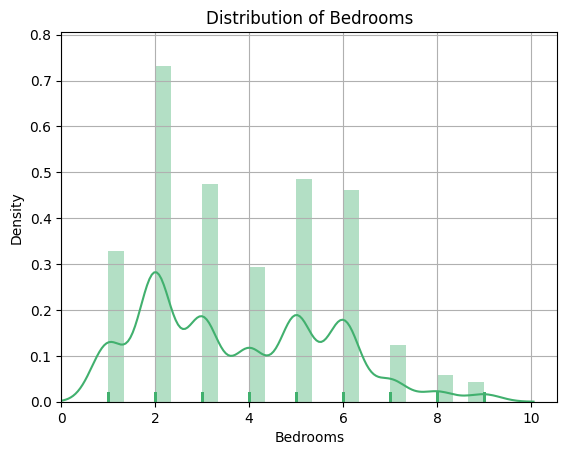

In [ ]:
sns.distplot(
    df['bedrooms'],
    color='#41B06E',
    kde=True,
    rug=True
)
plt.title("Distribution of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Density")
plt.xlim(left=0)  # Set minimum x-axis limit to 0
plt.grid(True)
plt.show()

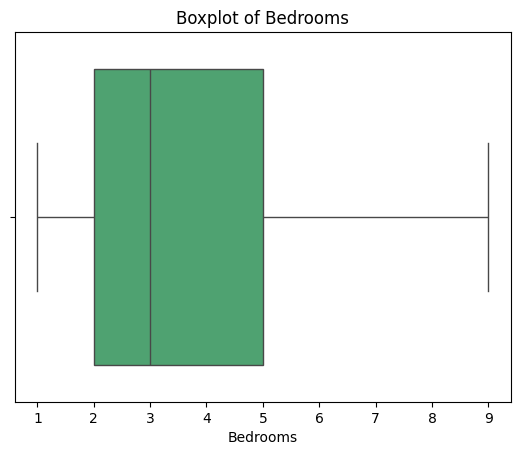

In [ ]:
sns.boxplot(
    x=df['bedrooms'],
    color='#41B06E'
)
plt.title("Boxplot of Bedrooms")
plt.xlabel("Bedrooms")
plt.show()

In [ ]:
df.describe()

price         area     bedrooms    bathrooms  built_in_year  \
count  5872.000000  5872.000000  5530.000000  5445.000000    3557.000000   
mean      7.443646    10.975715     3.765280     3.760882    2020.131009   
std      11.842372     9.776219     1.968155     1.872726       6.589843   
min       0.180000     0.700000     1.000000     1.000000    1970.000000   
25%       1.367500     4.800000     2.000000     2.000000    2020.000000   
50%       3.170000     7.550000     3.000000     4.000000    2023.000000   
75%       8.912500    14.200000     5.000000     6.000000    2023.000000   
max      99.000000    86.000000     9.000000     9.000000    2024.000000   

          kitchens  parking_spaces  store_rooms  servant_quarters  \
count  4510.000000      4462.00000  3280.000000       3278.000000   
mean      1.505100         4.91468     1.200610          1.314216   
std       0.852297        38.85665     0.502509          0.858346   
min       0.000000         0.00000     0.000000          0.000000   
25%       1.000000         1.00000     1.000000          1.000000   
50%       1.000000         1.00000     1.000000          1.000000   
75%       2.000000         3.00000     1.000000          2.000000   
max      23.000000      1600.00000    11.000000         31.000000   

            floors  furnished  electricity_backup  double_glazed_windows  \
count  1543.000000     2146.0              4279.0                 4146.0   
mean      4.475697        1.0                 1.0                    1.0   
std      26.056170        0.0                 0.0                    0.0   
min       0.000000        1.0                 1.0                    1.0   
25%       1.000000        1.0                 1.0                    1.0   
50%       3.000000        1.0                 1.0                    1.0   
75%       5.000000        1.0                 1.0                    1.0   
max    1014.000000        1.0                 1.0                    1.0   

       central_air_conditioning  central_heating  waste_disposal  \
count                    3570.0           3421.0          4167.0   
mean                        1.0              1.0             1.0   
std                         0.0              0.0             0.0   
min                         1.0              1.0             1.0   
25%                         1.0              1.0             1.0   
50%                         1.0              1.0             1.0   
75%                         1.0              1.0             1.0   
max                         1.0              1.0             1.0   

       drawing_room  dining_room  study_room  prayer_room  powder_room  \
count        4388.0       4335.0      3320.0       3228.0       3679.0   
mean            1.0          1.0         1.0          1.0          1.0   
std             0.0          0.0         0.0          0.0          0.0   
min             1.0          1.0         1.0          1.0          1.0   
25%             1.0          1.0         1.0          1.0          1.0   
50%             1.0          1.0         1.0          1.0          1.0   
75%             1.0          1.0         1.0          1.0          1.0   
max             1.0          1.0         1.0          1.0          1.0   

          gym  steam_room  lounge_or_sitting_room  laundry_room  \
count  3917.0      2968.0                  4263.0        3945.0   
mean      1.0         1.0                     1.0           1.0   
std       0.0         0.0                     0.0           0.0   
min       1.0         1.0                     1.0           1.0   
25%       1.0         1.0                     1.0           1.0   
50%       1.0         1.0                     1.0           1.0   
75%       1.0         1.0                     1.0           1.0   
max       1.0         1.0                     1.0           1.0   

       broadband_internet_access  satellite_or_cable_tv_ready  intercom  \
count                     4402.0                       4250.0 

 ### **3.4 Bathrooms**

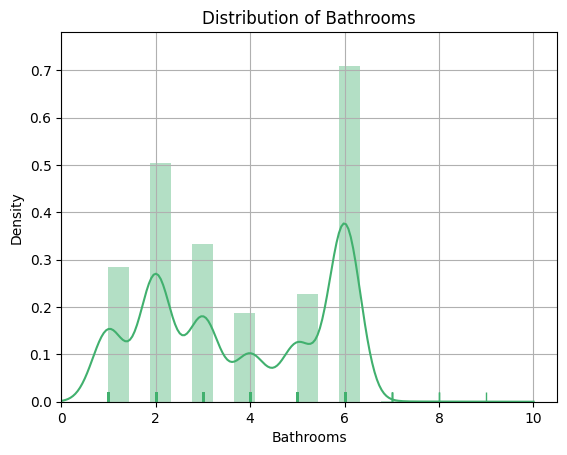

In [ ]:
sns.distplot(
    df['bathrooms'],
    color='#41B06E',
    kde=True,
    rug=True
)
plt.title("Distribution of Bathrooms")
plt.xlabel("Bathrooms")
plt.ylabel("Density")
plt.xlim(left=0)  # Set minimum x-axis limit to 0
plt.grid(True)
plt.show()

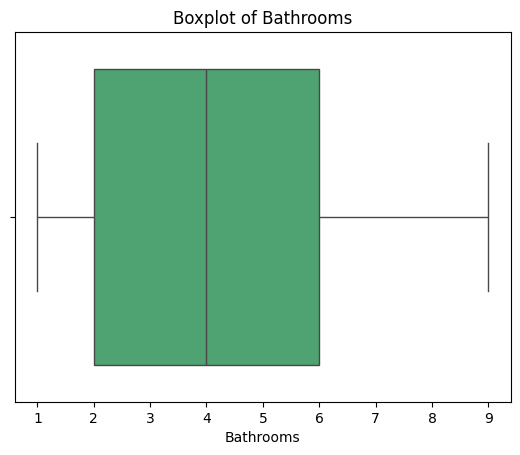

In [ ]:
sns.boxplot(
    x=df['bathrooms'],
    color='#41B06E'
)
plt.title("Boxplot of Bathrooms")
plt.xlabel("Bathrooms")
plt.show()

In [ ]:
q1=df['bathrooms'].quantile(0.25)
q3=df['bathrooms'].quantile(0.75)
iqr=q3-q1
print("IQR is :",iqr)
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(lower_bound, upper_bound)

outliers = df[(df['bathrooms'] < lower_bound) | (df['bathrooms'] > upper_bound)]

IQR is : 4.0
-4.0 12.0


In [ ]:
df['bathrooms'].value_counts()

bathrooms
6.0    1718
2.0    1220
3.0     807
1.0     689
5.0     551
4.0     453
7.0       4
8.0       2
9.0       1
Name: count, dtype: int64

In [ ]:
df[df['bathrooms']>=7]

type  price            location  area  bedrooms  bathrooms  \
2646  House   30.0                 F-6  26.0       7.0        8.0   
2772  House   11.0         DHA Defence  20.0       6.0        7.0   
3352  House    8.3         DHA Defence  20.0       6.0        7.0   
4205  House   20.0     Kashmir Highway  40.0       5.0        7.0   
4382  House   38.0                 F-7  40.0       8.0        9.0   
5487  House   26.0                F-11  26.0       7.0        8.0   
6291  House    8.5  PWD Housing Scheme  20.0       7.0        7.0   

      built_in_year  kitchens  parking_spaces  store_rooms  servant_quarters  \
2646            NaN       2.0             NaN          NaN               NaN   
2772         2023.0       NaN             NaN          NaN               2.0   
3352         2023.0       2.0             NaN          1.0               1.0   
4205         2023.0       1.0             2.0          NaN               1.0   
4382            NaN       2.0             2.0          1.0               1.0   
5487            NaN       NaN             5.0          NaN               2.0   
6291            NaN       NaN             NaN          NaN               NaN   

      floors  furnished  electricity_backup  double_glazed_windows  \
2646     NaN        NaN                 NaN                    NaN   
2772     NaN        NaN                 1.0                    1.0   
3352     NaN        NaN                 NaN                    1.0   
4205     NaN        1.0                 1.0                    1.0   
4382     NaN        NaN                 1.0                    NaN   
5487     NaN        NaN                 1.0                    1.0   
6291     NaN        NaN                 1.0                    NaN   

      central_air_conditioning  central_heating  waste_disposal  drawing_room  \
2646                       NaN              NaN             NaN           1.0   
2772                       1.0              1.0             NaN           1.0   
3352                       1.0              1.0             1.0           1.0   
4205                       1.0              1.0             1.0           1.0   
4382                       NaN              NaN             NaN           1.0   
5487                       NaN              NaN             1.0           1.0   
6291                       NaN              NaN             NaN           NaN   

      dining_room  study_room  prayer_room  powder_room  gym  steam_room  \
2646          1.0         NaN          NaN          NaN  NaN         NaN   
2772          1.0         NaN          NaN          NaN  NaN         1.0   
3352          1.0         1.0          NaN          NaN  1.0         1.0   
4205          1.0         1.0          1.0          1.0  1.0         NaN   
4382          1.0         1.0          NaN          1.0  1.0         NaN   
5487          1.0         NaN          NaN          1.0  1.0         NaN   
6291          NaN         NaN          NaN          NaN  NaN         NaN   

      lounge_or_sitting_room  laundry_room  broadband_internet_access  \
2646                     NaN           NaN                        NaN   
2772                     1.0           1.0                        NaN   
3352                     1.0           1.0                        NaN   
4205                     NaN           NaN                        1.0   
4382                     1.0           1.0                        1.0   
5487                     1.0           1.0                        1.0   
6291                     NaN           NaN                        1.0   

      satellite_or_cable_tv_ready  intercom  community_lawn_or_garden  \
2646                          NaN       NaN                       NaN   
2772                          NaN       NaN                       NaN   
3352                          NaN       NaN                       1.0   
4205                          1.0       1.0                       1.0   
4382                          1.0       1.0 

In [ ]:
df.describe()

price         area     bedrooms    bathrooms  built_in_year  \
count  5872.000000  5872.000000  5530.000000  5445.000000    3557.000000   
mean      7.443646    10.975715     3.765280     3.760882    2020.131009   
std      11.842372     9.776219     1.968155     1.872726       6.589843   
min       0.180000     0.700000     1.000000     1.000000    1970.000000   
25%       1.367500     4.800000     2.000000     2.000000    2020.000000   
50%       3.170000     7.550000     3.000000     4.000000    2023.000000   
75%       8.912500    14.200000     5.000000     6.000000    2023.000000   
max      99.000000    86.000000     9.000000     9.000000    2024.000000   

          kitchens  parking_spaces  store_rooms  servant_quarters  \
count  4510.000000      4462.00000  3280.000000       3278.000000   
mean      1.505100         4.91468     1.200610          1.314216   
std       0.852297        38.85665     0.502509          0.858346   
min       0.000000         0.00000     0.000000          0.000000   
25%       1.000000         1.00000     1.000000          1.000000   
50%       1.000000         1.00000     1.000000          1.000000   
75%       2.000000         3.00000     1.000000          2.000000   
max      23.000000      1600.00000    11.000000         31.000000   

            floors  furnished  electricity_backup  double_glazed_windows  \
count  1543.000000     2146.0              4279.0                 4146.0   
mean      4.475697        1.0                 1.0                    1.0   
std      26.056170        0.0                 0.0                    0.0   
min       0.000000        1.0                 1.0                    1.0   
25%       1.000000        1.0                 1.0                    1.0   
50%       3.000000        1.0                 1.0                    1.0   
75%       5.000000        1.0                 1.0                    1.0   
max    1014.000000        1.0                 1.0                    1.0   

       central_air_conditioning  central_heating  waste_disposal  \
count                    3570.0           3421.0          4167.0   
mean                        1.0              1.0             1.0   
std                         0.0              0.0             0.0   
min                         1.0              1.0             1.0   
25%                         1.0              1.0             1.0   
50%                         1.0              1.0             1.0   
75%                         1.0              1.0             1.0   
max                         1.0              1.0             1.0   

       drawing_room  dining_room  study_room  prayer_room  powder_room  \
count        4388.0       4335.0      3320.0       3228.0       3679.0   
mean            1.0          1.0         1.0          1.0          1.0   
std             0.0          0.0         0.0          0.0          0.0   
min             1.0          1.0         1.0          1.0          1.0   
25%             1.0          1.0         1.0          1.0          1.0   
50%             1.0          1.0         1.0          1.0          1.0   
75%             1.0          1.0         1.0          1.0          1.0   
max             1.0          1.0         1.0          1.0          1.0   

          gym  steam_room  lounge_or_sitting_room  laundry_room  \
count  3917.0      2968.0                  4263.0        3945.0   
mean      1.0         1.0                     1.0           1.0   
std       0.0         0.0                     0.0           0.0   
min       1.0         1.0                     1.0           1.0   
25%       1.0         1.0                     1.0           1.0   
50%       1.0         1.0                     1.0           1.0   
75%       1.0         1.0                     1.0           1.0   
max       1.0         1.0                     1.0           1.0   

       broadband_internet_access  satellite_or_cable_tv_ready  intercom  \
count                     4402.0                       4250.0 

### **3.5 Built In Years**

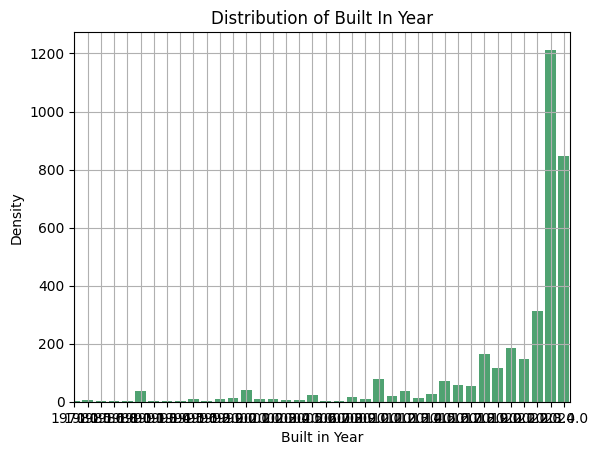

In [ ]:
sns.countplot(
   x= df['built_in_year'],
   color='#41B06E',
)
plt.title("Distribution of Built In Year")
plt.xlabel("Built in Year")
plt.ylabel("Density")
plt.xlim(left=0)  # Set minimum x-axis limit to 0
plt.grid(True)
plt.show()

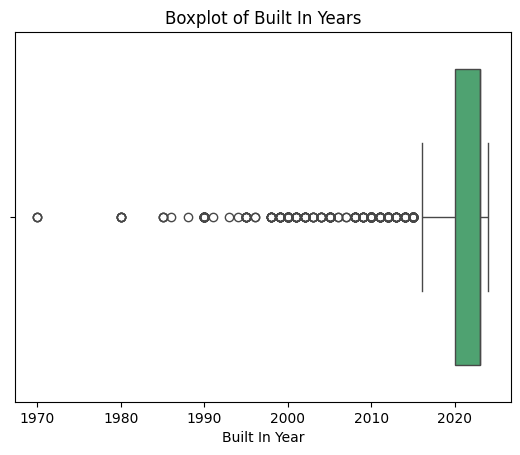

In [ ]:
sns.boxplot(
    x=df['built_in_year'],
    color='#41B06E'
)
plt.title("Boxplot of Built In Years")
plt.xlabel("Built In Year")
plt.show()

In [ ]:
q1=df['built_in_year'].quantile(0.25)
q3=df['built_in_year'].quantile(0.75)
iqr=q3-q1
print("IQR is :",iqr)
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(lower_bound, upper_bound)

outliers = df[(df['built_in_year'] < lower_bound) | (df['built_in_year'] > upper_bound)]

IQR is : 3.0
2015.5 2027.5


In [ ]:
outliers['built_in_year'].describe()

count     463.000000
mean     2005.967603
std         8.735968
min      1970.000000
25%      2000.000000
50%      2010.000000
75%      2012.000000
max      2015.000000
Name: built_in_year, dtype: float64

In [ ]:
df['built_in_year'].value_counts()

built_in_year
2023.0    1213
2024.0     848
2022.0     311
2020.0     185
2018.0     163
2021.0     146
2019.0     116
2010.0      80
2015.0      72
2016.0      58
2017.0      54
2000.0      42
2012.0      38
1990.0      37
2014.0      25
2005.0      23
2011.0      20
2008.0      17
1999.0      14
2013.0      12
2002.0      11
2001.0      11
2009.0      10
1995.0       9
1998.0       9
2004.0       6
2003.0       5
1980.0       5
1970.0       3
1985.0       3
1996.0       2
2006.0       2
2007.0       2
1993.0       1
1988.0       1
1986.0       1
1991.0       1
1994.0       1
Name: count, dtype: int64

In [ ]:
df[df['built_in_year']<2000]

type  price location  area  bedrooms  bathrooms  built_in_year  \
49    House  18.00      F-6  17.8       5.0        5.0         1990.0   
52     Flat   4.00     F-10  10.2       3.0        3.0         1996.0   
221   House  15.50     F-11  20.0       6.0        6.0         1988.0   
322   House  65.00      F-8  72.0       5.0        6.0         1985.0   
429   House  45.00      F-8  20.0       4.0        NaN         1990.0   
...     ...    ...      ...   ...       ...        ...            ...   
5968  House  55.00      E-7  38.0       8.0        6.0         1990.0   
5970  House  45.50      F-7  42.0       5.0        6.0         1970.0   
6028  House  43.00      F-7  40.0       4.0        4.0         1998.0   
6326  House  36.00      F-8  40.0       4.0        4.0         1998.0   
6366  House  28.15      F-7  26.0       1.0        1.0         1990.0   

      kitchens  parking_spaces  store_rooms  servant_quarters  floors  \
49         1.0             3.0          1.0               1.0     NaN   
52         1.0             1.0          1.0               1.0     6.0   
221        2.0             4.0          NaN               2.0     NaN   
322        1.0            10.0          1.0               2.0     NaN   
429        2.0            10.0          NaN               2.0     NaN   
...        ...             ...          ...               ...     ...   
5968       2.0             1.0          1.0               1.0     NaN   
5970       2.0             4.0          1.0               2.0     NaN   
6028       1.0             6.0          2.0               1.0     NaN   
6326       1.0             6.0          1.0               2.0     NaN   
6366       1.0             6.0          1.0               1.0     NaN   

      furnished  electricity_backup  double_glazed_windows  \
49          NaN                 1.0                    1.0   
52          NaN                 1.0                    NaN   
221         NaN                 1.0                    NaN   
322         1.0                 1.0                    1.0   
429         NaN                 1.0                    1.0   
...         ...                 ...                    ...   
5968        1.0                 1.0                    1.0   
5970        1.0                 1.0                    1.0   
6028        NaN                 1.0                    1.0   
6326        NaN                 NaN                    1.0   
6366        NaN                 1.0                    1.0   

      central_air_conditioning  central_heating  waste_disposal  drawing_room  \
49                         1.0              1.0             1.0           1.0   
52                         NaN              NaN             1.0           1.0   
221                        NaN              NaN             NaN           1.0   
322                        1.0              1.0             1.0           1.0   
429                        1.0              1.0             1.0           1.0   
...                        ...              ...             ...           ...   
5968                       1.0              1.0             1.0           1.0   
5970                       1.0              1.0             1.0           1.0   
6028                       1.0              1.0             1.0           1.0   
6326                       1.0              1.0             1.0           1.0   
6366                       1.0              1.0             1.0           1.0   

      dining_room  study_room  prayer_room  powder_room  gym  steam_room  \
49            1.0         1.0          1.0          1.0  1.0         1.0   
52            1.0         1.0          1.0          NaN  1.0         1.0   
221           1.0         1.0          NaN          NaN  NaN         NaN   
322           1.0         1.0          1.0          1.0  1.0         1.0   
429           1.0         1.0          1.0          1.0  1.0         1.0   
...           ...         ...          ...          ...  ...         ...   
596

In [ ]:
df.loc[df['built_in_year'] < 2000, 'built_in_year'] = 2015

In [ ]:
df[df['built_in_year']<2000]

Empty DataFrame
Columns: [type, price, location, area, bedrooms, bathrooms, built_in_year, kitchens, parking_spaces, store_rooms, servant_quarters, floors, furnished, electricity_backup, double_glazed_windows, central_air_conditioning, central_heating, waste_disposal, drawing_room, dining_room, study_room, prayer_room, powder_room, gym, steam_room, lounge_or_sitting_room, laundry_room, broadband_internet_access, satellite_or_cable_tv_ready, intercom, community_lawn_or_garden, community_swimming_pool, community_gym, first_aid_or_medical_centre, day_care_centre, kids_play_area, barbeque_area, mosque, community_centre, lawn_or_garden, swimming_pool, sauna, jacuzzi, maintenance_staff, security_staff, facilities_for_disabled]
Index: []

In [ ]:
df[df['built_in_year']==2024]

type  price         location  area  bedrooms  bathrooms  built_in_year  \
3     House  11.50      DHA Defence  20.0       6.0        6.0         2024.0   
10    House   1.75        Bani Gala   5.0       5.0        5.0         2024.0   
29    House  20.23  Kashmir Highway  40.0       5.0        6.0         2024.0   
37    House  12.75      DHA Defence  20.0       6.0        6.0         2024.0   
40    House   3.45             C-18  20.0       6.0        6.0         2024.0   
...     ...    ...              ...   ...       ...        ...            ...   
6487   Flat   0.95          GT Road   1.6       1.0        1.0         2024.0   
6488  House   1.65             E-16   7.0       5.0        5.0         2024.0   
6500  House   5.25      Bahria Town  10.0       5.0        5.0         2024.0   
6507  House  20.00             F-10  22.0       6.0        6.0         2024.0   
6515  House   2.75         CBR Town   7.0       4.0        4.0         2024.0   

      kitchens  parking_spaces  store_rooms  servant_quarters  floors  \
3          2.0             3.0          2.0               2.0     NaN   
10         1.0             1.0          1.0               1.0     NaN   
29         2.0             4.0          1.0               2.0     NaN   
37         2.0             3.0          2.0               2.0     NaN   
40         2.0             3.0          NaN               1.0     NaN   
...        ...             ...          ...               ...     ...   
6487       1.0             1.0          1.0               1.0     5.0   
6488       1.0             1.0          1.0               1.0     NaN   
6500       2.0             2.0          NaN               1.0     NaN   
6507       2.0             1.0          1.0               1.0     NaN   
6515       2.0             2.0          1.0               1.0     NaN   

      furnished  electricity_backup  double_glazed_windows  \
3           1.0                 1.0                    1.0   
10          NaN                 1.0                    NaN   
29          1.0                 1.0                    1.0   
37          NaN                 1.0                    1.0   
40          NaN                 1.0                    1.0   
...         ...                 ...                    ...   
6487        1.0                 1.0                    1.0   
6488        1.0                 1.0                    1.0   
6500        NaN                 1.0                    1.0   
6507        NaN                 1.0                    1.0   
6515        NaN                 1.0                    1.0   

      central_air_conditioning  central_heating  waste_disposal  drawing_room  \
3                          1.0              NaN             1.0           1.0   
10                         NaN              NaN             1.0           1.0   
29                         1.0              1.0             1.0           1.0   
37                         1.0              NaN             1.0           1.0   
40                         1.0              1.0             1.0           1.0   
...                        ...              ...             ...           ...   
6487                       1.0              1.0             1.0           1.0   
6488                       1.0              1.0             1.0           1.0   
6500                       NaN              NaN             1.0           1.0   
6507                       1.0              1.0             1.0           1.0   
6515                       1.0              1.0             1.0           1.0   

      dining_room  study_room  prayer_room  powder_room  gym  steam_room  \
3             1.0         1.0          1.0          1.0  1.0         1.0   
10            1.0         NaN          NaN          NaN  NaN         1.0   
29            1.0         1.0          1.0          1.0  1.0         1.0   
37            1.0         1.0          1.0          1.0  1.0         1.0   
40            1.0         1.0          1.0          NaN  1.

In [ ]:
df.describe()

price         area     bedrooms    bathrooms  built_in_year  \
count  5872.000000  5872.000000  5530.000000  5445.000000    3557.000000   
mean      7.443646    10.975715     3.765280     3.760882    2020.705370   
std      11.842372     9.776219     1.968155     1.872726       4.763272   
min       0.180000     0.700000     1.000000     1.000000    2000.000000   
25%       1.367500     4.800000     2.000000     2.000000    2020.000000   
50%       3.170000     7.550000     3.000000     4.000000    2023.000000   
75%       8.912500    14.200000     5.000000     6.000000    2023.000000   
max      99.000000    86.000000     9.000000     9.000000    2024.000000   

          kitchens  parking_spaces  store_rooms  servant_quarters  \
count  4510.000000      4462.00000  3280.000000       3278.000000   
mean      1.505100         4.91468     1.200610          1.314216   
std       0.852297        38.85665     0.502509          0.858346   
min       0.000000         0.00000     0.000000          0.000000   
25%       1.000000         1.00000     1.000000          1.000000   
50%       1.000000         1.00000     1.000000          1.000000   
75%       2.000000         3.00000     1.000000          2.000000   
max      23.000000      1600.00000    11.000000         31.000000   

            floors  furnished  electricity_backup  double_glazed_windows  \
count  1543.000000     2146.0              4279.0                 4146.0   
mean      4.475697        1.0                 1.0                    1.0   
std      26.056170        0.0                 0.0                    0.0   
min       0.000000        1.0                 1.0                    1.0   
25%       1.000000        1.0                 1.0                    1.0   
50%       3.000000        1.0                 1.0                    1.0   
75%       5.000000        1.0                 1.0                    1.0   
max    1014.000000        1.0                 1.0                    1.0   

       central_air_conditioning  central_heating  waste_disposal  \
count                    3570.0           3421.0          4167.0   
mean                        1.0              1.0             1.0   
std                         0.0              0.0             0.0   
min                         1.0              1.0             1.0   
25%                         1.0              1.0             1.0   
50%                         1.0              1.0             1.0   
75%                         1.0              1.0             1.0   
max                         1.0              1.0             1.0   

       drawing_room  dining_room  study_room  prayer_room  powder_room  \
count        4388.0       4335.0      3320.0       3228.0       3679.0   
mean            1.0          1.0         1.0          1.0          1.0   
std             0.0          0.0         0.0          0.0          0.0   
min             1.0          1.0         1.0          1.0          1.0   
25%             1.0          1.0         1.0          1.0          1.0   
50%             1.0          1.0         1.0          1.0          1.0   
75%             1.0          1.0         1.0          1.0          1.0   
max             1.0          1.0         1.0          1.0          1.0   

          gym  steam_room  lounge_or_sitting_room  laundry_room  \
count  3917.0      2968.0                  4263.0        3945.0   
mean      1.0         1.0                     1.0           1.0   
std       0.0         0.0                     0.0           0.0   
min       1.0         1.0                     1.0           1.0   
25%       1.0         1.0                     1.0           1.0   
50%       1.0         1.0                     1.0           1.0   
75%       1.0         1.0                     1.0           1.0   
max       1.0         1.0                     1.0           1.0   

       broadband_internet_access  satellite_or_cable_tv_ready  intercom  \
count                     4402.0                       4250.0 

### **3.5 Kitchens**

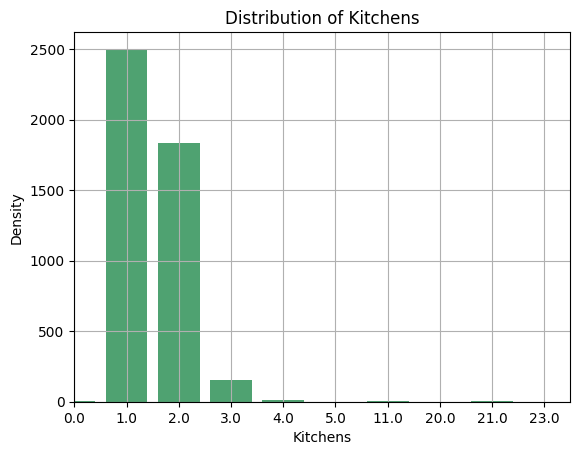

In [ ]:
sns.countplot(
   x= df['kitchens'],
   color='#41B06E',
)
plt.title("Distribution of Kitchens")
plt.xlabel("Kitchens")
plt.ylabel("Density")
plt.xlim(left=0)  # Set minimum x-axis limit to 0
plt.grid(True)
plt.show()

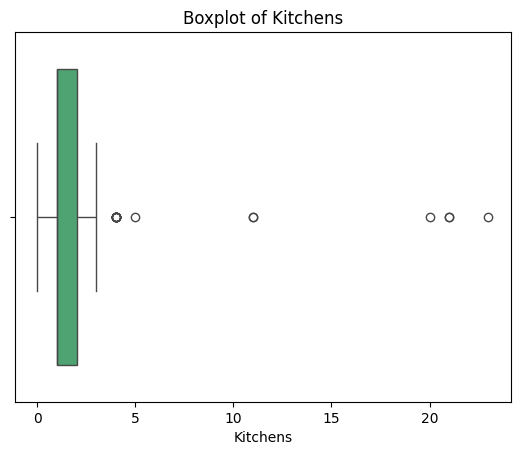

In [ ]:
sns.boxplot(
    x=df['kitchens'],
    color='#41B06E'
)
plt.title("Boxplot of Kitchens")
plt.xlabel("Kitchens")
plt.show()

In [ ]:
q1=df['kitchens'].quantile(0.25)
q3=df['kitchens'].quantile(0.75)
iqr=q3-q1
print("IQR is :",iqr)
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(lower_bound, upper_bound)

outliers = df[(df['kitchens'] < lower_bound) | (df['kitchens'] > upper_bound)]

IQR is : 1.0
-0.5 3.5


In [ ]:
outliers['kitchens'].describe()

count    18.000000
mean      8.666667
std       7.284149
min       4.000000
25%       4.000000
50%       4.000000
75%      11.000000
max      23.000000
Name: kitchens, dtype: float64

In [ ]:
df[(df['kitchens']>=4)]

type  price         location  area  bedrooms  bathrooms  built_in_year  \
276   House   4.70             G-14   5.0       4.0        5.0         2023.0   
528   House   8.15             G-13  10.9       NaN        NaN         2023.0   
746   House  11.00      DHA Defence  20.0       6.0        6.0         2023.0   
1213   Flat   4.00  Kashmir Highway   9.8       3.0        3.0            NaN   
2324  House   9.50      DHA Defence  20.0       6.0        NaN         2023.0   
2343  House  17.00      DHA Defence  38.0       7.0        6.0            NaN   
2915   Flat   2.45             E-11   6.2       2.0        2.0         2018.0   
2982  House  16.90      DHA Defence  30.0       5.0        NaN         2023.0   
3724  House   5.50       Top City 1  10.0       6.0        6.0         2024.0   
3779   Flat   2.75      DHA Defence  14.2       4.0        4.0         2018.0   
3897  House  10.00             B-17  24.0       NaN        NaN         2020.0   
4537  House   7.25             B-17  20.0       6.0        6.0         2024.0   
4570  House  14.50             G-13  20.0       8.0        6.0         2018.0   
4699  House  12.50      DHA Defence  20.0       5.0        6.0         2023.0   
4945   Flat   1.25             G-13   7.8       3.0        3.0         2019.0   
5296  House   6.50           Tarnol  20.0       6.0        6.0         2023.0   
6358  House   2.38      Bahria Town   5.0       3.0        5.0         2023.0   
6514  House   3.80      DHA Defence  14.0       5.0        5.0         2023.0   

      kitchens  parking_spaces  store_rooms  servant_quarters  floors  \
276       20.0             1.0          NaN               1.0     NaN   
528        4.0             3.0          4.0               2.0     NaN   
746        4.0             3.0          2.0               1.0     NaN   
1213       4.0             4.0          NaN               1.0     NaN   
2324       4.0             3.0          1.0               2.0     NaN   
2343       4.0             4.0          NaN               NaN     NaN   
2915       4.0             1.0          2.0               4.0     NaN   
2982       5.0             4.0          2.0               2.0     NaN   
3724       4.0             2.0          NaN               1.0     NaN   
3779      11.0             1.0          1.0               1.0    18.0   
3897       4.0             1.0          1.0               NaN     NaN   
4537       4.0             NaN          NaN               NaN     NaN   
4570      21.0             4.0          1.0               1.0     NaN   
4699       4.0             3.0          1.0               2.0     NaN   
4945      11.0             1.0          1.0               1.0     1.0   
5296       4.0             3.0          2.0               1.0     NaN   
6358      23.0             1.0          1.0               1.0     NaN   
6514      21.0             2.0          1.0               1.0     NaN   

      furnished  electricity_backup  double_glazed_windows  \
276         NaN                 1.0                    1.0   
528         NaN                 1.0                    1.0   
746         NaN                 1.0                    1.0   
1213        NaN                 NaN                    1.0   
2324        NaN                 1.0                    1.0   
2343        1.0                 1.0                    1.0   
2915        NaN                 1.0                    NaN   
2982        1.0                 1.0                    1.0   
3724        NaN                 1.0                    1.0   
3779        NaN                 1.0                    1.0   
3897        NaN                 1.0                    NaN   
4537        NaN                 NaN                    1.0   
4570        NaN                 1.0                    1.0   
4699        1.0                 1.0                    1.0   
4945        1.0                 1.0                    1.0   
5296        NaN                 1.0                    NaN   
6358        NaN          

In [ ]:
df.loc[df['kitchens'] >=4 , 'kitchens'] = 3

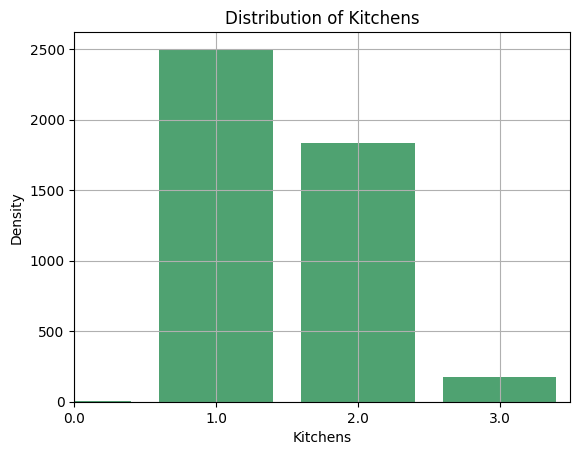

In [ ]:
sns.countplot(
   x= df['kitchens'],
   color='#41B06E',
)
plt.title("Distribution of Kitchens")
plt.xlabel("Kitchens")
plt.ylabel("Density")
plt.xlim(left=0)  # Set minimum x-axis limit to 0
plt.grid(True)
plt.show()

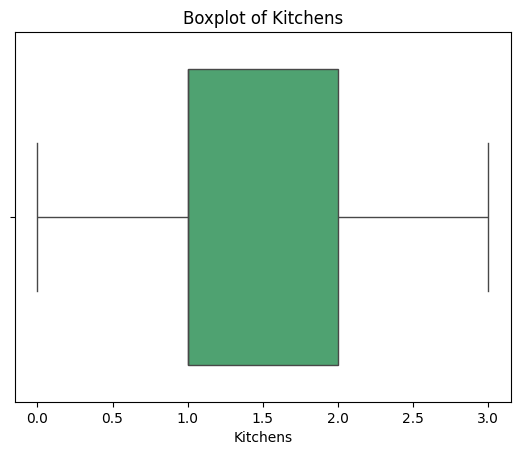

In [ ]:
sns.boxplot(
    x=df['kitchens'],
    color='#41B06E'
)
plt.title("Boxplot of Kitchens")
plt.xlabel("Kitchens")
plt.show()

In [ ]:
df.describe()

price         area     bedrooms    bathrooms  built_in_year  \
count  5872.000000  5872.000000  5530.000000  5445.000000    3557.000000   
mean      7.443646    10.975715     3.765280     3.760882    2020.705370   
std      11.842372     9.776219     1.968155     1.872726       4.763272   
min       0.180000     0.700000     1.000000     1.000000    2000.000000   
25%       1.367500     4.800000     2.000000     2.000000    2020.000000   
50%       3.170000     7.550000     3.000000     4.000000    2023.000000   
75%       8.912500    14.200000     5.000000     6.000000    2023.000000   
max      99.000000    86.000000     9.000000     9.000000    2024.000000   

          kitchens  parking_spaces  store_rooms  servant_quarters  \
count  4510.000000      4462.00000  3280.000000       3278.000000   
mean      1.482483         4.91468     1.200610          1.314216   
std       0.574484        38.85665     0.502509          0.858346   
min       0.000000         0.00000     0.000000          0.000000   
25%       1.000000         1.00000     1.000000          1.000000   
50%       1.000000         1.00000     1.000000          1.000000   
75%       2.000000         3.00000     1.000000          2.000000   
max       3.000000      1600.00000    11.000000         31.000000   

            floors  furnished  electricity_backup  double_glazed_windows  \
count  1543.000000     2146.0              4279.0                 4146.0   
mean      4.475697        1.0                 1.0                    1.0   
std      26.056170        0.0                 0.0                    0.0   
min       0.000000        1.0                 1.0                    1.0   
25%       1.000000        1.0                 1.0                    1.0   
50%       3.000000        1.0                 1.0                    1.0   
75%       5.000000        1.0                 1.0                    1.0   
max    1014.000000        1.0                 1.0                    1.0   

       central_air_conditioning  central_heating  waste_disposal  \
count                    3570.0           3421.0          4167.0   
mean                        1.0              1.0             1.0   
std                         0.0              0.0             0.0   
min                         1.0              1.0             1.0   
25%                         1.0              1.0             1.0   
50%                         1.0              1.0             1.0   
75%                         1.0              1.0             1.0   
max                         1.0              1.0             1.0   

       drawing_room  dining_room  study_room  prayer_room  powder_room  \
count        4388.0       4335.0      3320.0       3228.0       3679.0   
mean            1.0          1.0         1.0          1.0          1.0   
std             0.0          0.0         0.0          0.0          0.0   
min             1.0          1.0         1.0          1.0          1.0   
25%             1.0          1.0         1.0          1.0          1.0   
50%             1.0          1.0         1.0          1.0          1.0   
75%             1.0          1.0         1.0          1.0          1.0   
max             1.0          1.0         1.0          1.0          1.0   

          gym  steam_room  lounge_or_sitting_room  laundry_room  \
count  3917.0      2968.0                  4263.0        3945.0   
mean      1.0         1.0                     1.0           1.0   
std       0.0         0.0                     0.0           0.0   
min       1.0         1.0                     1.0           1.0   
25%       1.0         1.0                     1.0           1.0   
50%       1.0         1.0                     1.0           1.0   
75%       1.0         1.0                     1.0           1.0   
max       1.0         1.0                     1.0           1.0   

       broadband_internet_access  satellite_or_cable_tv_ready  intercom  \
count                     4402.0                       4250.0 

### **3.6 Parking Spaces**

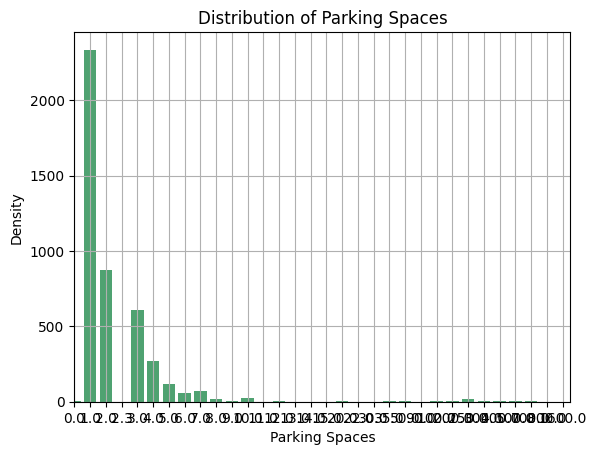

In [ ]:
sns.countplot(
   x= df['parking_spaces'],
   color='#41B06E',
)
plt.title("Distribution of Parking Spaces")
plt.xlabel("Parking Spaces")
plt.ylabel("Density")
plt.xlim(left=0)  # Set minimum x-axis limit to 0
plt.grid(True)
plt.show()

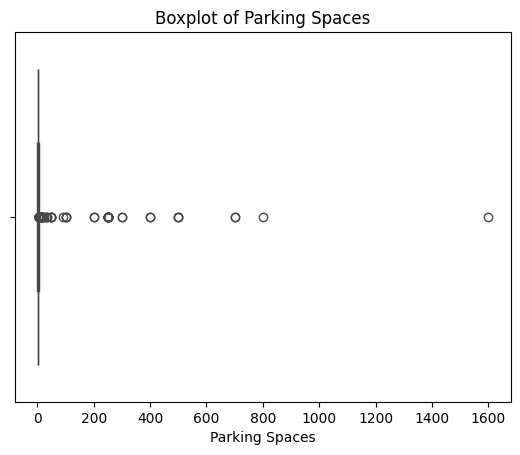

In [ ]:
sns.boxplot(
    x=df['parking_spaces'],
    color='#41B06E'
)
plt.title("Boxplot of Parking Spaces")
plt.xlabel("Parking Spaces")
plt.show()

In [ ]:
q1=df['parking_spaces'].quantile(0.25)
q3=df['parking_spaces'].quantile(0.75)
iqr=q3-q1
print("IQR is :",iqr)
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(lower_bound, upper_bound)

outliers = df[(df['parking_spaces'] < lower_bound) | (df['parking_spaces'] > upper_bound)]

IQR is : 2.0
-2.0 6.0


In [ ]:
outliers['parking_spaces'].describe()

count     184.000000
mean       75.978261
std       177.416800
min         7.000000
25%         7.000000
50%         8.000000
75%        20.000000
max      1600.000000
Name: parking_spaces, dtype: float64

In [ ]:
df['parking_spaces'].describe()

count    4462.00000
mean        4.91468
std        38.85665
min         0.00000
25%         1.00000
50%         1.00000
75%         3.00000
max      1600.00000
Name: parking_spaces, dtype: float64

In [ ]:
df[(df['parking_spaces']>20)]

type  price                       location  area  bedrooms  bathrooms  \
43     Flat   0.50                           G-13   1.9       1.0        1.0   
112    Flat   0.62                           G-13   5.1       2.0        2.0   
139    Flat   1.70                           D-17   7.0       3.0        3.0   
146    Flat   0.93             Faisal Town - F-18   2.6       1.0        1.0   
186    Flat   0.85                           E-11   3.1       1.0        1.0   
265    Flat   1.22                        Gulberg   3.9       2.0        3.0   
636    Flat   0.42                  Pakistan Town   2.0       1.0        1.0   
763    Flat   0.64                           G-13   5.1       2.0        2.0   
855    Flat   1.60                           G-11   3.1       2.0        2.0   
970    Flat   0.64                           G-13   5.1       2.0        2.0   
1032   Flat   1.50                           G-15   4.8       2.0        2.0   
1235   Flat   0.45                           G-13   3.1       1.0        2.0   
1419   Flat   1.20                           E-11   3.8       1.0        1.0   
1955   Flat   0.65                           G-13   5.1       2.0        2.0   
2060   Flat   0.75                           G-13   6.0       2.0        2.0   
2165   Flat   4.70                           F-11  11.6       3.0        3.0   
2314   Flat   0.60                     Top City 1   2.7       1.0        1.0   
2530   Flat   1.25                           E-11   4.9       2.0        2.0   
2541   Flat   1.55                           G-13   9.1       3.0        3.0   
2582  House   2.65                           I-11   4.0       5.0        5.0   
2826   Flat   1.75                        Gulberg   6.2       2.0        2.0   
2914   Flat   0.64                           G-13   5.1       2.0        2.0   
3064   Flat   2.28                           E-11   7.1       3.0        3.0   
3205  House   8.25                            G-9  10.0       6.0        6.0   
3310   Flat   1.69                    DHA Defence   7.1       3.0        3.0   
3369   Flat   1.20                           G-13   7.8       3.0        3.0   
3377   Flat   0.67  Islamabad - Murree Expressway   5.4       NaN        NaN   
3518   Flat   7.50                      Blue Area   5.8       1.0        2.0   
3530  House   6.70                      Bani Gala  20.0       4.0        5.0   
3577   Flat   0.63                           G-13   5.1       2.0        2.0   
3597   Flat   0.75                           G-13   6.0       2.0        2.0   
3668   Flat   0.74                           G-13   6.0       2.0        2.0   
3979   Flat   1.27                           B-17   4.4       1.0        1.0   
4275   Flat   0.80                           E-11   1.8       1.0        1.0   
4388  House  25.00                            F-7  20.0       6.0        NaN   
4575   Flat   1.60                           G-13   9.1       3.0        3.0   
4673   Flat   0.75                           G-13   6.0       2.0        2.0   
4898   Flat   1.60                           G-13   9.1       3.0        3.0   
5000   Flat   0.62                           G-13   5.1       2.0        2.0   
5189   Flat   1.25                           E-11   3.8       1.0        1.0   
5200   Flat   0.20                           C-18   0.9       NaN        NaN   
5319   Flat   1.25                           G-13   7.8       3.0        3.0   
5682   Flat   6.00                            F-8  20.0       6.0        6.0   
6068   Flat   0.62                           G-13   5.1       2.0        2.0   
6351  House   3.15                   River Garden   7.0       6.0        6.0   

      built_in_year  kitchens  parking_spaces  store_rooms  servant_quarters  \
43           2022.0       1.0           500.0          1.0               1.0   
112          2023.0       1.0           250.0          1.0               NaN   
139          2023.0       1.0            50.0          1.0               1.0   
146   

In [ ]:
df['bedrooms'].median()

3.0

In [ ]:
df.loc[df['parking_spaces']>15,'parking_spaces']=df['bedrooms'].median()


In [ ]:
df[(df['parking_spaces']>10) & (df['area']<30)]

type  price     location  area  bedrooms  bathrooms  built_in_year  \
2366   Flat   1.87  DHA Defence   7.9       NaN        NaN         2023.0   
6276  House   1.70   Burma Town   5.0       8.0        NaN         2022.0   

      kitchens  parking_spaces  store_rooms  servant_quarters  floors  \
2366       1.0            12.0          NaN               NaN     NaN   
6276       3.0            12.0          3.0               NaN     NaN   

      furnished  electricity_backup  double_glazed_windows  \
2366        1.0                 1.0                    1.0   
6276        1.0                 1.0                    1.0   

      central_air_conditioning  central_heating  waste_disposal  drawing_room  \
2366                       1.0              1.0             1.0           NaN   
6276                       NaN              NaN             NaN           NaN   

      dining_room  study_room  prayer_room  powder_room  gym  steam_room  \
2366          NaN         NaN          NaN          NaN  1.0         NaN   
6276          1.0         NaN          NaN          NaN  NaN         NaN   

      lounge_or_sitting_room  laundry_room  broadband_internet_access  \
2366                     NaN           NaN                        1.0   
6276                     NaN           NaN                        NaN   

      satellite_or_cable_tv_ready  intercom  community_lawn_or_garden  \
2366                          1.0       1.0                       1.0   
6276                          NaN       NaN                       NaN   

      community_swimming_pool  community_gym  first_aid_or_medical_centre  \
2366                      1.0            1.0                          1.0   
6276                      NaN            NaN                          NaN   

      day_care_centre  kids_play_area  barbeque_area  mosque  \
2366              1.0             1.0            1.0     1.0   
6276              NaN             NaN            NaN     NaN   

      community_centre  lawn_or_garden  swimming_pool  sauna  jacuzzi  \
2366               1.0             1.0            1.0    1.0      1.0   
6276               NaN             NaN            NaN    NaN      NaN   

      maintenance_staff  security_staff  facilities_for_disabled  
2366                1.0             1.0                      1.0  
6276                NaN             NaN                      NaN

In [ ]:
df=df[~((df['parking_spaces']>10) & (df['area']<30))]

In [ ]:
df[(df['parking_spaces']>6)  & (df['area']<30) ]

type  price location  area  bedrooms  bathrooms  built_in_year  \
81    House  50.00      E-7  24.0       6.0        6.0            NaN   
198   House  18.50     F-11  26.0       6.0        6.0            NaN   
429   House  45.00      F-8  20.0       4.0        NaN         2015.0   
451   House   3.58     G-14   4.0       3.0        5.0            NaN   
483    Flat   0.60     D-17   3.8       2.0        2.0         2015.0   
...     ...    ...      ...   ...       ...        ...            ...   
5801   Flat   0.85     E-11   3.1       1.0        1.0         2017.0   
5805  House  27.00      F-8  20.0       5.0        NaN         2009.0   
6341  House  46.99      F-7  26.0       6.0        NaN         2023.0   
6409  House  40.00      F-8  20.0       8.0        NaN         2024.0   
6495  House  18.00     F-11  26.0       6.0        6.0            NaN   

      kitchens  parking_spaces  store_rooms  servant_quarters  floors  \
81         NaN             7.0          1.0               NaN     NaN   
198        2.0             8.0          2.0               2.0     NaN   
429        2.0            10.0          NaN               2.0     NaN   
451        NaN            10.0          NaN               1.0     NaN   
483        2.0             7.0          1.0               2.0     1.0   
...        ...             ...          ...               ...     ...   
5801       3.0             7.0          3.0               3.0     NaN   
5805       2.0             7.0          NaN               2.0     NaN   
6341       2.0             7.0          1.0               2.0     NaN   
6409       2.0             7.0          NaN               2.0     NaN   
6495       2.0             7.0          2.0               2.0     NaN   

      furnished  electricity_backup  double_glazed_windows  \
81          NaN                 NaN                    1.0   
198         1.0                 1.0                    1.0   
429         NaN                 1.0                    1.0   
451         1.0                 NaN                    1.0   
483         1.0                 1.0                    1.0   
...         ...                 ...                    ...   
5801        NaN                 1.0                    1.0   
5805        NaN                 1.0                    1.0   
6341        1.0                 1.0                    1.0   
6409        NaN                 1.0                    1.0   
6495        NaN                 1.0                    1.0   

      central_air_conditioning  central_heating  waste_disposal  drawing_room  \
81                         1.0              1.0             NaN           1.0   
198                        NaN              1.0             1.0           1.0   
429                        1.0              1.0             1.0           1.0   
451                        1.0              1.0             1.0           NaN   
483                        1.0              1.0             1.0           1.0   
...                        ...              ...             ...           ...   
5801                       1.0              1.0             NaN           1.0   
5805                       1.0              1.0             NaN           1.0   
6341                       1.0              1.0             1.0           1.0   
6409                       1.0              1.0             NaN           1.0   
6495                       1.0              1.0             1.0           1.0   

      dining_room  study_room  prayer_room  powder_room  gym  steam_room  \
81            1.0         1.0          1.0          1.0  1.0         1.0   
198           1.0         1.0          1.0          1.0  1.0         1.0   
429           1.0         1.0          1.0          1.0  1.0         1.0   
451           NaN         NaN          NaN          NaN  1.0         NaN   
483           1.0         1.0          1.0          1.0  1.0         1.0   
...           ...         ...          ...          ...  ...         ...   
580

In [ ]:
upper_bound

6.0

In [ ]:
df.loc[(df['parking_spaces']>6)  & (df['area']<30) ,'parking_spaces']=upper_bound

In [ ]:
df.describe()

price         area     bedrooms    bathrooms  built_in_year  \
count  5870.000000  5870.000000  5529.000000  5445.000000    3555.000000   
mean      7.445574    10.977257     3.764514     3.760882    2020.704360   
std      11.843929     9.777491     1.967509     1.872726       4.764407   
min       0.180000     0.700000     1.000000     1.000000    2000.000000   
25%       1.362500     4.800000     2.000000     2.000000    2020.000000   
50%       3.175000     7.550000     3.000000     4.000000    2023.000000   
75%       8.937500    14.200000     5.000000     6.000000    2023.000000   
max      99.000000    86.000000     9.000000     9.000000    2024.000000   

          kitchens  parking_spaces  store_rooms  servant_quarters  \
count  4508.000000     4460.000000  3279.000000       3278.000000   
mean      1.482254        2.033475     1.200061          1.314216   
std       0.574122        1.519116     0.501602          0.858346   
min       0.000000        0.000000     0.000000          0.000000   
25%       1.000000        1.000000     1.000000          1.000000   
50%       1.000000        1.000000     1.000000          1.000000   
75%       2.000000        3.000000     1.000000          2.000000   
max       3.000000       15.000000    11.000000         31.000000   

            floors  furnished  electricity_backup  double_glazed_windows  \
count  1543.000000     2144.0              4277.0                 4144.0   
mean      4.475697        1.0                 1.0                    1.0   
std      26.056170        0.0                 0.0                    0.0   
min       0.000000        1.0                 1.0                    1.0   
25%       1.000000        1.0                 1.0                    1.0   
50%       3.000000        1.0                 1.0                    1.0   
75%       5.000000        1.0                 1.0                    1.0   
max    1014.000000        1.0                 1.0                    1.0   

       central_air_conditioning  central_heating  waste_disposal  \
count                    3569.0           3420.0          4166.0   
mean                        1.0              1.0             1.0   
std                         0.0              0.0             0.0   
min                         1.0              1.0             1.0   
25%                         1.0              1.0             1.0   
50%                         1.0              1.0             1.0   
75%                         1.0              1.0             1.0   
max                         1.0              1.0             1.0   

       drawing_room  dining_room  study_room  prayer_room  powder_room  \
count        4388.0       4334.0      3320.0       3228.0       3679.0   
mean            1.0          1.0         1.0          1.0          1.0   
std             0.0          0.0         0.0          0.0          0.0   
min             1.0          1.0         1.0          1.0          1.0   
25%             1.0          1.0         1.0          1.0          1.0   
50%             1.0          1.0         1.0          1.0          1.0   
75%             1.0          1.0         1.0          1.0          1.0   
max             1.0          1.0         1.0          1.0          1.0   

          gym  steam_room  lounge_or_sitting_room  laundry_room  \
count  3916.0      2968.0                  4263.0        3945.0   
mean      1.0         1.0                     1.0           1.0   
std       0.0         0.0                     0.0           0.0   
min       1.0         1.0                     1.0           1.0   
25%       1.0         1.0                     1.0           1.0   
50%       1.0         1.0                     1.0           1.0   
75%       1.0         1.0                     1.0           1.0   
max       1.0         1.0                     1.0           1.0   

       broadband_internet_access  satellite_or_cable_tv_ready  intercom  \
count                     4401.0                       4249.0 

In [ ]:
df['parking_spaces'].unique()

array([ 7. ,  nan,  3. ,  1. ,  2. ,  4. ,  6. ,  5. , 10. ,  0. ,  8. ,
       15. , 12. ,  2.3, 11. ,  9. , 13. , 14. ])

In [ ]:
df[df['parking_spaces']==2.3]

type  price            location  area  bedrooms  bathrooms  \
4084  House    5.5  PWD Housing Scheme  12.0       6.0        6.0   

      built_in_year  kitchens  parking_spaces  store_rooms  servant_quarters  \
4084         2018.0       2.0             2.3          2.0               1.0   

      floors  furnished  electricity_backup  double_glazed_windows  \
4084     NaN        1.0                 1.0                    1.0   

      central_air_conditioning  central_heating  waste_disposal  drawing_room  \
4084                       1.0              NaN             1.0           1.0   

      dining_room  study_room  prayer_room  powder_room  gym  steam_room  \
4084          1.0         1.0          1.0          1.0  1.0         1.0   

      lounge_or_sitting_room  laundry_room  broadband_internet_access  \
4084                     1.0           1.0                        1.0   

      satellite_or_cable_tv_ready  intercom  community_lawn_or_garden  \
4084                          1.0       1.0                       1.0   

      community_swimming_pool  community_gym  first_aid_or_medical_centre  \
4084                      1.0            1.0                          1.0   

      day_care_centre  kids_play_area  barbeque_area  mosque  \
4084              1.0             1.0            1.0     1.0   

      community_centre  lawn_or_garden  swimming_pool  sauna  jacuzzi  \
4084               1.0             1.0            1.0    1.0      1.0   

      maintenance_staff  security_staff  facilities_for_disabled  
4084                NaN             NaN                      NaN

In [ ]:
df=df[df['parking_spaces']!=2.3]

In [ ]:
df['parking_spaces'].unique()

array([ 7., nan,  3.,  1.,  2.,  4.,  6.,  5., 10.,  0.,  8., 15., 12.,
       11.,  9., 13., 14.])

In [ ]:
df[df['parking_spaces']>=10]

type  price   location  area  bedrooms  bathrooms  built_in_year  \
322   House   65.0        F-8  72.0       5.0        6.0         2015.0   
924   House   65.0        F-6  60.0       5.0        5.0         2001.0   
1527  House   60.0        F-7  50.0       5.0        6.0         2000.0   
1579  House   17.5       G-10  32.0       7.0        6.0         2023.0   
2298  House   35.0       F-10  40.0       8.0        NaN         2024.0   
2371  House   69.0        G-6  66.0       8.0        6.0         2018.0   
2754  House   57.0        F-7  42.0       5.0        NaN         2003.0   
2778  House   70.0        E-7  32.0       6.0        NaN         2023.0   
3216  House   99.0        G-6  74.0       7.0        6.0         2018.0   
3491  House   41.6        F-7  40.0       5.0        6.0         2015.0   
3801  House   81.0        F-8  72.0       6.0        NaN         2003.0   
3919  House   22.0  Bani Gala  48.0       6.0        6.0            NaN   
3966  House   35.3        F-8  36.0       5.0        6.0         2008.0   
4367  House   89.0        F-8  72.0       4.0        4.0         2015.0   
4735  House   30.0        G-6  48.0       6.0        6.0         2015.0   
5071  House   97.0        G-6  74.0       7.0        6.0         2012.0   
5333  House   43.0        F-8  40.0       6.0        6.0         2015.0   
5470  House   70.0        G-6  66.0       7.0        6.0         2010.0   
5941  House   76.0        F-6  48.0       7.0        6.0         2022.0   
6231  House   35.0        F-8  36.0       5.0        6.0         2000.0   
6424  House   42.0        F-6  40.0       7.0        6.0         2024.0   

      kitchens  parking_spaces  store_rooms  servant_quarters  floors  \
322        1.0            10.0          1.0               2.0     NaN   
924        2.0            10.0          1.0               4.0     NaN   
1527       1.0            10.0          1.0               2.0     NaN   
1579       2.0            10.0          2.0               2.0     NaN   
2298       1.0            10.0          1.0               1.0     NaN   
2371       2.0            15.0          NaN               2.0     NaN   
2754       2.0            10.0          NaN               2.0     NaN   
2778       2.0            10.0          1.0               2.0     NaN   
3216       2.0            12.0          1.0               2.0     NaN   
3491       1.0            10.0          2.0               2.0     NaN   
3801       2.0            12.0          NaN               2.0     NaN   
3919       NaN            10.0          1.0               NaN     NaN   
3966       1.0            10.0          2.0               2.0     NaN   
4367       2.0            11.0          2.0               2.0     NaN   
4735       1.0            12.0          2.0               2.0     NaN   
5071       2.0            13.0          3.0               3.0     NaN   
5333       1.0            10.0          1.0               1.0     NaN   
5470       2.0            14.0          2.0               5.0     NaN   
5941       3.0            12.0          3.0               3.0     NaN   
6231       1.0            10.0          1.0               2.0     NaN   
6424       1.0            10.0          1.0               1.0     NaN   

      furnished  electricity_backup  double_glazed_windows  \
322         1.0                 1.0                    1.0   
924         NaN                 1.0                    1.0   
1527        NaN                 NaN                    1.0   
1579        1.0                 1.0                    1.0   
2298        1.0                 1.0                    1.0   
2371        NaN                 1.0                    1.0   
2754        NaN                 1.0                    1.0   
2778        NaN                 1.0                    1.0   
3216        NaN                 1.0                    1.0   
3491        1.0                 1.0                    1.0   
3801        NaN                 1.0                    1.0   
3919 

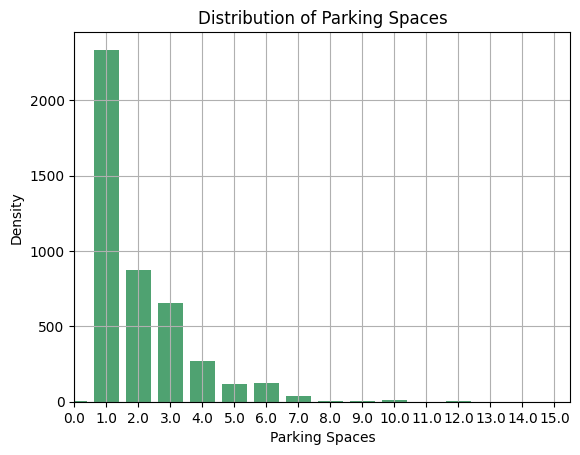

In [ ]:
sns.countplot(
   x= df['parking_spaces'],
   color='#41B06E',
)
plt.title("Distribution of Parking Spaces")
plt.xlabel("Parking Spaces")
plt.ylabel("Density")
plt.xlim(left=0)  # Set minimum x-axis limit to 0
plt.grid(True)
plt.show()


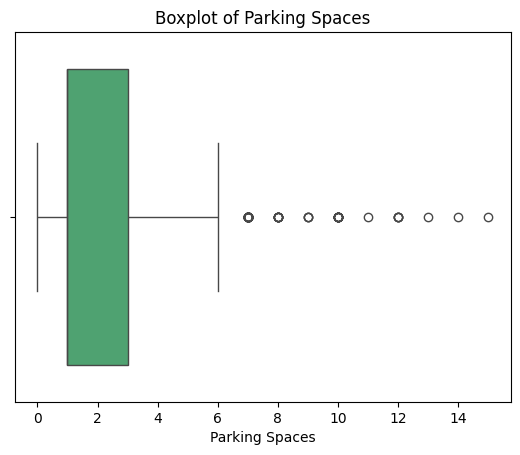

In [ ]:
sns.boxplot(
    x=df['parking_spaces'],
    color='#41B06E'
)
plt.title("Boxplot of Parking Spaces")
plt.xlabel("Parking Spaces")
plt.show()

In [ ]:
df.describe()

price         area     bedrooms    bathrooms  built_in_year  \
count  5869.000000  5869.000000  5528.000000  5444.000000    3554.000000   
mean      7.445906    10.977083     3.764110     3.760470    2020.705121   
std      11.844911     9.778315     1.967457     1.872652       4.764861   
min       0.180000     0.700000     1.000000     1.000000    2000.000000   
25%       1.360000     4.800000     2.000000     2.000000    2020.000000   
50%       3.170000     7.500000     3.000000     4.000000    2023.000000   
75%       8.950000    14.200000     5.000000     6.000000    2023.000000   
max      99.000000    86.000000     9.000000     9.000000    2024.000000   

          kitchens  parking_spaces  store_rooms  servant_quarters  \
count  4507.000000     4459.000000  3278.000000       3277.000000   
mean      1.482139        2.033416     1.199817          1.314312   
std       0.574134        1.519281     0.501484          0.858460   
min       0.000000        0.000000     0.000000          0.000000   
25%       1.000000        1.000000     1.000000          1.000000   
50%       1.000000        1.000000     1.000000          1.000000   
75%       2.000000        3.000000     1.000000          2.000000   
max       3.000000       15.000000    11.000000         31.000000   

            floors  furnished  electricity_backup  double_glazed_windows  \
count  1543.000000     2143.0              4276.0                 4143.0   
mean      4.475697        1.0                 1.0                    1.0   
std      26.056170        0.0                 0.0                    0.0   
min       0.000000        1.0                 1.0                    1.0   
25%       1.000000        1.0                 1.0                    1.0   
50%       3.000000        1.0                 1.0                    1.0   
75%       5.000000        1.0                 1.0                    1.0   
max    1014.000000        1.0                 1.0                    1.0   

       central_air_conditioning  central_heating  waste_disposal  \
count                    3568.0           3420.0          4165.0   
mean                        1.0              1.0             1.0   
std                         0.0              0.0             0.0   
min                         1.0              1.0             1.0   
25%                         1.0              1.0             1.0   
50%                         1.0              1.0             1.0   
75%                         1.0              1.0             1.0   
max                         1.0              1.0             1.0   

       drawing_room  dining_room  study_room  prayer_room  powder_room  \
count        4387.0       4333.0      3319.0       3227.0       3678.0   
mean            1.0          1.0         1.0          1.0          1.0   
std             0.0          0.0         0.0          0.0          0.0   
min             1.0          1.0         1.0          1.0          1.0   
25%             1.0          1.0         1.0          1.0          1.0   
50%             1.0          1.0         1.0          1.0          1.0   
75%             1.0          1.0         1.0          1.0          1.0   
max             1.0          1.0         1.0          1.0          1.0   

          gym  steam_room  lounge_or_sitting_room  laundry_room  \
count  3915.0      2967.0                  4262.0        3944.0   
mean      1.0         1.0                     1.0           1.0   
std       0.0         0.0                     0.0           0.0   
min       1.0         1.0                     1.0           1.0   
25%       1.0         1.0                     1.0           1.0   
50%       1.0         1.0                     1.0           1.0   
75%       1.0         1.0                     1.0           1.0   
max       1.0         1.0                     1.0           1.0   

       broadband_internet_access  satellite_or_cable_tv_ready  intercom  \
count                     4400.0                       4248.0 

### **3.7 Store Rooms**

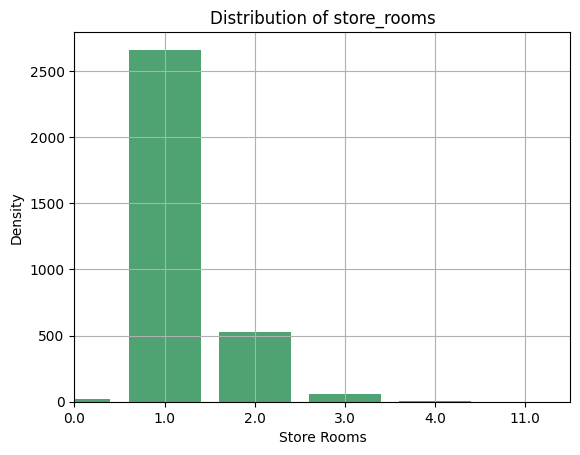

In [ ]:
sns.countplot(
   x= df['store_rooms'],
   color='#41B06E',
)
plt.title("Distribution of store_rooms")
plt.xlabel("Store Rooms")
plt.ylabel("Density")
plt.xlim(left=0)  # Set minimum x-axis limit to 0
plt.grid(True)
plt.show()


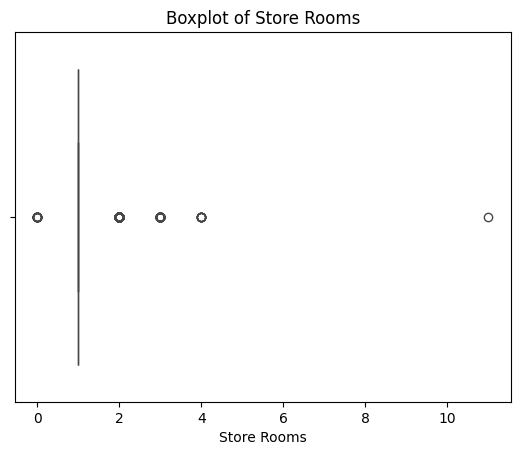

In [ ]:
sns.boxplot(
    x=df['store_rooms'],
    color='#41B06E'
)
plt.title("Boxplot of Store Rooms")
plt.xlabel("Store Rooms")
plt.show()

In [ ]:
q1=df['store_rooms'].quantile(0.25)
q3=df['store_rooms'].quantile(0.75)
iqr=q3-q1
print("IQR is :",iqr)
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['store_rooms'] < lower_bound) | (df['store_rooms'] > upper_bound)]


IQR is : 0.0


In [ ]:
df[(df['store_rooms']>3) & (df['type']=='Flat')]

type  price location  area  bedrooms  bathrooms  built_in_year  \
2629  Flat   0.52     E-11   1.2       1.0        1.0            NaN   
6125  Flat   2.10  Gulberg   5.9       1.0        1.0            NaN   

      kitchens  parking_spaces  store_rooms  servant_quarters  floors  \
2629       1.0             2.0          4.0               NaN     NaN   
6125       1.0             1.0         11.0               1.0     5.0   

      furnished  electricity_backup  double_glazed_windows  \
2629        1.0                 1.0                    1.0   
6125        1.0                 1.0                    1.0   

      central_air_conditioning  central_heating  waste_disposal  drawing_room  \
2629                       1.0              1.0             1.0           1.0   
6125                       1.0              1.0             NaN           1.0   

      dining_room  study_room  prayer_room  powder_room  gym  steam_room  \
2629          1.0         1.0          1.0          1.0  1.0         1.0   
6125          1.0         1.0          1.0          1.0  1.0         1.0   

      lounge_or_sitting_room  laundry_room  broadband_internet_access  \
2629                     1.0           1.0                        1.0   
6125                     1.0           1.0                        1.0   

      satellite_or_cable_tv_ready  intercom  community_lawn_or_garden  \
2629                          1.0       1.0                       1.0   
6125                          1.0       1.0                       1.0   

      community_swimming_pool  community_gym  first_aid_or_medical_centre  \
2629                      1.0            1.0                          1.0   
6125                      1.0            1.0                          1.0   

      day_care_centre  kids_play_area  barbeque_area  mosque  \
2629              1.0             1.0            1.0     1.0   
6125              1.0             1.0            1.0     1.0   

      community_centre  lawn_or_garden  swimming_pool  sauna  jacuzzi  \
2629               1.0             1.0            1.0    1.0      1.0   
6125               1.0             1.0            1.0    NaN      NaN   

      maintenance_staff  security_staff  facilities_for_disabled  
2629                1.0             1.0                      1.0  
6125                NaN             NaN                      NaN

In [ ]:
df.loc[(df['store_rooms']>3) & (df['type']=='Flat'),'store_rooms']=1

In [ ]:
df[((df['store_rooms']==3) & (df['price']<1))]

type  price location  area  bedrooms  bathrooms  built_in_year  \
567   Flat   0.80     I-16   6.6       4.0        4.0         2023.0   
580   Flat   0.60     E-17   3.2       2.0        2.0         2022.0   
2585  Flat   0.57     D-17   4.0       3.0        3.0         2018.0   
5801  Flat   0.85     E-11   3.1       1.0        1.0         2017.0   

      kitchens  parking_spaces  store_rooms  servant_quarters  floors  \
567        1.0             5.0          3.0               1.0     1.0   
580        3.0             1.0          3.0               2.0     1.0   
2585       1.0             2.0          3.0               3.0     2.0   
5801       3.0             6.0          3.0               3.0     NaN   

      furnished  electricity_backup  double_glazed_windows  \
567         1.0                 1.0                    1.0   
580         1.0                 1.0                    1.0   
2585        1.0                 1.0                    1.0   
5801        NaN                 1.0                    1.0   

      central_air_conditioning  central_heating  waste_disposal  drawing_room  \
567                        1.0              1.0             1.0           1.0   
580                        1.0              1.0             1.0           1.0   
2585                       1.0              1.0             1.0           1.0   
5801                       1.0              1.0             NaN           1.0   

      dining_room  study_room  prayer_room  powder_room  gym  steam_room  \
567           1.0         1.0          1.0          1.0  1.0         1.0   
580           1.0         1.0          1.0          1.0  1.0         1.0   
2585          1.0         1.0          1.0          1.0  1.0         1.0   
5801          1.0         1.0          1.0          1.0  1.0         1.0   

      lounge_or_sitting_room  laundry_room  broadband_internet_access  \
567                      1.0           1.0                        1.0   
580                      1.0           1.0                        1.0   
2585                     1.0           1.0                        1.0   
5801                     1.0           1.0                        1.0   

      satellite_or_cable_tv_ready  intercom  community_lawn_or_garden  \
567                           1.0       1.0                       1.0   
580                           1.0       1.0                       1.0   
2585                          1.0       1.0                       1.0   
5801                          1.0       1.0                       1.0   

      community_swimming_pool  community_gym  first_aid_or_medical_centre  \
567                       1.0            1.0                          1.0   
580                       1.0            1.0                          1.0   
2585                      1.0            1.0                          1.0   
5801                      1.0            1.0                          1.0   

      day_care_centre  kids_play_area  barbeque_area  mosque  \
567               1.0             1.0            1.0     1.0   
580               1.0             1.0            1.0     1.0   
2585              1.0             1.0            1.0     1.0   
5801              1.0             1.0            1.0     1.0   

      community_centre  lawn_or_garden  swimming_pool  sauna  jacuzzi  \
567                1.0             1.0            1.0    1.0      1.0   
580                1.0             1.0            1.0    1.0      1.0   
2585               1.0             1.0            1.0    1.0      1.0   
5801               1.0             1.0            1.0    1.0      1.0   

      maintenance_staff  security_staff  facilities_for_disabled  
567                 1.0             1.0                      1.0  
580                 NaN             NaN                      NaN  
2585                1.0             1.0                      1.0  
5801                NaN             NaN                      NaN

In [ ]:
df['store_rooms'].unique()

array([nan,  2.,  1.,  0.,  3.,  4.])

In [ ]:
df[(df['store_rooms']==3) & (df['bedrooms']<3)]

type  price     location  area  bedrooms  bathrooms  built_in_year  \
580   Flat   0.60         E-17   3.2       2.0        2.0         2022.0   
1491  Flat   1.63  Bahria Town   5.6       2.0        NaN         2023.0   
5261  Flat   1.65  Bahria Town   6.1       2.0        3.0         2022.0   
5668  Flat   2.35  DHA Defence   6.9       2.0        2.0         2024.0   
5801  Flat   0.85         E-11   3.1       1.0        1.0         2017.0   

      kitchens  parking_spaces  store_rooms  servant_quarters  floors  \
580        3.0             1.0          3.0               2.0     1.0   
1491       3.0             1.0          3.0               2.0     1.0   
5261       3.0             4.0          3.0               2.0     NaN   
5668       3.0             4.0          3.0               3.0     NaN   
5801       3.0             6.0          3.0               3.0     NaN   

      furnished  electricity_backup  double_glazed_windows  \
580         1.0                 1.0                    1.0   
1491        1.0                 1.0                    1.0   
5261        NaN                 1.0                    1.0   
5668        NaN                 1.0                    1.0   
5801        NaN                 1.0                    1.0   

      central_air_conditioning  central_heating  waste_disposal  drawing_room  \
580                        1.0              1.0             1.0           1.0   
1491                       1.0              1.0             1.0           1.0   
5261                       1.0              1.0             1.0           1.0   
5668                       1.0              1.0             1.0           1.0   
5801                       1.0              1.0             NaN           1.0   

      dining_room  study_room  prayer_room  powder_room  gym  steam_room  \
580           1.0         1.0          1.0          1.0  1.0         1.0   
1491          1.0         1.0          1.0          1.0  1.0         1.0   
5261          1.0         NaN          NaN          NaN  NaN         NaN   
5668          1.0         1.0          1.0          1.0  1.0         1.0   
5801          1.0         1.0          1.0          1.0  1.0         1.0   

      lounge_or_sitting_room  laundry_room  broadband_internet_access  \
580                      1.0           1.0                        1.0   
1491                     1.0           1.0                        1.0   
5261                     1.0           1.0                        1.0   
5668                     1.0           1.0                        1.0   
5801                     1.0           1.0                        1.0   

      satellite_or_cable_tv_ready  intercom  community_lawn_or_garden  \
580                           1.0       1.0                       1.0   
1491                          1.0       1.0                       1.0   
5261                          1.0       1.0                       NaN   
5668                          1.0       1.0                       1.0   
5801                          1.0       1.0                       1.0   

      community_swimming_pool  community_gym  first_aid_or_medical_centre  \
580                       1.0            1.0                          1.0   
1491                      1.0            1.0                          1.0   
5261                      NaN            NaN                          NaN   
5668                      1.0            1.0                          1.0   
5801                      1.0            1.0                          1.0   

      day_care_centre  kids_play_area  barbeque_area  mosque  \
580               1.0             1.0            1.0     1.0   
1491              1.0             1.0            1.0     1.0   
5261              NaN             NaN            NaN     NaN   
5668              1.0             1.0            1.0     1.0   
5801              1.0             1.0            1.0     1.0   

      community_centre  lawn_or_garden  swimming_pool  sauna  jacuz

In [ ]:
df.loc[((df['store_rooms']==3) & (df['bedrooms']<3)),'store_rooms']=1

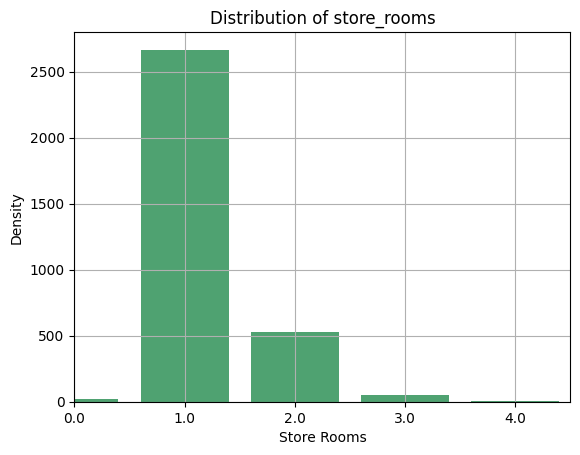

In [ ]:
sns.countplot(
   x= df['store_rooms'],
   color='#41B06E',
)
plt.title("Distribution of store_rooms")
plt.xlabel("Store Rooms")
plt.ylabel("Density")
plt.xlim(left=0)  # Set minimum x-axis limit to 0
plt.grid(True)
plt.show()


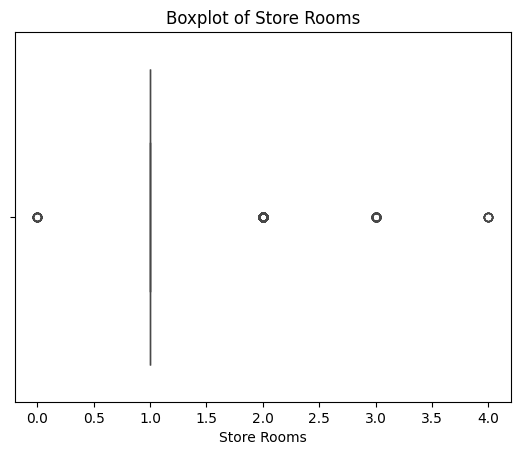

In [ ]:
sns.boxplot(
    x=df['store_rooms'],
    color='#41B06E'
)
plt.title("Boxplot of Store Rooms")
plt.xlabel("Store Rooms")
plt.show()

In [ ]:
df.describe()

price         area     bedrooms    bathrooms  built_in_year  \
count  5869.000000  5869.000000  5528.000000  5444.000000    3554.000000   
mean      7.445906    10.977083     3.764110     3.760470    2020.705121   
std      11.844911     9.778315     1.967457     1.872652       4.764861   
min       0.180000     0.700000     1.000000     1.000000    2000.000000   
25%       1.360000     4.800000     2.000000     2.000000    2020.000000   
50%       3.170000     7.500000     3.000000     4.000000    2023.000000   
75%       8.950000    14.200000     5.000000     6.000000    2023.000000   
max      99.000000    86.000000     9.000000     9.000000    2024.000000   

          kitchens  parking_spaces  store_rooms  servant_quarters  \
count  4507.000000     4459.000000  3278.000000       3277.000000   
mean      1.482139        2.033416     1.192800          1.314312   
std       0.574134        1.519281     0.463548          0.858460   
min       0.000000        0.000000     0.000000          0.000000   
25%       1.000000        1.000000     1.000000          1.000000   
50%       1.000000        1.000000     1.000000          1.000000   
75%       2.000000        3.000000     1.000000          2.000000   
max       3.000000       15.000000     4.000000         31.000000   

            floors  furnished  electricity_backup  double_glazed_windows  \
count  1543.000000     2143.0              4276.0                 4143.0   
mean      4.475697        1.0                 1.0                    1.0   
std      26.056170        0.0                 0.0                    0.0   
min       0.000000        1.0                 1.0                    1.0   
25%       1.000000        1.0                 1.0                    1.0   
50%       3.000000        1.0                 1.0                    1.0   
75%       5.000000        1.0                 1.0                    1.0   
max    1014.000000        1.0                 1.0                    1.0   

       central_air_conditioning  central_heating  waste_disposal  \
count                    3568.0           3420.0          4165.0   
mean                        1.0              1.0             1.0   
std                         0.0              0.0             0.0   
min                         1.0              1.0             1.0   
25%                         1.0              1.0             1.0   
50%                         1.0              1.0             1.0   
75%                         1.0              1.0             1.0   
max                         1.0              1.0             1.0   

       drawing_room  dining_room  study_room  prayer_room  powder_room  \
count        4387.0       4333.0      3319.0       3227.0       3678.0   
mean            1.0          1.0         1.0          1.0          1.0   
std             0.0          0.0         0.0          0.0          0.0   
min             1.0          1.0         1.0          1.0          1.0   
25%             1.0          1.0         1.0          1.0          1.0   
50%             1.0          1.0         1.0          1.0          1.0   
75%             1.0          1.0         1.0          1.0          1.0   
max             1.0          1.0         1.0          1.0          1.0   

          gym  steam_room  lounge_or_sitting_room  laundry_room  \
count  3915.0      2967.0                  4262.0        3944.0   
mean      1.0         1.0                     1.0           1.0   
std       0.0         0.0                     0.0           0.0   
min       1.0         1.0                     1.0           1.0   
25%       1.0         1.0                     1.0           1.0   
50%       1.0         1.0                     1.0           1.0   
75%       1.0         1.0                     1.0           1.0   
max       1.0         1.0                     1.0           1.0   

       broadband_internet_access  satellite_or_cable_tv_ready  intercom  \
count                     4400.0                       4248.0 

### **3.8 Servent Quarters**

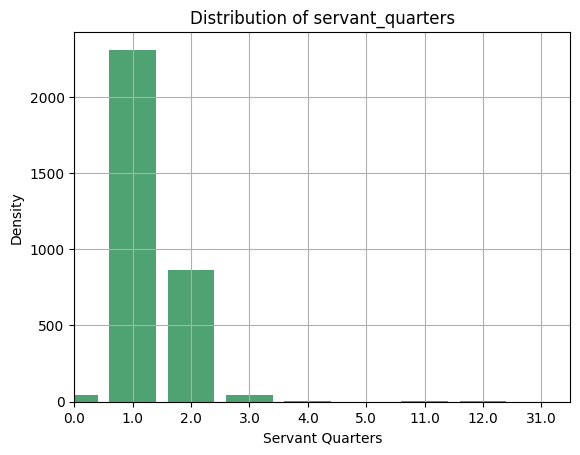

In [ ]:
sns.countplot(
   x= df['servant_quarters'],
   color='#41B06E',
)
plt.title("Distribution of servant_quarters")
plt.xlabel("Servant Quarters")
plt.ylabel("Density")
plt.xlim(left=0)  # Set minimum x-axis limit to 0
plt.grid(True)
plt.show()

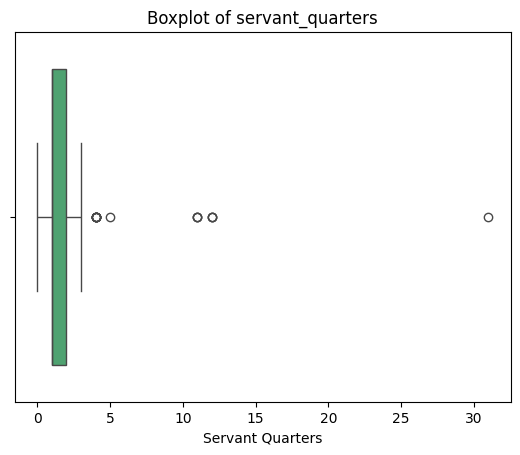

In [ ]:
sns.boxplot(
    x=df['servant_quarters'],
    color='#41B06E'
)
plt.title("Boxplot of servant_quarters")
plt.xlabel("Servant Quarters")
plt.show()


In [ ]:
q1=df['servant_quarters'].quantile(0.25)
q3=df['servant_quarters'].quantile(0.75)
iqr=q3-q1
print("IQR is :",iqr)
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['servant_quarters'] < lower_bound) | (df['servant_quarters'] > upper_bound)]

IQR is : 1.0


In [ ]:
df[(df['servant_quarters']>3) & (df['bedrooms']<8)]

type  price         location  area  bedrooms  bathrooms  built_in_year  \
808    Flat   0.64             G-13   5.1       2.0        2.0         2023.0   
924   House  65.00              F-6  60.0       5.0        5.0         2001.0   
1228  House   6.25      Bahria Town  10.0       5.0        6.0            NaN   
2058  House   2.55  Naval Anchorage   5.0       4.0        4.0         2023.0   
2093   Flat   0.80     River Garden   4.7       2.0        2.0         2023.0   
2735  House  65.00              F-7  50.0       7.0        4.0            NaN   
2915   Flat   2.45             E-11   6.2       2.0        2.0         2018.0   
3131  House   1.60             E-18   5.0       4.0        6.0         2023.0   
3450   Flat   0.60             I-12   3.9       2.0        2.0            NaN   
3662  House  38.00              F-8  38.0       5.0        6.0         2015.0   
3775   Flat   3.65      DHA Defence  11.6       3.0        4.0         2020.0   
5470  House  70.00              G-6  66.0       7.0        6.0         2010.0   
5602  House  13.50      DHA Defence  20.0       6.0        6.0         2024.0   

      kitchens  parking_spaces  store_rooms  servant_quarters  floors  \
808        1.0             2.0          1.0               4.0     3.0   
924        2.0            10.0          1.0               4.0     NaN   
1228       2.0             1.0          1.0               4.0     NaN   
2058       NaN             1.0          NaN              12.0     NaN   
2093       NaN             1.0          2.0              12.0     1.0   
2735       NaN             NaN          NaN               4.0     NaN   
2915       3.0             1.0          2.0               4.0     NaN   
3131       2.0             1.0          1.0              12.0     NaN   
3450       1.0             2.0          1.0              11.0     2.0   
3662       1.0             1.0          NaN              31.0     NaN   
3775       1.0             2.0          1.0              11.0     2.0   
5470       2.0            14.0          2.0               5.0     NaN   
5602       NaN             2.0          1.0              11.0     NaN   

      furnished  electricity_backup  double_glazed_windows  \
808         1.0                 1.0                    1.0   
924         NaN                 1.0                    1.0   
1228        1.0                 1.0                    1.0   
2058        NaN                 1.0                    NaN   
2093        NaN                 1.0                    1.0   
2735        NaN                 NaN                    NaN   
2915        NaN                 1.0                    NaN   
3131        1.0                 1.0                    1.0   
3450        NaN                 NaN                    1.0   
3662        1.0                 1.0                    1.0   
3775        1.0                 1.0                    1.0   
5470        NaN                 1.0                    1.0   
5602        NaN                 1.0                    NaN   

      central_air_conditioning  central_heating  waste_disposal  drawing_room  \
808                        1.0              1.0             1.0           1.0   
924                        1.0              1.0             NaN           1.0   
1228                       1.0              1.0             1.0           1.0   
2058                       NaN              NaN             NaN           1.0   
2093                       1.0              1.0             1.0           1.0   
2735                       NaN              NaN             NaN           NaN   
2915                       NaN              NaN             NaN           1.0   
3131                       1.0              1.0             1.0           1.0   
3450                       1.0              1.0             NaN           1.0   
3662                       1.0              1.0             1.0           1.0   
3775                       1.0              1.0             1.0           1.0   
5470    

In [ ]:
df.loc[(df['servant_quarters']>3) & (df['bedrooms']<8),'servant_quarters']=2

In [ ]:
df['servant_quarters'].unique()

array([ 2., nan,  1.,  3.,  0.,  4.])

In [ ]:
df[(df['servant_quarters']==3) & (df['bedrooms']<6)]

type  price     location  area  bedrooms  bathrooms  built_in_year  \
9      Flat   2.55  DHA Defence  10.0       3.0        4.0         2015.0   
1357   Flat   1.64  Bahria Town   6.3       1.0        1.0         2018.0   
2585   Flat   0.57         D-17   4.0       3.0        3.0         2018.0   
3909  House   0.58   Khanna Pul   2.7       4.0        4.0         2020.0   
4079   Flat   1.12      GT Road   4.2       2.0        2.0            NaN   
4174   Flat   1.30         G-13   7.8       3.0        3.0         2023.0   
4731   Flat   0.50         E-11   2.9       1.0        1.0         2016.0   
5546  House  11.50  DHA Defence  20.0       5.0        6.0         2024.0   
5668   Flat   2.35  DHA Defence   6.9       2.0        2.0         2024.0   
5801   Flat   0.85         E-11   3.1       1.0        1.0         2017.0   
6183  House   4.90  Bahria Town  10.0       5.0        6.0         2019.0   
6318  House  33.00          F-6  32.0       5.0        5.0            NaN   

      kitchens  parking_spaces  store_rooms  servant_quarters  floors  \
9          1.0             4.0          1.0               3.0     NaN   
1357       2.0             6.0          2.0               3.0     NaN   
2585       1.0             2.0          3.0               3.0     2.0   
3909       2.0             5.0          1.0               3.0     NaN   
4079       1.0             2.0          1.0               3.0     NaN   
4174       1.0             1.0          1.0               3.0    11.0   
4731       1.0             1.0          1.0               3.0     1.0   
5546       2.0             3.0          2.0               3.0     NaN   
5668       3.0             4.0          1.0               3.0     NaN   
5801       3.0             6.0          1.0               3.0     NaN   
6183       2.0             1.0          1.0               3.0     NaN   
6318       3.0             1.0          3.0               3.0     NaN   

      furnished  electricity_backup  double_glazed_windows  \
9           1.0                 1.0                    1.0   
1357        1.0                 1.0                    1.0   
2585        1.0                 1.0                    1.0   
3909        1.0                 1.0                    1.0   
4079        NaN                 1.0                    1.0   
4174        1.0                 1.0                    1.0   
4731        NaN                 1.0                    1.0   
5546        NaN                 1.0                    NaN   
5668        NaN                 1.0                    1.0   
5801        NaN                 1.0                    1.0   
6183        1.0                 1.0                    1.0   
6318        NaN                 NaN                    1.0   

      central_air_conditioning  central_heating  waste_disposal  drawing_room  \
9                          1.0              1.0             1.0           1.0   
1357                       1.0              1.0             1.0           1.0   
2585                       1.0              1.0             1.0           1.0   
3909                       1.0              1.0             1.0           1.0   
4079                       1.0              1.0             1.0           1.0   
4174                       1.0              1.0             1.0           1.0   
4731                       1.0              1.0             1.0           1.0   
5546                       NaN              NaN             1.0           1.0   
5668                       1.0              1.0             1.0           1.0   
5801                       1.0              1.0             NaN           1.0   
6183                       1.0              1.0             1.0           1.0   
6318                       NaN              NaN             NaN           1.0   

      dining_room  study_room  prayer_room  powder_room  gym  steam_room  \
9             1.0         1.0          1.0          1.0  1.0         1.0   
1357          1.0         1.0          1.0

In [ ]:
df.loc[(df['servant_quarters']==3) & (df['bedrooms']<6),'servant_quarters']=2

In [ ]:
df[(df['servant_quarters']==4)]

type  price location  area  bedrooms  bathrooms  built_in_year  \
2743   Flat   0.65     B-17   3.7       NaN        NaN         2024.0   
3956  House  36.00      F-8  36.0       8.0        5.0            NaN   
6031   Flat   2.03     D-17   6.0       NaN        NaN            NaN   

      kitchens  parking_spaces  store_rooms  servant_quarters  floors  \
2743       3.0             2.0          2.0               4.0     NaN   
3956       NaN             NaN          NaN               4.0     NaN   
6031       1.0             2.0          1.0               4.0     6.0   

      furnished  electricity_backup  double_glazed_windows  \
2743        1.0                 1.0                    1.0   
3956        NaN                 NaN                    NaN   
6031        NaN                 1.0                    1.0   

      central_air_conditioning  central_heating  waste_disposal  drawing_room  \
2743                       1.0              1.0             1.0           1.0   
3956                       NaN              NaN             NaN           NaN   
6031                       1.0              1.0             1.0           1.0   

      dining_room  study_room  prayer_room  powder_room  gym  steam_room  \
2743          1.0         1.0          1.0          1.0  1.0         1.0   
3956          NaN         NaN          NaN          NaN  NaN         NaN   
6031          1.0         1.0          1.0          1.0  1.0         1.0   

      lounge_or_sitting_room  laundry_room  broadband_internet_access  \
2743                     1.0           1.0                        1.0   
3956                     NaN           NaN                        NaN   
6031                     1.0           1.0                        1.0   

      satellite_or_cable_tv_ready  intercom  community_lawn_or_garden  \
2743                          1.0       NaN                       1.0   
3956                          NaN       NaN                       NaN   
6031                          1.0       1.0                       1.0   

      community_swimming_pool  community_gym  first_aid_or_medical_centre  \
2743                      1.0            1.0                          1.0   
3956                      NaN            NaN                          NaN   
6031                      1.0            1.0                          1.0   

      day_care_centre  kids_play_area  barbeque_area  mosque  \
2743              1.0             1.0            1.0     1.0   
3956              NaN             NaN            NaN     NaN   
6031              1.0             1.0            1.0     1.0   

      community_centre  lawn_or_garden  swimming_pool  sauna  jacuzzi  \
2743               1.0             1.0            1.0    1.0      NaN   
3956               NaN             1.0            NaN    NaN      NaN   
6031               1.0             1.0            1.0    NaN      NaN   

      maintenance_staff  security_staff  facilities_for_disabled  
2743                1.0             1.0                      NaN  
3956                NaN             1.0                      NaN  
6031                1.0             1.0                      NaN

In [ ]:
df=df[~(df['servant_quarters']==4)]

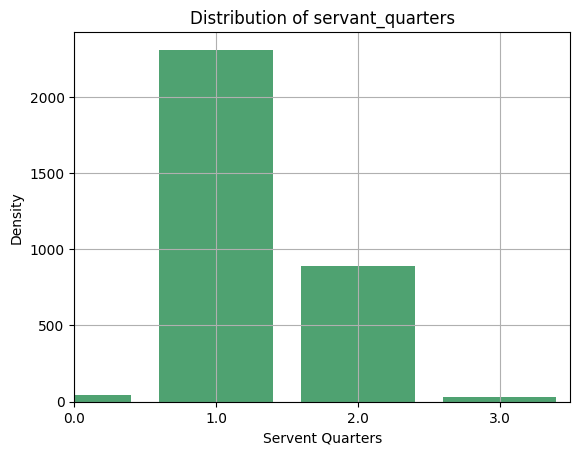

In [ ]:
sns.countplot(
   x= df['servant_quarters'],
   color='#41B06E',
)
plt.title("Distribution of servant_quarters")
plt.xlabel("Servent Quarters")
plt.ylabel("Density")
plt.xlim(left=0)  # Set minimum x-axis limit to 0
plt.grid(True)
plt.show()


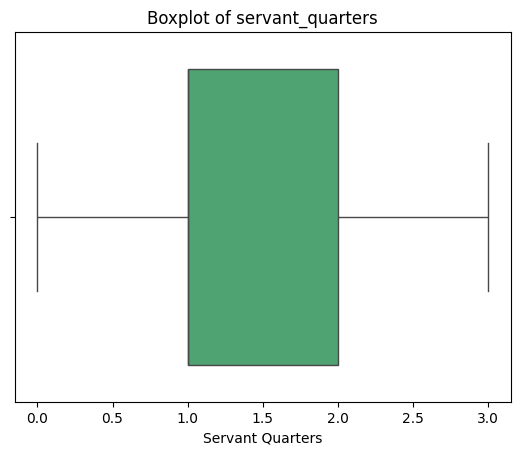

In [ ]:
sns.boxplot(
    x=df['servant_quarters'],
    color='#41B06E'
)
plt.title("Boxplot of servant_quarters")
plt.xlabel("Servant Quarters")
plt.show()

In [ ]:
df.describe()

price         area     bedrooms    bathrooms  built_in_year  \
count  5866.000000  5866.000000  5527.000000  5443.000000    3553.000000   
mean      7.443120    10.974906     3.763344     3.760243    2020.704194   
std      11.841527     9.774678     1.966810     1.872749       4.765211   
min       0.180000     0.700000     1.000000     1.000000    2000.000000   
25%       1.362500     4.800000     2.000000     2.000000    2020.000000   
50%       3.175000     7.550000     3.000000     4.000000    2023.000000   
75%       8.937500    14.200000     5.000000     6.000000    2023.000000   
max      99.000000    86.000000     9.000000     9.000000    2024.000000   

          kitchens  parking_spaces  store_rooms  servant_quarters  \
count  4505.000000     4457.000000  3276.000000       3274.000000   
mean      1.481909        2.033431     1.192613          1.277947   
std       0.573771        1.519622     0.463462          0.497801   
min       0.000000        0.000000     0.000000          0.000000   
25%       1.000000        1.000000     1.000000          1.000000   
50%       1.000000        1.000000     1.000000          1.000000   
75%       2.000000        3.000000     1.000000          2.000000   
max       3.000000       15.000000     4.000000          3.000000   

            floors  furnished  electricity_backup  double_glazed_windows  \
count  1542.000000     2142.0              4274.0                 4141.0   
mean      4.474708        1.0                 1.0                    1.0   
std      26.064594        0.0                 0.0                    0.0   
min       0.000000        1.0                 1.0                    1.0   
25%       1.000000        1.0                 1.0                    1.0   
50%       3.000000        1.0                 1.0                    1.0   
75%       5.000000        1.0                 1.0                    1.0   
max    1014.000000        1.0                 1.0                    1.0   

       central_air_conditioning  central_heating  waste_disposal  \
count                    3566.0           3418.0          4163.0   
mean                        1.0              1.0             1.0   
std                         0.0              0.0             0.0   
min                         1.0              1.0             1.0   
25%                         1.0              1.0             1.0   
50%                         1.0              1.0             1.0   
75%                         1.0              1.0             1.0   
max                         1.0              1.0             1.0   

       drawing_room  dining_room  study_room  prayer_room  powder_room  \
count        4385.0       4331.0      3317.0       3225.0       3676.0   
mean            1.0          1.0         1.0          1.0          1.0   
std             0.0          0.0         0.0          0.0          0.0   
min             1.0          1.0         1.0          1.0          1.0   
25%             1.0          1.0         1.0          1.0          1.0   
50%             1.0          1.0         1.0          1.0          1.0   
75%             1.0          1.0         1.0          1.0          1.0   
max             1.0          1.0         1.0          1.0          1.0   

          gym  steam_room  lounge_or_sitting_room  laundry_room  \
count  3913.0      2965.0                  4260.0        3942.0   
mean      1.0         1.0                     1.0           1.0   
std       0.0         0.0                     0.0           0.0   
min       1.0         1.0                     1.0           1.0   
25%       1.0         1.0                     1.0           1.0   
50%       1.0         1.0                     1.0           1.0   
75%       1.0         1.0                     1.0           1.0   
max       1.0         1.0                     1.0           1.0   

       broadband_internet_access  satellite_or_cable_tv_ready  intercom  \
count                     4398.0                       4246.0 

### **3.9 Floors**

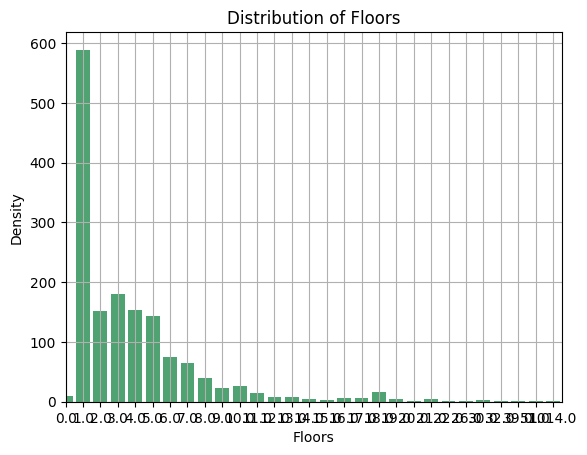

In [ ]:
sns.countplot(
   x= df['floors'],
   color='#41B06E',
)
plt.title("Distribution of Floors")
plt.xlabel("Floors")
plt.ylabel("Density")
plt.xlim(left=0)  # Set minimum x-axis limit to 0
plt.grid(True)
plt.show()

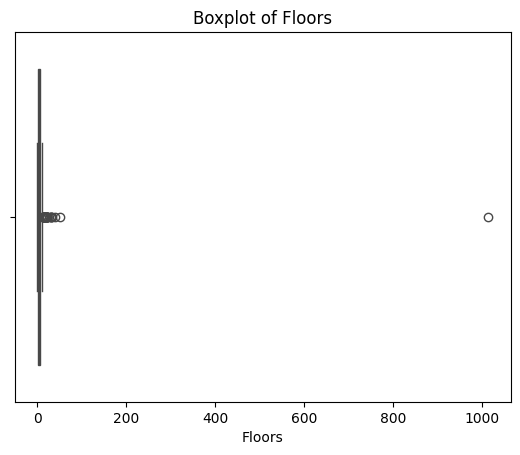

In [ ]:
sns.boxplot(
    x=df['floors'],
    color='#41B06E'
)
plt.title("Boxplot of Floors")
plt.xlabel("Floors")
plt.show()

In [ ]:
q1=df['floors'].quantile(0.25)
q3=df['floors'].quantile(0.75)
iqr=q3-q1
print("IQR is :",iqr)
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['floors'] < lower_bound) | (df['floors'] > upper_bound)]

IQR is : 4.0


In [ ]:
upper_bound

11.0

In [ ]:
outliers['floors'].describe()

count      72.000000
mean       31.944444
std       117.540510
min        12.000000
25%        14.000000
50%        18.000000
75%        19.000000
max      1014.000000
Name: floors, dtype: float64

In [ ]:
df[(df['floors']>20)]

type  price              location  area  bedrooms  bathrooms  \
337   Flat   5.00             Blue Area   4.4       2.0        3.0   
448   Flat   0.48    Faisal Town - F-18   2.9       1.0        1.0   
750   Flat   0.85           DHA Defence   3.9       1.0        1.0   
1346  Flat   0.85           DHA Defence   3.9       1.0        1.0   
1596  Flat   2.90           DHA Defence   7.3       3.0        3.0   
1866  Flat   0.85           DHA Defence   3.9       1.0        1.0   
1912  Flat   0.50                 FECHS   3.1       2.0        2.0   
1940  Flat   1.78           DHA Defence   8.7       3.0        3.0   
2813  Flat   1.49           DHA Defence   5.3       3.0        4.0   
2962  Flat   2.76  Islamabad Expressway   6.7       2.0        2.0   
4841  Flat   7.00    Diplomatic Enclave   4.8       1.0        1.0   
5208  Flat   0.85           DHA Defence   3.9       1.0        1.0   
5712  Flat   2.30           DHA Defence   6.0       3.0        3.0   
6129  Flat   0.85           DHA Defence   3.9       1.0        1.0   

      built_in_year  kitchens  parking_spaces  store_rooms  servant_quarters  \
337          2018.0       NaN             2.0          NaN               NaN   
448          2024.0       1.0             1.0          NaN               NaN   
750          2024.0       1.0             1.0          2.0               2.0   
1346         2024.0       1.0             1.0          NaN               1.0   
1596            NaN       1.0             1.0          1.0               NaN   
1866         2024.0       1.0             1.0          NaN               NaN   
1912         2018.0       1.0             NaN          NaN               NaN   
1940            NaN       1.0             2.0          1.0               1.0   
2813         2024.0       2.0             1.0          1.0               1.0   
2962         2022.0       1.0             1.0          NaN               2.0   
4841         2018.0       NaN             2.0          NaN               NaN   
5208            NaN       1.0             1.0          1.0               NaN   
5712            NaN       1.0             1.0          1.0               1.0   
6129            NaN       1.0             1.0          NaN               NaN   

      floors  furnished  electricity_backup  double_glazed_windows  \
337     32.0        1.0                 1.0                    1.0   
448   1014.0        NaN                 1.0                    1.0   
750     21.0        NaN                 1.0                    1.0   
1346    21.0        NaN                 1.0                    1.0   
1596    30.0        NaN                 1.0                    1.0   
1866    21.0        NaN                 1.0                    1.0   
1912    51.0        NaN                 1.0                    NaN   
1940    30.0        NaN                 1.0                    NaN   
2813    39.0        1.0                 1.0                    1.0   
2962    30.0        1.0                 1.0                    1.0   
4841    26.0        1.0                 1.0                    1.0   
5208    21.0        NaN                 1.0                    1.0   
5712    22.0        1.0                 1.0                    1.0   
6129    21.0        NaN                 1.0                    1.0   

      central_air_conditioning  central_heating  waste_disposal  drawing_room  \
337                        1.0              1.0             1.0           1.0   
448                        NaN              NaN             1.0           NaN   
750                        1.0              1.0             1.0           1.0   
1346                       1.0              1.0             1.0           1.0   
1596                       1.0              1.0             1.0           NaN   
1866                       1.0              1.0             1.0           NaN   
1912                       NaN              NaN             1.0           1.0   
1940                       1.0              NaN        

In [ ]:
df=df[~(df['floors']>20)]

In [ ]:
df['floors'].unique()

array([nan,  6.,  1.,  4.,  5.,  7.,  2., 18.,  3.,  8.,  9., 12., 11.,
        0., 13., 16., 10., 17., 19., 14., 15., 20.])

In [ ]:
df.loc[(df['floors']>10),'floors']=10

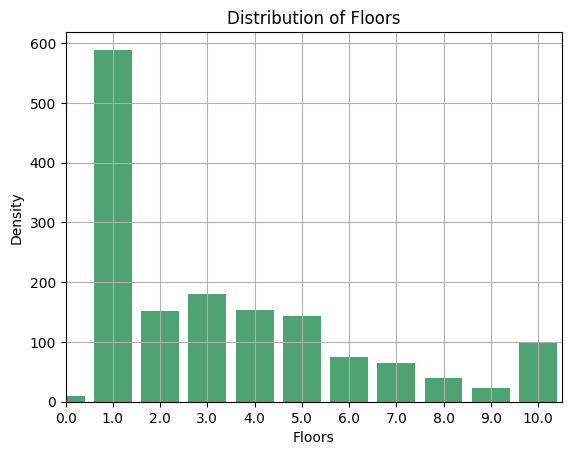

In [ ]:
sns.countplot(
   x= df['floors'],
   color='#41B06E',
)
plt.title("Distribution of Floors")
plt.xlabel("Floors")
plt.ylabel("Density")
plt.xlim(left=0)  # Set minimum x-axis limit to 0
plt.grid(True)
plt.show()

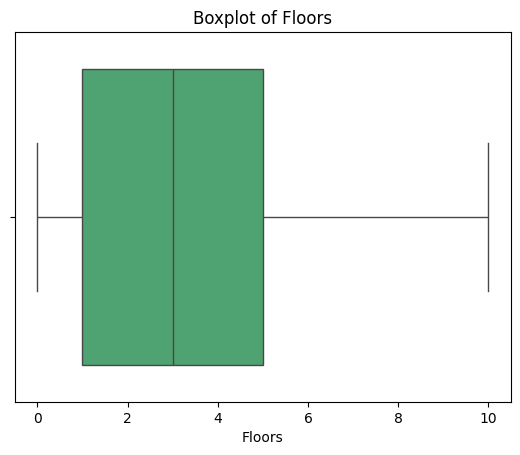

In [ ]:
sns.boxplot(
    x=df['floors'],
    color='#41B06E'
)
plt.title("Boxplot of Floors")
plt.xlabel("Floors")
plt.show()


In [ ]:
df.describe()

price         area     bedrooms    bathrooms  built_in_year  \
count  5852.000000  5852.000000  5513.000000  5429.000000    3544.000000   
mean      7.456063    10.989422     3.768366     3.764966    2020.701467   
std      11.852386     9.781527     1.966298     1.872113       4.768953   
min       0.180000     0.700000     1.000000     1.000000    2000.000000   
25%       1.370000     4.800000     2.000000     2.000000    2020.000000   
50%       3.200000     7.600000     3.000000     4.000000    2023.000000   
75%       9.000000    14.200000     5.000000     6.000000    2023.000000   
max      99.000000    86.000000     9.000000     9.000000    2024.000000   

          kitchens  parking_spaces  store_rooms  servant_quarters  \
count  4493.000000     4444.000000  3270.000000       3268.000000   
mean      1.482974        2.035779     1.192661          1.277846   
std       0.573989        1.521051     0.463611          0.497842   
min       0.000000        0.000000     0.000000          0.000000   
25%       1.000000        1.000000     1.000000          1.000000   
50%       1.000000        1.000000     1.000000          1.000000   
75%       2.000000        3.000000     1.000000          2.000000   
max       3.000000       15.000000     4.000000          3.000000   

            floors  furnished  electricity_backup  double_glazed_windows  \
count  1528.000000     2137.0              4260.0                 4129.0   
mean      3.380890        1.0                 1.0                    1.0   
std       2.735002        0.0                 0.0                    0.0   
min       0.000000        1.0                 1.0                    1.0   
25%       1.000000        1.0                 1.0                    1.0   
50%       3.000000        1.0                 1.0                    1.0   
75%       5.000000        1.0                 1.0                    1.0   
max      10.000000        1.0                 1.0                    1.0   

       central_air_conditioning  central_heating  waste_disposal  \
count                    3554.0           3407.0          4149.0   
mean                        1.0              1.0             1.0   
std                         0.0              0.0             0.0   
min                         1.0              1.0             1.0   
25%                         1.0              1.0             1.0   
50%                         1.0              1.0             1.0   
75%                         1.0              1.0             1.0   
max                         1.0              1.0             1.0   

       drawing_room  dining_room  study_room  prayer_room  powder_room  \
count        4376.0       4321.0      3307.0       3216.0       3667.0   
mean            1.0          1.0         1.0          1.0          1.0   
std             0.0          0.0         0.0          0.0          0.0   
min             1.0          1.0         1.0          1.0          1.0   
25%             1.0          1.0         1.0          1.0          1.0   
50%             1.0          1.0         1.0          1.0          1.0   
75%             1.0          1.0         1.0          1.0          1.0   
max             1.0          1.0         1.0          1.0          1.0   

          gym  steam_room  lounge_or_sitting_room  laundry_room  \
count  3900.0      2954.0                  4249.0        3930.0   
mean      1.0         1.0                     1.0           1.0   
std       0.0         0.0                     0.0           0.0   
min       1.0         1.0                     1.0           1.0   
25%       1.0         1.0                     1.0           1.0   
50%       1.0         1.0                     1.0           1.0   
75%       1.0         1.0                     1.0           1.0   
max       1.0         1.0                     1.0           1.0   

       broadband_internet_access  satellite_or_cable_tv_ready  intercom  \
count                     4385.0                       4234.0 

### **3.10 Price Column**

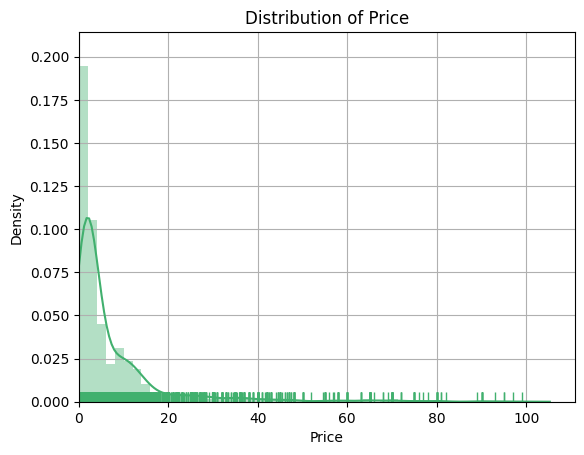

In [ ]:
# Create distribution plot with custom title and labels
sns.distplot(
    df['price'],
    color='#41B06E',
    kde=True,
    rug=True
)
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Density")
plt.xlim(left=0)  # Set minimum x-axis limit to 0
plt.grid(True)  # Add grid lines for better readability
plt.show()

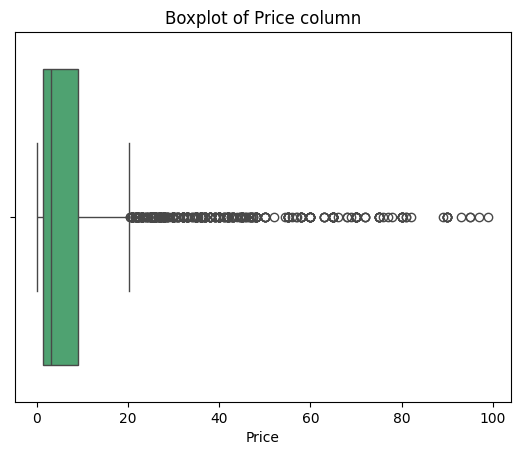

In [ ]:
sns.boxplot(
    x=df['price'],
    color='#41B06E'
)
plt.title("Boxplot of Price column")
plt.xlabel("Price")
plt.show()

In [ ]:
q1=df['price'].quantile(0.25)
q3=df['price'].quantile(0.75)
iqr=q3-q1
print("IQR is :",iqr)
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr


print(lower_bound, upper_bound)

outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

IQR is : 7.63
-10.075 20.445


In [ ]:
df['price'].describe()

count    5852.000000
mean        7.456063
std        11.852386
min         0.180000
25%         1.370000
50%         3.200000
75%         9.000000
max        99.000000
Name: price, dtype: float64

In [ ]:
outliers['price'].describe()

count    490.000000
mean      39.802918
std       17.903371
min       20.500000
25%       26.000000
50%       35.000000
75%       47.500000
max       99.000000
Name: price, dtype: float64

In [ ]:
df[df['price']>50]

type  price location  area  bedrooms  bathrooms  built_in_year  \
42    House   70.0      E-7  32.0       6.0        6.0         2023.0   
322   House   65.0      F-8  72.0       5.0        6.0         2015.0   
388   House   63.0      E-7  32.0       6.0        NaN         2023.0   
457   House   58.0      E-7  24.0       5.0        NaN            NaN   
481   House   72.0      E-7  40.0       6.0        6.0         2023.0   
...     ...    ...      ...   ...       ...        ...            ...   
6154  House   65.0      F-8  80.0       8.0        6.0         2016.0   
6251  House   58.0      E-7  24.0       6.0        NaN            NaN   
6287  House   60.0      F-7  40.0       7.0        NaN         2019.0   
6336  House   60.0      G-6  66.0       8.0        6.0         2023.0   
6517  House   75.0      G-6  86.0       5.0        5.0         2005.0   

      kitchens  parking_spaces  store_rooms  servant_quarters  floors  \
42         2.0             7.0          NaN               2.0     NaN   
322        1.0            10.0          1.0               2.0     NaN   
388        2.0             7.0          NaN               2.0     NaN   
457        1.0             1.0          1.0               1.0     NaN   
481        2.0             7.0          2.0               2.0     NaN   
...        ...             ...          ...               ...     ...   
6154       2.0             1.0          2.0               1.0     NaN   
6251       1.0             1.0          1.0               1.0     NaN   
6287       2.0             5.0          1.0               2.0     NaN   
6336       1.0             1.0          2.0               2.0     NaN   
6517       2.0             5.0          NaN               1.0     NaN   

      furnished  electricity_backup  double_glazed_windows  \
42          NaN                 1.0                    1.0   
322         1.0                 1.0                    1.0   
388         NaN                 1.0                    1.0   
457         NaN                 NaN                    1.0   
481         1.0                 1.0                    1.0   
...         ...                 ...                    ...   
6154        1.0                 1.0                    1.0   
6251        NaN                 NaN                    1.0   
6287        NaN                 NaN                    NaN   
6336        NaN                 1.0                    1.0   
6517        NaN                 1.0                    NaN   

      central_air_conditioning  central_heating  waste_disposal  drawing_room  \
42                         1.0              1.0             NaN           1.0   
322                        1.0              1.0             1.0           1.0   
388                        1.0              1.0             NaN           1.0   
457                        NaN              NaN             NaN           1.0   
481                        1.0              1.0             NaN           1.0   
...                        ...              ...             ...           ...   
6154                       1.0              1.0             1.0           1.0   
6251                       1.0              1.0             NaN           1.0   
6287                       NaN              NaN             NaN           1.0   
6336                       1.0              1.0             1.0           1.0   
6517                       1.0              NaN             1.0           1.0   

      dining_room  study_room  prayer_room  powder_room  gym  steam_room  \
42            1.0         1.0          1.0          1.0  1.0         1.0   
322           1.0         1.0          1.0          1.0  1.0         1.0   
388           1.0         1.0          1.0          1.0  1.0         1.0   
457           1.0         1.0          NaN          1.0  1.0         NaN   
481           1.0         1.0          1.0          1.0  1.0         1.0   
...           ...         ...          ...          ...  ...         ...   
615

In [ ]:
df.describe()

price         area     bedrooms    bathrooms  built_in_year  \
count  5852.000000  5852.000000  5513.000000  5429.000000    3544.000000   
mean      7.456063    10.989422     3.768366     3.764966    2020.701467   
std      11.852386     9.781527     1.966298     1.872113       4.768953   
min       0.180000     0.700000     1.000000     1.000000    2000.000000   
25%       1.370000     4.800000     2.000000     2.000000    2020.000000   
50%       3.200000     7.600000     3.000000     4.000000    2023.000000   
75%       9.000000    14.200000     5.000000     6.000000    2023.000000   
max      99.000000    86.000000     9.000000     9.000000    2024.000000   

          kitchens  parking_spaces  store_rooms  servant_quarters  \
count  4493.000000     4444.000000  3270.000000       3268.000000   
mean      1.482974        2.035779     1.192661          1.277846   
std       0.573989        1.521051     0.463611          0.497842   
min       0.000000        0.000000     0.000000          0.000000   
25%       1.000000        1.000000     1.000000          1.000000   
50%       1.000000        1.000000     1.000000          1.000000   
75%       2.000000        3.000000     1.000000          2.000000   
max       3.000000       15.000000     4.000000          3.000000   

            floors  furnished  electricity_backup  double_glazed_windows  \
count  1528.000000     2137.0              4260.0                 4129.0   
mean      3.380890        1.0                 1.0                    1.0   
std       2.735002        0.0                 0.0                    0.0   
min       0.000000        1.0                 1.0                    1.0   
25%       1.000000        1.0                 1.0                    1.0   
50%       3.000000        1.0                 1.0                    1.0   
75%       5.000000        1.0                 1.0                    1.0   
max      10.000000        1.0                 1.0                    1.0   

       central_air_conditioning  central_heating  waste_disposal  \
count                    3554.0           3407.0          4149.0   
mean                        1.0              1.0             1.0   
std                         0.0              0.0             0.0   
min                         1.0              1.0             1.0   
25%                         1.0              1.0             1.0   
50%                         1.0              1.0             1.0   
75%                         1.0              1.0             1.0   
max                         1.0              1.0             1.0   

       drawing_room  dining_room  study_room  prayer_room  powder_room  \
count        4376.0       4321.0      3307.0       3216.0       3667.0   
mean            1.0          1.0         1.0          1.0          1.0   
std             0.0          0.0         0.0          0.0          0.0   
min             1.0          1.0         1.0          1.0          1.0   
25%             1.0          1.0         1.0          1.0          1.0   
50%             1.0          1.0         1.0          1.0          1.0   
75%             1.0          1.0         1.0          1.0          1.0   
max             1.0          1.0         1.0          1.0          1.0   

          gym  steam_room  lounge_or_sitting_room  laundry_room  \
count  3900.0      2954.0                  4249.0        3930.0   
mean      1.0         1.0                     1.0           1.0   
std       0.0         0.0                     0.0           0.0   
min       1.0         1.0                     1.0           1.0   
25%       1.0         1.0                     1.0           1.0   
50%       1.0         1.0                     1.0           1.0   
75%       1.0         1.0                     1.0           1.0   
max       1.0         1.0                     1.0           1.0   

       broadband_internet_access  satellite_or_cable_tv_ready  intercom  \
count                     4385.0                       4234.0 

# **5. Data Preprocessing V2**
---

## **5.1 Missing values Imputation**

In [ ]:
df.isnull().mean()*100

type                            0.000000
price                           0.000000
location                        0.000000
area                            0.000000
bedrooms                        5.792891
bathrooms                       7.228298
built_in_year                  39.439508
kitchens                       23.222830
parking_spaces                 24.060150
store_rooms                    44.121668
servant_quarters               44.155844
floors                         73.889269
furnished                      63.482570
electricity_backup             27.204375
double_glazed_windows          29.442925
central_air_conditioning       39.268626
central_heating                41.780588
waste_disposal                 29.101162
drawing_room                   25.222146
dining_room                    26.161996
study_room                     43.489405
prayer_room                    45.044429
powder_room                    37.337662
gym                            33.356118
steam_room      

## **5.1.1 Bedrooms**

In [ ]:
df['bedrooms'].median()

3.0

In [ ]:
df[(df['bedrooms'].isna()) & (df['type']=='House')]

type  price     location  area  bedrooms  bathrooms  built_in_year  \
253   House   3.60         G-15   7.0       NaN        NaN            NaN   
327   House   3.45         G-15   8.0       NaN        NaN            NaN   
464   House   5.30         G-15  14.2       NaN        NaN         2023.0   
528   House   8.15         G-13  10.9       NaN        NaN         2023.0   
560   House   3.00         G-16   7.0       NaN        NaN            NaN   
...     ...    ...          ...   ...       ...        ...            ...   
6138  House   4.70         G-16  11.0       NaN        NaN            NaN   
6240  House   7.00         G-15  20.0       NaN        NaN            NaN   
6335  House   4.10  DHA Defence  10.0       NaN        NaN         2020.0   
6421  House   5.60   Top City 1  20.0       NaN        NaN            NaN   
6434  House   4.00   Top City 1  10.0       NaN        NaN            NaN   

      kitchens  parking_spaces  store_rooms  servant_quarters  floors  \
253        NaN             NaN          NaN               NaN     NaN   
327        NaN             NaN          NaN               NaN     NaN   
464        2.0             1.0          2.0               2.0     NaN   
528        3.0             3.0          4.0               2.0     NaN   
560        NaN             NaN          NaN               NaN     NaN   
...        ...             ...          ...               ...     ...   
6138       NaN             NaN          NaN               NaN     NaN   
6240       NaN             NaN          NaN               NaN     NaN   
6335       2.0             NaN          1.0               NaN     NaN   
6421       2.0             NaN          NaN               1.0     NaN   
6434       2.0             NaN          1.0               1.0     NaN   

      furnished  electricity_backup  double_glazed_windows  \
253         1.0                 1.0                    1.0   
327         1.0                 1.0                    1.0   
464         1.0                 1.0                    1.0   
528         NaN                 1.0                    1.0   
560         1.0                 1.0                    1.0   
...         ...                 ...                    ...   
6138        1.0                 1.0                    1.0   
6240        1.0                 1.0                    1.0   
6335        NaN                 NaN                    1.0   
6421        NaN                 NaN                    1.0   
6434        NaN                 1.0                    1.0   

      central_air_conditioning  central_heating  waste_disposal  drawing_room  \
253                        1.0              1.0             1.0           1.0   
327                        1.0              1.0             1.0           1.0   
464                        1.0              1.0             1.0           1.0   
528                        NaN              NaN             1.0           1.0   
560                        1.0              1.0             1.0           1.0   
...                        ...              ...             ...           ...   
6138                       1.0              1.0             1.0           1.0   
6240                       1.0              1.0             1.0           1.0   
6335                       1.0              1.0             1.0           1.0   
6421                       1.0              1.0             1.0           1.0   
6434                       1.0              1.0             1.0           1.0   

      dining_room  study_room  prayer_room  powder_room  gym  steam_room  \
253           1.0         1.0          1.0          1.0  1.0         1.0   
327           1.0         1.0          1.0          1.0  1.0         1.0   
464           1.0         1.0          1.0          1.0  1.0         1.0   
528           1.0         1.0          1.0          1.0  1.0         NaN   
560           1.0         1.0          1.0          1.0  1.0         1.0   
...           ...         ...  

In [ ]:
df=df[~((df['bedrooms'].isna()) & (df['type']=='House'))]

In [ ]:
df[(df['bedrooms'].isna()) & (df['type']=='Flat') & (df['area']<3)]

type  price                     location  area  bedrooms  bathrooms  \
2     Flat   0.55           Faisal Town - F-18   1.2       NaN        1.0   
39    Flat   0.33                         C-18   1.4       NaN        NaN   
67    Flat   0.37  Multi Residencia & Orchards   1.5       NaN        NaN   
77    Flat   0.44                      Gulberg   1.4       NaN        1.0   
99    Flat   0.22                  Soan Garden   1.2       NaN        1.0   
...    ...    ...                          ...   ...       ...        ...   
6285  Flat   0.65                      Gulberg   2.5       NaN        1.0   
6438  Flat   0.80                         F-11   2.0       NaN        1.0   
6440  Flat   0.44  Multi Residencia & Orchards   1.8       NaN        NaN   
6446  Flat   1.32                  Bahria Town   2.9       NaN        NaN   
6520  Flat   0.33                         G-15   2.0       NaN        1.0   

      built_in_year  kitchens  parking_spaces  store_rooms  servant_quarters  \
2               NaN       NaN             NaN          NaN               NaN   
39              NaN       NaN             NaN          NaN               NaN   
67              NaN       NaN             NaN          NaN               NaN   
77           2022.0       1.0             2.0          0.0               0.0   
99           2016.0       1.0             1.0          NaN               NaN   
...             ...       ...             ...          ...               ...   
6285         2022.0       1.0             1.0          1.0               1.0   
6438         2005.0       1.0             1.0          1.0               0.0   
6440            NaN       NaN             NaN          NaN               NaN   
6446            NaN       1.0             1.0          1.0               1.0   
6520         2023.0       2.0             3.0          1.0               1.0   

      floors  furnished  electricity_backup  double_glazed_windows  \
2        NaN        NaN                 NaN                    NaN   
39       NaN        1.0                 1.0                    1.0   
67       NaN        1.0                 1.0                    1.0   
77       4.0        NaN                 1.0                    1.0   
99       3.0        NaN                 1.0                    1.0   
...      ...        ...                 ...                    ...   
6285     4.0        1.0                 1.0                    1.0   
6438     0.0        1.0                 1.0                    1.0   
6440     NaN        1.0                 1.0                    1.0   
6446     1.0        1.0                 1.0                    1.0   
6520     5.0        1.0                 1.0                    1.0   

      central_air_conditioning  central_heating  waste_disposal  drawing_room  \
2                          NaN              NaN             NaN           NaN   
39                         1.0              1.0             1.0           1.0   
67                         1.0              1.0             1.0           1.0   
77                         1.0              1.0             1.0           1.0   
99                         1.0              1.0             1.0           NaN   
...                        ...              ...             ...           ...   
6285                       1.0              1.0             1.0           1.0   
6438                       1.0              1.0             1.0           NaN   
6440                       1.0              1.0             1.0           1.0   
6446                       1.0              1.0             1.0           1.0   
6520                       1.0              1.0             1.0           1.0   

      dining_room  study_room  prayer_room  powder_room  gym  steam_room  \
2             NaN         NaN          NaN          NaN  NaN         NaN   
39            1.0         1.0          1.0          1.0  1.0         1.0   
67            1.0         1.0          1.0          1.0  1.0         1.0   
77

In [ ]:
df[(df['bedrooms'].isna()) & (df['type']=='Flat') & (df['area']<2)]

type  price                     location  area  bedrooms  bathrooms  \
2     Flat   0.55           Faisal Town - F-18   1.2       NaN        1.0   
39    Flat   0.33                         C-18   1.4       NaN        NaN   
67    Flat   0.37  Multi Residencia & Orchards   1.5       NaN        NaN   
77    Flat   0.44                      Gulberg   1.4       NaN        1.0   
99    Flat   0.22                  Soan Garden   1.2       NaN        1.0   
...    ...    ...                          ...   ...       ...        ...   
5930  Flat   0.39                         H-13   1.3       NaN        1.0   
6096  Flat   0.68                   Top City 1   1.6       NaN        NaN   
6107  Flat   0.50                         G-13   1.9       NaN        1.0   
6163  Flat   0.30                Pakistan Town   1.5       NaN        1.0   
6440  Flat   0.44  Multi Residencia & Orchards   1.8       NaN        NaN   

      built_in_year  kitchens  parking_spaces  store_rooms  servant_quarters  \
2               NaN       NaN             NaN          NaN               NaN   
39              NaN       NaN             NaN          NaN               NaN   
67              NaN       NaN             NaN          NaN               NaN   
77           2022.0       1.0             2.0          0.0               0.0   
99           2016.0       1.0             1.0          NaN               NaN   
...             ...       ...             ...          ...               ...   
5930            NaN       1.0             NaN          NaN               NaN   
6096            NaN       NaN             NaN          NaN               NaN   
6107            NaN       NaN             1.0          NaN               NaN   
6163         2022.0       1.0             NaN          NaN               NaN   
6440            NaN       NaN             NaN          NaN               NaN   

      floors  furnished  electricity_backup  double_glazed_windows  \
2        NaN        NaN                 NaN                    NaN   
39       NaN        1.0                 1.0                    1.0   
67       NaN        1.0                 1.0                    1.0   
77       4.0        NaN                 1.0                    1.0   
99       3.0        NaN                 1.0                    1.0   
...      ...        ...                 ...                    ...   
5930     1.0        NaN                 1.0                    1.0   
6096     NaN        NaN                 NaN                    NaN   
6107     5.0        NaN                 1.0                    1.0   
6163     1.0        NaN                 1.0                    1.0   
6440     NaN        1.0                 1.0                    1.0   

      central_air_conditioning  central_heating  waste_disposal  drawing_room  \
2                          NaN              NaN             NaN           NaN   
39                         1.0              1.0             1.0           1.0   
67                         1.0              1.0             1.0           1.0   
77                         1.0              1.0             1.0           1.0   
99                         1.0              1.0             1.0           NaN   
...                        ...              ...             ...           ...   
5930                       1.0              1.0             1.0           NaN   
6096                       NaN              NaN             NaN           NaN   
6107                       1.0              1.0             1.0           NaN   
6163                       1.0              1.0             1.0           NaN   
6440                       1.0              1.0             1.0           1.0   

      dining_room  study_room  prayer_room  powder_room  gym  steam_room  \
2             NaN         NaN          NaN          NaN  NaN         NaN   
39            1.0         1.0          1.0          1.0  1.0         1.0   
67            1.0         1.0          1.0          1.0  1.0         1.0   
77

In [ ]:
df.loc[(df['bedrooms'].isna()) & (df['type']=='Flat') & (df['area']<2),'bedrooms' ]=2

In [ ]:
df['bedrooms'].isnull().sum()

137

In [ ]:
df[(df['bedrooms'].isna()) & (df['type']=='Flat') & (df['area']<3)]

type  price                       location  area  bedrooms  bathrooms  \
518   Flat   0.55  Islamabad - Murree Expressway   2.7       NaN        1.0   
548   Flat   0.58                    Bahria Town   2.4       NaN        1.0   
588   Flat   1.22                    Mumtaz City   2.4       NaN        NaN   
658   Flat   1.40                 Park View City   2.9       NaN        1.0   
675   Flat   0.35                           E-11   2.9       NaN        1.0   
785   Flat   0.58                    Bahria Town   2.8       NaN        1.0   
940   Flat   1.05                        Gulberg   2.4       NaN        1.0   
1349  Flat   0.70                           D-17   2.1       NaN        NaN   
1432  Flat   1.07                    DHA Defence   2.8       NaN        1.0   
1552  Flat   0.56                        Gulberg   2.5       NaN        1.0   
1737  Flat   0.62           Islamabad Expressway   2.0       NaN        1.0   
1792  Flat   0.27                           B-17   2.6       NaN        1.0   
1914  Flat   0.50                     Bhara kahu   2.4       NaN        NaN   
1946  Flat   0.85                    Bahria Town   2.5       NaN        1.0   
2145  Flat   0.46                    DHA Defence   2.8       NaN        NaN   
2146  Flat   0.65                    Bahria Town   2.4       NaN        1.0   
2290  Flat   0.60                    Bahria Town   2.8       NaN        1.0   
2315  Flat   0.62                    Bahria Town   2.9       NaN        NaN   
2543  Flat   0.58                    Bahria Town   2.8       NaN        1.0   
2626  Flat   0.43    Multi Residencia & Orchards   2.6       NaN        NaN   
2640  Flat   0.44                    DHA Defence   2.8       NaN        1.0   
2724  Flat   0.75                           B-17   2.9       NaN        NaN   
2818  Flat   0.46                    Bahria Town   2.1       NaN        1.0   
3085  Flat   0.58                        Gulberg   2.4       NaN        1.0   
3157  Flat   0.56                        Gulberg   2.5       NaN        1.0   
3171  Flat   1.05                           G-15   2.8       NaN        NaN   
3480  Flat   0.70                    The Springs   2.9       NaN        NaN   
3532  Flat   0.72                           B-17   2.6       NaN        NaN   
3578  Flat   0.65                    Bahria Town   2.4       NaN        NaN   
3708  Flat   0.45                           B-17   2.0       NaN        1.0   
3798  Flat   1.05                    DHA Defence   2.8       NaN        NaN   
3980  Flat   0.60                    Bahria Town   2.4       NaN        1.0   
4045  Flat   0.65                    Bahria Town   2.9       NaN        1.0   
4371  Flat   1.05                    DHA Defence   2.8       NaN        NaN   
4411  Flat   0.65                    Bahria Town   2.4       NaN        1.0   
4546  Flat   0.58                    Bahria Town   2.9       NaN        1.0   
4640  Flat   1.05                    DHA Defence   2.8       NaN        1.0   
4648  Flat   0.55                    Bahria Town   2.8       NaN        1.0   
4663  Flat   2.10             Diplomatic Enclave   2.0       NaN        1.0   
4877  Flat   0.58                    Bahria Town   2.4       NaN        1.0   
4883  Flat   0.62                    Bahria Town   2.8       NaN        1.0   
5263  Flat   0.90                           E-11   2.2       NaN        1.0   
5416  Flat   1.05                    DHA Defence   2.8       NaN        NaN   
5467  Flat   0.60                        Gulberg   2.4       NaN        1.0   
5634  Flat   0.84                    DHA Defence   2.1       NaN        NaN   
5674  Flat   0.78                           E-11   2.0       NaN        1.0   
5820  Flat   0.74                           D-17   2.2       NaN        NaN   
5967  Flat   2.70                     Top City 1   2.6       NaN        1.0   
6043  Flat   0.94                    Soan Garden   2.6       NaN        NaN   
6178  Flat   0.60                    Bahria Town   2.4  

In [ ]:
df.loc[(df['bedrooms'].isna()) & (df['type']=='Flat') & (df['area']<3),'bedrooms']=3

In [ ]:
flat=df[(df['type']=='Flat') & (df['area']>5) & ~(df['bedrooms'].isna()) ]
flat['bedrooms'].median()

3.0

In [ ]:
df[(df['bedrooms'].isna()) & (df['type']=='Flat') & (df['area']>5)]

type  price                       location  area  bedrooms  bathrooms  \
362   Flat   1.40           Islamabad Expressway   6.3       NaN        NaN   
374   Flat  10.64                            F-7  10.6       NaN        NaN   
809   Flat   8.98                            F-8   9.0       NaN        NaN   
816   Flat   2.20                    DHA Defence   5.4       NaN        NaN   
983   Flat  10.64                      Blue Area  10.6       NaN        NaN   
1095  Flat  10.64                            F-7  10.6       NaN        NaN   
1197  Flat  10.64                      Blue Area  10.6       NaN        NaN   
1293  Flat   2.52                    Bahria Town   6.4       NaN        NaN   
1564  Flat   8.50                           F-11  16.9       NaN        NaN   
1572  Flat  10.64                            F-6  10.6       NaN        NaN   
1845  Flat   0.95                    Soan Garden   5.4       NaN        NaN   
2005  Flat  10.64                      Blue Area  10.6       NaN        NaN   
2006  Flat   2.10                           G-15   6.9       NaN        NaN   
2017  Flat  10.64                      Blue Area  10.6       NaN        NaN   
2062  Flat   2.16                           D-17   6.4       NaN        NaN   
2194  Flat   2.00                    DHA Defence   5.8       NaN        NaN   
2389  Flat   2.03                           D-17   6.0       NaN        NaN   
2610  Flat   1.90                    DHA Defence   8.7       NaN        NaN   
2663  Flat   1.89                    Bahria Town   6.4       NaN        NaN   
2753  Flat   2.25                    Bahria Town  11.2       NaN        NaN   
2882  Flat   3.00                    DHA Defence   5.1       NaN        1.0   
3127  Flat  10.64                            F-8  10.6       NaN        NaN   
3154  Flat   2.80                    Bahria Town   9.6       NaN        NaN   
3364  Flat   4.75                            F-8   6.4       NaN        NaN   
3377  Flat   0.67  Islamabad - Murree Expressway   5.4       NaN        NaN   
3404  Flat   4.50                        Gulberg   9.3       NaN        NaN   
3455  Flat   1.63                    Bahria Town   5.6       NaN        NaN   
3693  Flat   2.03                           D-17   6.0       NaN        NaN   
3825  Flat   1.89                    Bahria Town   6.4       NaN        NaN   
4548  Flat  10.64                      Blue Area  10.6       NaN        NaN   
4571  Flat  10.64                  Jinnah Avenue  10.6       NaN        NaN   
4962  Flat   2.40                           G-15   8.5       NaN        NaN   
4993  Flat  10.64                            F-8  10.6       NaN        NaN   
5023  Flat  10.64                      Blue Area  10.6       NaN        NaN   
5925  Flat  11.38                      Blue Area   8.8       NaN        NaN   
6239  Flat   2.03                           D-17   6.0       NaN        NaN   
6414  Flat   9.00                            F-8   9.0       NaN        NaN   

      built_in_year  kitchens  parking_spaces  store_rooms  servant_quarters  \
362             NaN       1.0             1.0          1.0               1.0   
374             NaN       NaN             NaN          NaN               NaN   
809             NaN       NaN             NaN          NaN               NaN   
816             NaN       NaN             NaN          NaN               NaN   
983          2021.0       NaN             1.0          NaN               NaN   
1095         2022.0       1.0             1.0          1.0               1.0   
1197            NaN       NaN             NaN          NaN               NaN   
1293            NaN       1.0             1.0          1.0               1.0   
1564         2010.0       1.0             2.0          1.0               1.0   
1572            NaN       NaN             NaN          NaN               NaN   
1845            NaN       NaN             NaN          NaN               NaN   
2005         2022.0       2.0             3

In [ ]:
df.loc[(df['bedrooms'].isna()) & (df['type']=='Flat') & (df['area']>5),'bedrooms']=3

In [ ]:
df[(df['bedrooms'].isna()) & (df['type']=='Flat')]

type  price                     location  area  bedrooms  bathrooms  \
104   Flat   0.85                  DHA Defence   3.6       NaN        NaN   
116   Flat   0.60  Multi Residencia & Orchards   3.6       NaN        NaN   
137   Flat   1.50                         G-15   4.8       NaN        NaN   
189   Flat   1.65                      Gulberg   4.9       NaN        1.0   
403   Flat   3.87                         F-10   3.9       NaN        1.0   
480   Flat   2.50                         G-11   4.0       NaN        NaN   
514   Flat   1.42              Kashmir Highway   3.4       NaN        NaN   
574   Flat   0.87                         B-17   3.4       NaN        NaN   
595   Flat   1.90              Kashmir Highway   3.4       NaN        1.0   
843   Flat   1.60              Kashmir Highway   3.4       NaN        1.0   
887   Flat   1.57                         D-17   4.6       NaN        NaN   
1056  Flat   1.45              Kashmir Highway   3.4       NaN        1.0   
1142  Flat   0.67                         B-17   3.4       NaN        NaN   
1217  Flat   1.75              Kashmir Highway   3.4       NaN        NaN   
1389  Flat   1.60                         F-11   3.3       NaN        1.0   
1416  Flat   3.23                  Mumtaz City   3.2       NaN        NaN   
1486  Flat   0.91  Multi Residencia & Orchards   4.9       NaN        NaN   
1539  Flat   0.64  Multi Residencia & Orchards   3.8       NaN        NaN   
1987  Flat   1.25                         F-11   4.7       NaN        NaN   
2155  Flat   3.75                         F-10   4.2       NaN        1.0   
2289  Flat   0.87                         B-17   3.4       NaN        NaN   
2380  Flat   1.15                         B-17   4.4       NaN        NaN   
2650  Flat   1.11                         B-17   3.2       NaN        1.0   
2865  Flat   0.55                  Bahria Town   4.0       NaN        1.0   
2891  Flat   4.25                    Blue Area   3.4       NaN        1.0   
3245  Flat   4.30                    Blue Area   3.3       NaN        1.0   
3320  Flat   2.20              Kashmir Highway   3.4       NaN        NaN   
3321  Flat   1.25                         F-11   3.6       NaN        NaN   
3535  Flat   0.92                         B-17   3.6       NaN        NaN   
3560  Flat   0.58                         D-17   3.6       NaN        NaN   
3660  Flat   4.25                    Blue Area   3.3       NaN        1.0   
3804  Flat   3.60                          F-8   3.0       NaN        1.0   
3928  Flat   3.67           Diplomatic Enclave   3.3       NaN        NaN   
3964  Flat   1.15                         B-17   5.0       NaN        NaN   
4030  Flat   0.88                         B-17   4.5       NaN        1.0   
4125  Flat   1.08                         D-17   3.2       NaN        NaN   
4510  Flat   3.23                   Top City 1   3.2       NaN        NaN   
4616  Flat   1.55              Kashmir Highway   3.0       NaN        1.0   
4852  Flat   0.67                         G-15   3.0       NaN        NaN   
4930  Flat   0.75                         B-17   4.7       NaN        NaN   
5096  Flat   0.92                         B-17   3.6       NaN        NaN   
5523  Flat   0.92                         B-17   3.6       NaN        NaN   
5620  Flat   0.85                    Bani Gala   3.3       NaN        1.0   
6048  Flat   0.63                         D-17   3.8       NaN        NaN   
6457  Flat   1.75              Kashmir Highway   3.4       NaN        NaN   
6486  Flat   1.37                  DHA Defence   3.9       NaN        NaN   

      built_in_year  kitchens  parking_spaces  store_rooms  servant_quarters  \
104             NaN       NaN             NaN          NaN               NaN   
116             NaN       NaN             NaN          NaN               NaN   
137             NaN       NaN             NaN          NaN               NaN   
189          2024.0       2.0             3.0          1.0        

In [ ]:
df.loc[(df['bedrooms'].isna()) & (df['type']=='Flat'),'bedrooms']=2

In [ ]:
df.isnull().sum()

type                              0
price                             0
location                          0
area                              0
bedrooms                          0
bathrooms                       304
built_in_year                  2232
kitchens                       1307
parking_spaces                 1341
store_rooms                    2508
servant_quarters               2516
floors                         4203
furnished                      3659
electricity_backup             1558
double_glazed_windows          1697
central_air_conditioning       2272
central_heating                2420
waste_disposal                 1682
drawing_room                   1457
dining_room                    1512
study_room                     2516
prayer_room                    2604
powder_room                    2153
gym                            1913
steam_room                     2848
lounge_or_sitting_room         1565
laundry_room                   1883
broadband_internet_access   

## **5.1.2 Bathrooms**

In [ ]:
df[(df['bathrooms'].isna()) & (df['type']=='Flat') & (df['area']<3)]

type  price                     location  area  bedrooms  bathrooms  \
39    Flat   0.33                         C-18   1.4       2.0        NaN   
67    Flat   0.37  Multi Residencia & Orchards   1.5       2.0        NaN   
239   Flat   0.20                         C-18   0.9       2.0        NaN   
262   Flat   0.32                         B-17   1.2       2.0        NaN   
295   Flat   0.22  Multi Residencia & Orchards   1.1       2.0        NaN   
588   Flat   1.22                  Mumtaz City   2.4       3.0        NaN   
690   Flat   0.28                         B-17   1.1       2.0        NaN   
844   Flat   0.24                         C-18   1.0       2.0        NaN   
1275  Flat   0.26                         C-18   1.1       2.0        NaN   
1348  Flat   0.55           Faisal Town - F-18   1.2       2.0        NaN   
1349  Flat   0.70                         D-17   2.1       3.0        NaN   
1478  Flat   0.55           Faisal Town - F-18   1.8       2.0        NaN   
1483  Flat   0.29  Multi Residencia & Orchards   1.3       2.0        NaN   
1531  Flat   0.27                         B-17   1.1       2.0        NaN   
1753  Flat   0.18  Multi Residencia & Orchards   1.1       2.0        NaN   
1758  Flat   0.28                         B-17   1.1       2.0        NaN   
1838  Flat   0.92                  DHA Defence   2.2       1.0        NaN   
1914  Flat   0.50                   Bhara kahu   2.4       3.0        NaN   
2145  Flat   0.46                  DHA Defence   2.8       3.0        NaN   
2220  Flat   0.18  Multi Residencia & Orchards   1.1       2.0        NaN   
2315  Flat   0.62                  Bahria Town   2.9       3.0        NaN   
2626  Flat   0.43  Multi Residencia & Orchards   2.6       3.0        NaN   
2724  Flat   0.75                         B-17   2.9       3.0        NaN   
2775  Flat   0.31                         C-18   1.3       2.0        NaN   
2908  Flat   0.42  Multi Residencia & Orchards   1.7       2.0        NaN   
3156  Flat   0.22  Multi Residencia & Orchards   1.1       2.0        NaN   
3171  Flat   1.05                         G-15   2.8       3.0        NaN   
3356  Flat   0.24                         C-18   1.0       2.0        NaN   
3480  Flat   0.70                  The Springs   2.9       3.0        NaN   
3532  Flat   0.72                         B-17   2.6       3.0        NaN   
3545  Flat   0.40  Multi Residencia & Orchards   1.8       2.0        NaN   
3578  Flat   0.65                  Bahria Town   2.4       3.0        NaN   
3798  Flat   1.05                  DHA Defence   2.8       3.0        NaN   
3859  Flat   0.33  Multi Residencia & Orchards   1.5       2.0        NaN   
4132  Flat   0.28                         B-17   1.1       2.0        NaN   
4299  Flat   0.32  Multi Residencia & Orchards   1.3       2.0        NaN   
4358  Flat   0.20                         C-18   0.9       2.0        NaN   
4371  Flat   1.05                  DHA Defence   2.8       3.0        NaN   
4466  Flat   1.00                         I-10   1.6       2.0        NaN   
4528  Flat   0.22                         C-18   1.0       2.0        NaN   
4676  Flat   0.32  Multi Residencia & Orchards   1.3       2.0        NaN   
4824  Flat   0.55                         H-13   1.8       2.0        NaN   
4900  Flat   0.32  Multi Residencia & Orchards   1.3       2.0        NaN   
5200  Flat   0.20                         C-18   0.9       2.0        NaN   
5416  Flat   1.05                  DHA Defence   2.8       3.0        NaN   
5585  Flat   0.30                         G-15   1.1       2.0        NaN   
5634  Flat   0.84                  DHA Defence   2.1       3.0        NaN   
5800  Flat   0.27                         B-17   1.1       2.0        NaN   
5820  Flat   0.74                         D-17   2.2       3.0        NaN   
5928  Flat   0.34  Multi Residencia & Orchards   1.5       2.0        NaN   
6043  Flat   0.94                  Soan Garden   2.6       3.0        NaN   
60

In [ ]:
df[(df['bathrooms'].isna()) & (df['type']=='Flat')]['bedrooms'].median()

2.0

In [ ]:
df.loc[(df['bathrooms'].isna()) & (df['type']=='Flat'),'bathrooms']=2

In [ ]:
df[(df['bathrooms'].isna())]

type  price     location  area  bedrooms  bathrooms  built_in_year  \
68    House  41.00          F-7  26.0       9.0        NaN         2024.0   
128   House  32.00          F-8  32.0       7.0        NaN            NaN   
181   House  11.50  DHA Defence  20.0       7.0        NaN            NaN   
234   House  12.90  DHA Defence  20.0       5.0        NaN         2022.0   
308   House  18.00          I-8  24.0       9.0        NaN         2010.0   
...     ...    ...          ...   ...       ...        ...            ...   
6341  House  46.99          F-7  26.0       6.0        NaN         2023.0   
6401  House  12.00         E-11  20.0       7.0        NaN            NaN   
6404  House  28.00         D-12  24.0       6.0        NaN         2021.0   
6409  House  40.00          F-8  20.0       8.0        NaN         2024.0   
6494  House  12.50         E-11  20.0       7.0        NaN            NaN   

      kitchens  parking_spaces  store_rooms  servant_quarters  floors  \
68         1.0             1.0          1.0               1.0     NaN   
128        2.0             NaN          NaN               1.0     NaN   
181        1.0             1.0          NaN               NaN     NaN   
234        1.0             1.0          1.0               1.0     NaN   
308        3.0             6.0          3.0               2.0     NaN   
...        ...             ...          ...               ...     ...   
6341       2.0             6.0          1.0               2.0     NaN   
6401       2.0             1.0          1.0               1.0     NaN   
6404       2.0             5.0          NaN               2.0     NaN   
6409       2.0             6.0          NaN               2.0     NaN   
6494       1.0             1.0          1.0               1.0     NaN   

      furnished  electricity_backup  double_glazed_windows  \
68          1.0                 1.0                    1.0   
128         NaN                 NaN                    1.0   
181         NaN                 1.0                    1.0   
234         1.0                 1.0                    1.0   
308         1.0                 NaN                    NaN   
...         ...                 ...                    ...   
6341        1.0                 1.0                    1.0   
6401        1.0                 1.0                    1.0   
6404        NaN                 1.0                    1.0   
6409        NaN                 1.0                    1.0   
6494        1.0                 1.0                    1.0   

      central_air_conditioning  central_heating  waste_disposal  drawing_room  \
68                         1.0              1.0             1.0           1.0   
128                        1.0              1.0             1.0           1.0   
181                        1.0              1.0             1.0           1.0   
234                        1.0              1.0             1.0           1.0   
308                        1.0              1.0             1.0           1.0   
...                        ...              ...             ...           ...   
6341                       1.0              1.0             1.0           1.0   
6401                       1.0              1.0             1.0           1.0   
6404                       1.0              1.0             NaN           1.0   
6409                       1.0              1.0             NaN           1.0   
6494                       1.0              1.0             1.0           1.0   

      dining_room  study_room  prayer_room  powder_room  gym  steam_room  \
68            1.0         1.0          1.0          1.0  1.0         1.0   
128           1.0         1.0          NaN          1.0  NaN         NaN   
181           1.0         1.0          1.0          1.0  1.0         1.0   
234           1.0         1.0          1.0          1.0  1.0         1.0   
308           1.0         1.0          1.0          1.0  1.0         1.0   
...           ...         ...  

In [ ]:
df[(df['bathrooms'].isna()) & (df['type']=='House')]['bedrooms'].median()

7.0

In [ ]:
df['bathrooms']=df['bathrooms'].fillna(df['bedrooms'].median())

In [ ]:
df.isnull().sum()

type                              0
price                             0
location                          0
area                              0
bedrooms                          0
bathrooms                         0
built_in_year                  2232
kitchens                       1307
parking_spaces                 1341
store_rooms                    2508
servant_quarters               2516
floors                         4203
furnished                      3659
electricity_backup             1558
double_glazed_windows          1697
central_air_conditioning       2272
central_heating                2420
waste_disposal                 1682
drawing_room                   1457
dining_room                    1512
study_room                     2516
prayer_room                    2604
powder_room                    2153
gym                            1913
steam_room                     2848
lounge_or_sitting_room         1565
laundry_room                   1883
broadband_internet_access   

## **5.1.3 Build In Year**

In [ ]:
df[(df['built_in_year'].isna())]

type  price            location  area  bedrooms  bathrooms  \
1      Flat   0.42                B-17   2.1       1.0        1.0   
2      Flat   0.55  Faisal Town - F-18   1.2       2.0        1.0   
6      Flat   0.50  PWD Housing Scheme   2.9       2.0        2.0   
7     House   3.20                B-17   8.0       4.0        5.0   
11     Flat   0.78  Faisal Town - F-18   4.7       2.0        2.0   
...     ...    ...                 ...   ...       ...        ...   
6508   Flat   0.32                G-15   1.9       1.0        1.0   
6511  House  14.50                 G-9  14.0       5.0        6.0   
6522  House   2.50                I-14   5.0       5.0        6.0   
6523   Flat   1.12                G-15   2.9       1.0        1.0   
6525   Flat   1.65                G-11   4.0       2.0        2.0   

      built_in_year  kitchens  parking_spaces  store_rooms  servant_quarters  \
1               NaN       NaN             NaN          NaN               NaN   
2               NaN       NaN             NaN          NaN               NaN   
6               NaN       NaN             NaN          NaN               NaN   
7               NaN       NaN             NaN          NaN               NaN   
11              NaN       NaN             NaN          NaN               NaN   
...             ...       ...             ...          ...               ...   
6508            NaN       NaN             5.0          NaN               NaN   
6511            NaN       1.0             1.0          1.0               1.0   
6522            NaN       1.0             NaN          1.0               NaN   
6523            NaN       NaN             NaN          NaN               NaN   
6525            NaN       NaN             NaN          NaN               NaN   

      floors  furnished  electricity_backup  double_glazed_windows  \
1        NaN        1.0                 1.0                    1.0   
2        NaN        NaN                 NaN                    NaN   
6        NaN        NaN                 NaN                    NaN   
7        NaN        NaN                 NaN                    NaN   
11       NaN        NaN                 NaN                    NaN   
...      ...        ...                 ...                    ...   
6508     NaN        NaN                 NaN                    1.0   
6511     NaN        1.0                 NaN                    1.0   
6522     NaN        NaN                 NaN                    NaN   
6523     NaN        NaN                 NaN                    NaN   
6525     NaN        NaN                 NaN                    NaN   

      central_air_conditioning  central_heating  waste_disposal  drawing_room  \
1                          1.0              1.0             1.0           1.0   
2                          NaN              NaN             NaN           NaN   
6                          NaN              NaN             NaN           1.0   
7                          NaN              NaN             NaN           NaN   
11                         NaN              NaN             NaN           NaN   
...                        ...              ...             ...           ...   
6508                       1.0              NaN             NaN           NaN   
6511                       NaN              NaN             NaN           1.0   
6522                       NaN              NaN             1.0           1.0   
6523                       NaN              NaN             NaN           NaN   
6525                       NaN              NaN             NaN           NaN   

      dining_room  study_room  prayer_room  powder_room  gym  steam_room  \
1             1.0         1.0          1.0          1.0  1.0         1.0   
2             NaN         NaN          NaN          NaN  NaN         NaN   
6             1.0         NaN          NaN          NaN  NaN         NaN   
7             NaN         NaN          NaN          NaN  NaN         NaN   
11            NaN      

In [ ]:
columns_with_missing_values = ["built_in_year"]
imputer = KNNImputer(n_neighbors=3)
imputed_data = imputer.fit_transform(df[columns_with_missing_values])


In [ ]:
df[columns_with_missing_values] = imputed_data

In [ ]:
df.isnull().sum()

type                              0
price                             0
location                          0
area                              0
bedrooms                          0
bathrooms                         0
built_in_year                     0
kitchens                       1307
parking_spaces                 1341
store_rooms                    2508
servant_quarters               2516
floors                         4203
furnished                      3659
electricity_backup             1558
double_glazed_windows          1697
central_air_conditioning       2272
central_heating                2420
waste_disposal                 1682
drawing_room                   1457
dining_room                    1512
study_room                     2516
prayer_room                    2604
powder_room                    2153
gym                            1913
steam_room                     2848
lounge_or_sitting_room         1565
laundry_room                   1883
broadband_internet_access   

## **5.1.4 Kitchens**

In [ ]:
df['kitchens'].median()

1.0

In [ ]:
df[(df['kitchens'].isna()) & (df['type']=='Flat')]

type  price            location  area  bedrooms  bathrooms  \
1     Flat   0.42                B-17   2.1       1.0        1.0   
2     Flat   0.55  Faisal Town - F-18   1.2       2.0        1.0   
6     Flat   0.50  PWD Housing Scheme   2.9       2.0        2.0   
11    Flat   0.78  Faisal Town - F-18   4.7       2.0        2.0   
15    Flat   1.50                G-15   4.8       2.0        2.0   
...    ...    ...                 ...   ...       ...        ...   
6503  Flat   2.80         Bahria Town   9.6       3.0        2.0   
6508  Flat   0.32                G-15   1.9       1.0        1.0   
6512  Flat   5.91  Diplomatic Enclave   5.3       1.0        1.0   
6523  Flat   1.12                G-15   2.9       1.0        1.0   
6525  Flat   1.65                G-11   4.0       2.0        2.0   

      built_in_year  kitchens  parking_spaces  store_rooms  servant_quarters  \
1       2020.700486       NaN             NaN          NaN               NaN   
2       2020.700486       NaN             NaN          NaN               NaN   
6       2020.700486       NaN             NaN          NaN               NaN   
11      2020.700486       NaN             NaN          NaN               NaN   
15      2020.700486       NaN             1.0          NaN               NaN   
...             ...       ...             ...          ...               ...   
6503    2020.700486       NaN             NaN          NaN               NaN   
6508    2020.700486       NaN             5.0          NaN               NaN   
6512    2023.000000       NaN             1.0          NaN               NaN   
6523    2020.700486       NaN             NaN          NaN               NaN   
6525    2020.700486       NaN             NaN          NaN               NaN   

      floors  furnished  electricity_backup  double_glazed_windows  \
1        NaN        1.0                 1.0                    1.0   
2        NaN        NaN                 NaN                    NaN   
6        NaN        NaN                 NaN                    NaN   
11       NaN        NaN                 NaN                    NaN   
15       5.0        NaN                 1.0                    NaN   
...      ...        ...                 ...                    ...   
6503     NaN        NaN                 1.0                    1.0   
6508     NaN        NaN                 NaN                    1.0   
6512     NaN        NaN                 1.0                    NaN   
6523     NaN        NaN                 NaN                    NaN   
6525     NaN        NaN                 NaN                    NaN   

      central_air_conditioning  central_heating  waste_disposal  drawing_room  \
1                          1.0              1.0             1.0           1.0   
2                          NaN              NaN             NaN           NaN   
6                          NaN              NaN             NaN           1.0   
11                         NaN              NaN             NaN           NaN   
15                         NaN              NaN             1.0           NaN   
...                        ...              ...             ...           ...   
6503                       1.0              1.0             NaN           1.0   
6508                       1.0              NaN             NaN           NaN   
6512                       NaN              NaN             1.0           NaN   
6523                       NaN              NaN             NaN           NaN   
6525                       NaN              NaN             NaN           NaN   

      dining_room  study_room  prayer_room  powder_room  gym  steam_room  \
1             1.0         1.0          1.0          1.0  1.0         1.0   
2             NaN         NaN          NaN          NaN  NaN         NaN   
6             1.0         NaN          NaN          NaN  NaN         NaN   
11            NaN         NaN          NaN          NaN  NaN         NaN   
15            NaN         NaN     

In [ ]:
df.loc[(df['kitchens'].isna()) & (df['type']=='Flat'),'kitchens']=1

In [ ]:
df[(df['kitchens'].isna()) & (df['type']=='House')]

type  price            location  area  bedrooms  bathrooms  \
7     House   3.20                B-17   8.0       4.0        5.0   
35    House  24.00                 F-8  20.0       5.0        5.0   
36    House  16.50         DHA Defence  40.0       5.0        6.0   
44    House   3.20                B-17   8.0       4.0        6.0   
48    House   2.38  Faisal Town - F-18   5.0       4.0        5.0   
...     ...    ...                 ...   ...       ...        ...   
6465  House   1.25           Bani Gala   4.0       2.0        3.0   
6467  House   4.50         Bahria Town  10.0       5.0        5.0   
6471  House   3.30               FECHS   8.0       5.0        6.0   
6479  House  25.00                F-11  26.0       7.0        6.0   
6481  House   3.00          Top City 1  10.0       6.0        6.0   

      built_in_year  kitchens  parking_spaces  store_rooms  servant_quarters  \
7       2020.700486       NaN             NaN          NaN               NaN   
35      2020.700486       NaN             NaN          NaN               NaN   
36      2020.700486       NaN             NaN          NaN               NaN   
44      2023.000000       NaN             1.0          NaN               NaN   
48      2020.700486       NaN             1.0          NaN               NaN   
...             ...       ...             ...          ...               ...   
6465    2020.700486       NaN             NaN          NaN               NaN   
6467    2020.700486       NaN             NaN          NaN               NaN   
6471    2020.700486       NaN             NaN          NaN               NaN   
6479    2020.700486       NaN             NaN          NaN               NaN   
6481    2023.000000       NaN             1.0          NaN               NaN   

      floors  furnished  electricity_backup  double_glazed_windows  \
7        NaN        NaN                 NaN                    NaN   
35       NaN        NaN                 NaN                    NaN   
36       NaN        NaN                 NaN                    NaN   
44       NaN        NaN                 NaN                    1.0   
48       NaN        NaN                 1.0                    NaN   
...      ...        ...                 ...                    ...   
6465     NaN        NaN                 NaN                    NaN   
6467     NaN        NaN                 NaN                    1.0   
6471     NaN        NaN                 NaN                    NaN   
6479     NaN        NaN                 NaN                    NaN   
6481     NaN        NaN                 1.0                    NaN   

      central_air_conditioning  central_heating  waste_disposal  drawing_room  \
7                          NaN              NaN             NaN           NaN   
35                         NaN              NaN             NaN           1.0   
36                         NaN              NaN             NaN           NaN   
44                         NaN              NaN             NaN           NaN   
48                         NaN              NaN             1.0           NaN   
...                        ...              ...             ...           ...   
6465                       NaN              NaN             NaN           NaN   
6467                       NaN              NaN             1.0           NaN   
6471                       NaN              NaN             NaN           NaN   
6479                       NaN              NaN             NaN           NaN   
6481                       NaN              NaN             NaN           NaN   

      dining_room  study_room  prayer_room  powder_room  gym  steam_room  \
7             NaN         NaN          NaN          NaN  NaN         NaN   
35            1.0         1.0          1.0          1.0  1.0         NaN   
36            NaN         NaN          NaN          NaN  NaN         NaN   
44            NaN         NaN          NaN          NaN  NaN         NaN   
48            NaN      

In [ ]:
df[~(df['kitchens'].isna()) & (df['type']=='House')]['bedrooms'].mean()

5.296296296296297

In [ ]:
df['kitchens'].fillna(3,inplace=True)

In [ ]:
df.isnull().sum()

type                              0
price                             0
location                          0
area                              0
bedrooms                          0
bathrooms                         0
built_in_year                     0
kitchens                          0
parking_spaces                 1341
store_rooms                    2508
servant_quarters               2516
floors                         4203
furnished                      3659
electricity_backup             1558
double_glazed_windows          1697
central_air_conditioning       2272
central_heating                2420
waste_disposal                 1682
drawing_room                   1457
dining_room                    1512
study_room                     2516
prayer_room                    2604
powder_room                    2153
gym                            1913
steam_room                     2848
lounge_or_sitting_room         1565
laundry_room                   1883
broadband_internet_access   

## **5.1.5 parking Spaces**

In [ ]:
df[(df['parking_spaces'].isna()) & (df['type']=='House')]

type  price     location  area  bedrooms  bathrooms  built_in_year  \
7     House   3.20         B-17   8.0       4.0        5.0    2020.700486   
14    House  11.25          I-8  10.0       6.0        6.0    2020.700486   
32    House   3.20         I-10   6.0       4.0        4.0    2020.700486   
35    House  24.00          F-8  20.0       5.0        5.0    2020.700486   
36    House  16.50  DHA Defence  40.0       5.0        6.0    2020.700486   
...     ...    ...          ...   ...       ...        ...            ...   
6465  House   1.25    Bani Gala   4.0       2.0        3.0    2020.700486   
6467  House   4.50  Bahria Town  10.0       5.0        5.0    2020.700486   
6471  House   3.30        FECHS   8.0       5.0        6.0    2020.700486   
6479  House  25.00         F-11  26.0       7.0        6.0    2020.700486   
6522  House   2.50         I-14   5.0       5.0        6.0    2020.700486   

      kitchens  parking_spaces  store_rooms  servant_quarters  floors  \
7          3.0             NaN          NaN               NaN     NaN   
14         2.0             NaN          2.0               1.0     NaN   
32         1.0             NaN          1.0               0.0     NaN   
35         3.0             NaN          NaN               NaN     NaN   
36         3.0             NaN          NaN               NaN     NaN   
...        ...             ...          ...               ...     ...   
6465       3.0             NaN          NaN               NaN     NaN   
6467       3.0             NaN          NaN               NaN     NaN   
6471       3.0             NaN          NaN               NaN     NaN   
6479       3.0             NaN          NaN               NaN     NaN   
6522       1.0             NaN          1.0               NaN     NaN   

      furnished  electricity_backup  double_glazed_windows  \
7           NaN                 NaN                    NaN   
14          NaN                 NaN                    NaN   
32          1.0                 NaN                    1.0   
35          NaN                 NaN                    NaN   
36          NaN                 NaN                    NaN   
...         ...                 ...                    ...   
6465        NaN                 NaN                    NaN   
6467        NaN                 NaN                    1.0   
6471        NaN                 NaN                    NaN   
6479        NaN                 NaN                    NaN   
6522        NaN                 NaN                    NaN   

      central_air_conditioning  central_heating  waste_disposal  drawing_room  \
7                          NaN              NaN             NaN           NaN   
14                         NaN              NaN             NaN           1.0   
32                         1.0              1.0             1.0           1.0   
35                         NaN              NaN             NaN           1.0   
36                         NaN              NaN             NaN           NaN   
...                        ...              ...             ...           ...   
6465                       NaN              NaN             NaN           NaN   
6467                       NaN              NaN             1.0           NaN   
6471                       NaN              NaN             NaN           NaN   
6479                       NaN              NaN             NaN           NaN   
6522                       NaN              NaN             1.0           1.0   

      dining_room  study_room  prayer_room  powder_room  gym  steam_room  \
7             NaN         NaN          NaN          NaN  NaN         NaN   
14            1.0         1.0          1.0          1.0  1.0         1.0   
32            1.0         1.0          1.0          1.0  1.0         1.0   
35            1.0         1.0          1.0          1.0  1.0         NaN   
36            NaN         NaN          NaN          NaN  NaN         NaN   
...           ...         ...  

In [ ]:
df['parking_spaces'].median()

1.0

In [ ]:
df['parking_spaces'].mean()

2.0353075170842825

In [ ]:
df[df['type']=='House'].parking_spaces.mean()

2.5271897052718972

In [ ]:
df[(df['parking_spaces'].isna()) & (df['type']=='House')]['area'].median()

10.0

In [ ]:
columns_with_missing_values = ["parking_spaces"]
imputer = KNNImputer(n_neighbors=3)
imputed_data = imputer.fit_transform(df[columns_with_missing_values])

In [ ]:
df[columns_with_missing_values] = imputed_data

In [ ]:
df['parking_spaces'].unique()

array([ 7.        ,  2.03530752,  3.        ,  1.        ,  2.        ,
        4.        ,  6.        ,  5.        , 10.        ,  0.        ,
        8.        , 15.        , 12.        , 11.        ,  9.        ,
       13.        , 14.        ])

In [ ]:
df['parking_spaces']=round(df['parking_spaces'],0)

In [ ]:
df.isnull().sum()

type                              0
price                             0
location                          0
area                              0
bedrooms                          0
bathrooms                         0
built_in_year                     0
kitchens                          0
parking_spaces                    0
store_rooms                    2508
servant_quarters               2516
floors                         4203
furnished                      3659
electricity_backup             1558
double_glazed_windows          1697
central_air_conditioning       2272
central_heating                2420
waste_disposal                 1682
drawing_room                   1457
dining_room                    1512
study_room                     2516
prayer_room                    2604
powder_room                    2153
gym                            1913
steam_room                     2848
lounge_or_sitting_room         1565
laundry_room                   1883
broadband_internet_access   

## **5.1.6 Store Rooms**

In [ ]:
df['store_rooms'].median()

1.0

In [ ]:
df['store_rooms'].fillna(1,inplace=True)

## **5.1.7 Servant Quarters**

In [ ]:
df['servant_quarters'].median()

1.0

In [ ]:
df[df['type']=='House']['servant_quarters'].median()

1.0

In [ ]:
df['servant_quarters'].fillna(1,inplace=True)

## **5.1.8 Floors**

In [ ]:
df[df['type']=='House']['floors'].unique()

array([nan])

In [ ]:
df[df['type']=='Flat']['floors'].median()

3.0

In [ ]:
df.loc[(df['floors'].isna()) & (df['type']=='Flat'),'floors']=3

In [ ]:
df['floors'].fillna(1,inplace=True)

## **5.1.9 Remaining All columns**

In [ ]:
columns=df.columns[12:46]

for column in columns:
    print(column.ljust(30), "", df[column].unique())

furnished                       [nan  1.]
electricity_backup              [ 1. nan]
double_glazed_windows           [ 1. nan]
central_air_conditioning        [ 1. nan]
central_heating                 [ 1. nan]
waste_disposal                  [nan  1.]
drawing_room                    [ 1. nan]
dining_room                     [ 1. nan]
study_room                      [ 1. nan]
prayer_room                     [ 1. nan]
powder_room                     [ 1. nan]
gym                             [ 1. nan]
steam_room                      [ 1. nan]
lounge_or_sitting_room          [ 1. nan]
laundry_room                    [ 1. nan]
broadband_internet_access       [ 1. nan]
satellite_or_cable_tv_ready     [ 1. nan]
intercom                        [ 1. nan]
community_lawn_or_garden        [ 1. nan]
community_swimming_pool         [nan  1.]
community_gym                   [ 1. nan]
first_aid_or_medical_centre     [ 1. nan]
day_care_centre                 [ 1. nan]
kids_play_area                  [ 

In [ ]:
for column in columns:
    if df[column].isin([1.0, np.nan]).all():
        df[column] = df[column].fillna(0)
        df[column] = df[column].astype(int)

In [ ]:
df.isnull().sum()

type                           0
price                          0
location                       0
area                           0
bedrooms                       0
bathrooms                      0
built_in_year                  0
kitchens                       0
parking_spaces                 0
store_rooms                    0
servant_quarters               0
floors                         0
furnished                      0
electricity_backup             0
double_glazed_windows          0
central_air_conditioning       0
central_heating                0
waste_disposal                 0
drawing_room                   0
dining_room                    0
study_room                     0
prayer_room                    0
powder_room                    0
gym                            0
steam_room                     0
lounge_or_sitting_room         0
laundry_room                   0
broadband_internet_access      0
satellite_or_cable_tv_ready    0
intercom                       0
community_

# **6. Feature Enginnering**
---

## **6.1 Feature Extraction**

In [ ]:
def calculate_luxury_score(df, feature_weights):

    df['luxury_score'] = 0
    for feature, weight in feature_weights.items():
        if feature in df.columns:
            weighted_feature = df[feature] * weight
            df['luxury_score'] += weighted_feature
        else:
            print(f"Warning: Column '{feature}' not found in the DataFrame.")

    return df

In [ ]:
feature_weights = {
    'electricity_backup': 2,
    'double_glazed_windows': 2,
    'central_air_conditioning': 3,
    'central_heating': 3,
    'waste_disposal': 1,
    'drawing_room': 1,
    'dining_room': 1,
    'study_room': 1,
    'prayer_room': 1,
    'powder_room': 1,
    'gym': 3,
    'steam_room': 3,
    'lounge_or_sitting_room': 1,
    'laundry_room': 1,
    'broadband_internet_access': 1,
    'satellite_or_cable_tv_ready': 1,
    'intercom': 3,
    'community_lawn_or_garden': 3,
    'community_swimming_pool': 3,
    'community_gym': 3,
    'first_aid_or_medical_centre': 3,
    'day_care_centre': 3,
    'kids_play_area': 3,
    'barbeque_area': 3,
    'mosque': 3,
    'community_centre': 1,
    'lawn_or_garden': 3,
    'swimming_pool': 3,
    'sauna': 3,
    'jacuzzi': 3,
    'maintenance_staff':3,
    'security_staff': 3,
    'facilities_for_disabled': 3
}


In [ ]:
df = calculate_luxury_score(df, feature_weights)

In [ ]:
df.head()

type  price            location  area  bedrooms  bathrooms  built_in_year  \
0  House  50.00                 E-7  48.0       4.0        5.0    2023.000000   
1   Flat   0.42                B-17   2.1       1.0        1.0    2020.700486   
2   Flat   0.55  Faisal Town - F-18   1.2       2.0        1.0    2020.700486   
3  House  11.50         DHA Defence  20.0       6.0        6.0    2024.000000   
4   Flat   1.10                I-16   6.6       4.0        4.0    2022.000000   

   kitchens  parking_spaces  store_rooms  servant_quarters  floors  furnished  \
0       2.0             7.0          1.0               2.0     1.0          0   
1       1.0             2.0          1.0               1.0     3.0          1   
2       1.0             2.0          1.0               1.0     3.0          0   
3       2.0             3.0          2.0               2.0     1.0          1   
4       1.0             1.0          1.0               1.0     6.0          1   

   electricity_backup  double_glazed_windows  central_air_conditioning  \
0                   1                      1                         1   
1                   1                      1                         1   
2                   0                      0                         0   
3                   1                      1                         1   
4                   1                      1                         1   

   central_heating  waste_disposal  drawing_room  dining_room  study_room  \
0                1               0             1            1           1   
1                1               1             1            1           1   
2                0               0             0            0           0   
3                0               1             1            1           1   
4                1               1             1            1           1   

   prayer_room  powder_room  gym  steam_room  lounge_or_sitting_room  \
0            1            1    1           1                       1   
1            1            1    1           1                       1   
2            0            0    0           0                       0   
3            1            1    1           1                       1   
4            1            1    1           1                       1   

   laundry_room  broadband_internet_access  satellite_or_cable_tv_ready  \
0             1                          1                            1   
1             1                          1                            1   
2             0                          0                            0   
3             1                          1                            1   
4             1                          1                            1   

   intercom  community_lawn_or_garden  community_swimming_pool  community_gym  \
0         1                         1                        0              1   
1         0                         0                        0              0   
2         0                         0                        0              0   
3         1                         1                        1              1   
4         1                         1                        1              1   

   first_aid_or_medical_centre  day_care_centre  kids_play_area  \
0                            1                1               1   
1                            0                0               0   
2                            0                0               0   
3                            1                1               1   
4                            1                1               1   

   barbeque_area  mosque  community_centre  lawn_or_garden  swimming_pool  \
0              1       1                 1               1              0   
1              0       1                 0               0              0   
2              0       0                 0               0              0   
3              1       1                

In [ ]:
df.drop(df.columns[13:46],axis=1 ,inplace =True)
df.head()

type  price            location  area  bedrooms  bathrooms  built_in_year  \
0  House  50.00                 E-7  48.0       4.0        5.0    2023.000000   
1   Flat   0.42                B-17   2.1       1.0        1.0    2020.700486   
2   Flat   0.55  Faisal Town - F-18   1.2       2.0        1.0    2020.700486   
3  House  11.50         DHA Defence  20.0       6.0        6.0    2024.000000   
4   Flat   1.10                I-16   6.6       4.0        4.0    2022.000000   

   kitchens  parking_spaces  store_rooms  servant_quarters  floors  furnished  \
0       2.0             7.0          1.0               2.0     1.0          0   
1       1.0             2.0          1.0               1.0     3.0          1   
2       1.0             2.0          1.0               1.0     3.0          0   
3       2.0             3.0          2.0               2.0     1.0          1   
4       1.0             1.0          1.0               1.0     6.0          1   

   luxury_score  
0            68  
1            35  
2             0  
3            72  
4            66

In [ ]:
def convert_to_sqft(value):
  return float(value * 272.25)

df['area_sqft'] = df['area'].apply(convert_to_sqft)


In [ ]:
df.head()

type  price            location  area  bedrooms  bathrooms  built_in_year  \
0  House  50.00                 E-7  48.0       4.0        5.0    2023.000000   
1   Flat   0.42                B-17   2.1       1.0        1.0    2020.700486   
2   Flat   0.55  Faisal Town - F-18   1.2       2.0        1.0    2020.700486   
3  House  11.50         DHA Defence  20.0       6.0        6.0    2024.000000   
4   Flat   1.10                I-16   6.6       4.0        4.0    2022.000000   

   kitchens  parking_spaces  store_rooms  servant_quarters  floors  furnished  \
0       2.0             7.0          1.0               2.0     1.0          0   
1       1.0             2.0          1.0               1.0     3.0          1   
2       1.0             2.0          1.0               1.0     3.0          0   
3       2.0             3.0          2.0               2.0     1.0          1   
4       1.0             1.0          1.0               1.0     6.0          1   

   luxury_score  area_sqft  
0            68  13068.000  
1            35    571.725  
2             0    326.700  
3            72   5445.000  
4            66   1796.850

In [ ]:
def price_sqrft(price,sqrft):
    price=price*10000000
    return price/sqrft
df['price_per_sqrft']=price_sqrft(df['price'],df['area_sqft'])
df.head()

type  price            location  area  bedrooms  bathrooms  built_in_year  \
0  House  50.00                 E-7  48.0       4.0        5.0    2023.000000   
1   Flat   0.42                B-17   2.1       1.0        1.0    2020.700486   
2   Flat   0.55  Faisal Town - F-18   1.2       2.0        1.0    2020.700486   
3  House  11.50         DHA Defence  20.0       6.0        6.0    2024.000000   
4   Flat   1.10                I-16   6.6       4.0        4.0    2022.000000   

   kitchens  parking_spaces  store_rooms  servant_quarters  floors  furnished  \
0       2.0             7.0          1.0               2.0     1.0          0   
1       1.0             2.0          1.0               1.0     3.0          1   
2       1.0             2.0          1.0               1.0     3.0          0   
3       2.0             3.0          2.0               2.0     1.0          1   
4       1.0             1.0          1.0               1.0     6.0          1   

   luxury_score  area_sqft  price_per_sqrft  
0            68  13068.000     38261.401898  
1            35    571.725      7346.189164  
2             0    326.700     16835.016835  
3            72   5445.000     21120.293848  
4            66   1796.850      6121.824304

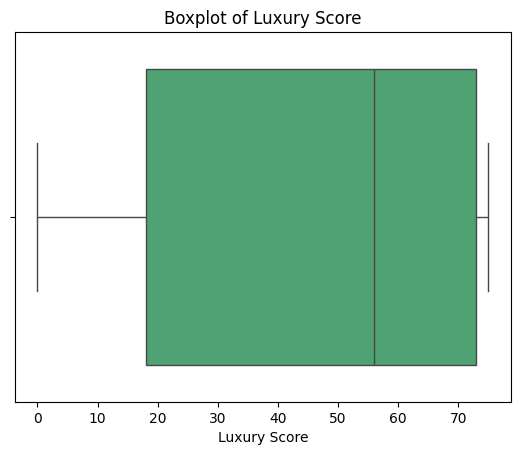

In [ ]:
sns.boxplot(
    x=df['luxury_score'],
    color='#41B06E'
)
plt.title("Boxplot of Luxury Score")
plt.xlabel("Luxury Score")
plt.show()


In [ ]:
q1=df['luxury_score'].quantile(0.25)
q3=df['luxury_score'].quantile(0.75)
iqr=q3-q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print("IQR is :",iqr)
print("Lower Bound  is :",lower_bound)
print("Upper bound is :",upper_bound)
print(df['luxury_score'].describe())


IQR is : 55.0
Lower Bound  is : -64.5
Upper bound is : 155.5
count    5731.000000
mean       45.898098
std        27.802364
min         0.000000
25%        18.000000
50%        56.000000
75%        73.000000
max        75.000000
Name: luxury_score, dtype: float64


In [ ]:
def categorize_luxury(score):
   if score < 30:
        return "Low"
   elif score <= 60:
        return "Medium"
   else:
        return "High"



In [ ]:
df['Luxury_catogory']=df['luxury_score'].apply(categorize_luxury)

In [ ]:
df[df['Luxury_catogory']=='High']['price'].sort_values()

2589     0.22
3356     0.24
1325     0.25
5800     0.27
1792     0.27
        ...  
1459    90.00
5649    90.00
974     95.00
3583    95.00
3216    99.00
Name: price, Length: 2551, dtype: float64

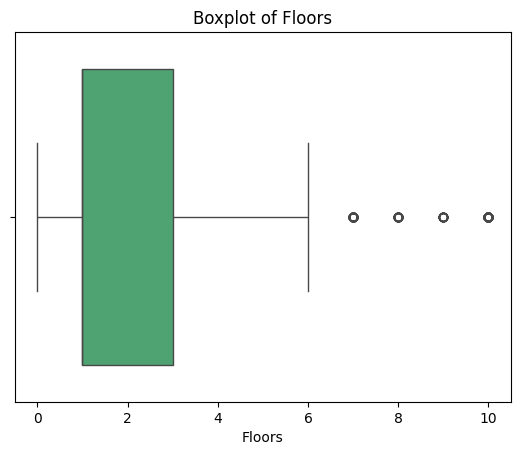

In [ ]:
sns.boxplot(
    x=df['floors'],
    color='#41B06E'
)
plt.title("Boxplot of Floors")
plt.xlabel("Floors")
plt.show()

In [ ]:
q1=df['floors'].quantile(0.25)
q3=df['floors'].quantile(0.75)
iqr=q3-q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print("IQR is :",iqr)
print("Lower Bound  is :",lower_bound)
print("Upper bound is :",upper_bound)
print(df['floors'].describe())

IQR is : 2.0
Lower Bound  is : -2.0
Upper bound is : 6.0
count    5731.000000
mean        2.087419
std         1.796603
min         0.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        10.000000
Name: floors, dtype: float64


In [ ]:
def categorize_floor(floor_number):
    if floor_number < 2:
        return "Low Floor"
    elif floor_number <= 5:
        return "Medium Floor"
    else:
        return "High Floor"

df['floor_category'] = df['floors'].apply(categorize_floor)

In [ ]:
df.head()

type  price            location  area  bedrooms  bathrooms  built_in_year  \
0  House  50.00                 E-7  48.0       4.0        5.0    2023.000000   
1   Flat   0.42                B-17   2.1       1.0        1.0    2020.700486   
2   Flat   0.55  Faisal Town - F-18   1.2       2.0        1.0    2020.700486   
3  House  11.50         DHA Defence  20.0       6.0        6.0    2024.000000   
4   Flat   1.10                I-16   6.6       4.0        4.0    2022.000000   

   kitchens  parking_spaces  store_rooms  servant_quarters  floors  furnished  \
0       2.0             7.0          1.0               2.0     1.0          0   
1       1.0             2.0          1.0               1.0     3.0          1   
2       1.0             2.0          1.0               1.0     3.0          0   
3       2.0             3.0          2.0               2.0     1.0          1   
4       1.0             1.0          1.0               1.0     6.0          1   

   luxury_score  area_sqft  price_per_sqrft Luxury_catogory floor_category  
0            68  13068.000     38261.401898            High      Low Floor  
1            35    571.725      7346.189164          Medium   Medium Floor  
2             0    326.700     16835.016835             Low   Medium Floor  
3            72   5445.000     21120.293848            High      Low Floor  
4            66   1796.850      6121.824304            High     High Floor

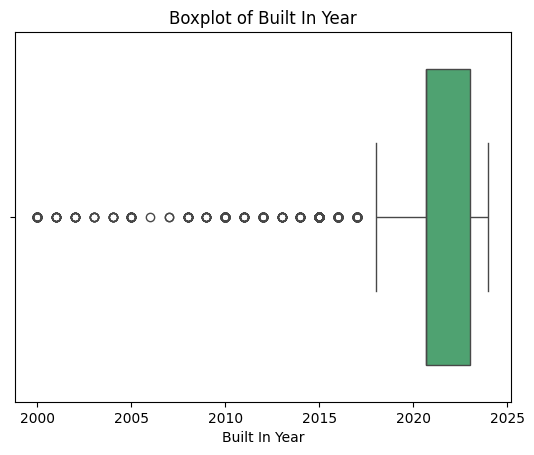

In [ ]:
sns.boxplot(
    x=df['built_in_year'],
    color='#41B06E'
)
plt.title("Boxplot of Built In Year")
plt.xlabel("Built In Year")
plt.show()

In [ ]:
q1=df['built_in_year'].quantile(0.25)
q3=df['built_in_year'].quantile(0.75)
iqr=q3-q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print("IQR is :",iqr)
print("Lower Bound  is :",lower_bound)
print("Upper bound is :",upper_bound)
print(df['built_in_year'].describe())

IQR is : 2.299514146899128
Lower Bound  is : 2017.2512146327522
Upper bound is : 2026.4492712203487
count    5731.000000
mean     2020.700486
std         3.726611
min      2000.000000
25%      2020.700486
50%      2020.700486
75%      2023.000000
max      2024.000000
Name: built_in_year, dtype: float64


In [ ]:
age_ranges = {
    "New Property": (0, 2),
    "Relatively New Property": (2, 5),
    "Moderately old Property": (5, 10),
    "Old Property": (10, 100)
}



In [ ]:
def categorize_house(year):

    age = 2024 - year  # Calculate the age of the house

    for category, range_ in age_ranges.items():
        if range_[0] <= age <= range_[1]:
            return category

    return np.NaN  # Return "None" for values outside the defined ranges


df['built_in_type'] = df['built_in_year'].apply(categorize_house)

In [ ]:
df['furnished'].value_counts()

furnished
0    3659
1    2072
Name: count, dtype: int64

In [ ]:
df['furnishing_type'] = df['furnished'].replace({0:'unfurnished',1:'furnished'})

In [ ]:
df.drop(columns=['built_in_year','furnished','floors','luxury_score','price_per_sqrft','area_sqft'],inplace=True)

In [ ]:
df.head()

type  price            location  area  bedrooms  bathrooms  kitchens  \
0  House  50.00                 E-7  48.0       4.0        5.0       2.0   
1   Flat   0.42                B-17   2.1       1.0        1.0       1.0   
2   Flat   0.55  Faisal Town - F-18   1.2       2.0        1.0       1.0   
3  House  11.50         DHA Defence  20.0       6.0        6.0       2.0   
4   Flat   1.10                I-16   6.6       4.0        4.0       1.0   

   parking_spaces  store_rooms  servant_quarters Luxury_catogory  \
0             7.0          1.0               2.0            High   
1             2.0          1.0               1.0          Medium   
2             2.0          1.0               1.0             Low   
3             3.0          2.0               2.0            High   
4             1.0          1.0               1.0            High   

  floor_category            built_in_type furnishing_type  
0      Low Floor             New Property     unfurnished  
1   Medium Floor  Relatively New Property       furnished  
2   Medium Floor  Relatively New Property     unfurnished  
3      Low Floor             New Property       furnished  
4     High Floor             New Property       furnished

## **6.2 Feature Selection**

In [ ]:
df_encoded=df.copy()
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    oe = OrdinalEncoder()
    df_encoded[col] = oe.fit_transform(df_encoded[[col]])
    print(oe.categories_)

[array(['Flat', 'House'], dtype=object)]
[array(['AGHOSH', 'Airport Enclave', 'Ali Pur', 'B-17', 'Bahria Town',
       'Bani Gala', 'Bhara kahu', 'Blue Area', 'C-18', 'CBR Town',
       'Chak Shahzad', 'Chatha Bakhtawar', 'Chattar',
       'Constitution Avenue', 'D-12', 'D-17', 'D-18', 'DHA Defence',
       'Diplomatic Enclave', 'E-11', 'E-16', 'E-17', 'E-18', 'E-7',
       'Emaar Canyon Views', 'F-10', 'F-11', 'F-15', 'F-17', 'F-5', 'F-6',
       'F-7', 'F-8', 'FECHS', 'Faisal Town - F-18',
       'Federal Government Employees Housing Foundation', 'G-10', 'G-11',
       'G-13', 'G-14', 'G-15', 'G-16', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9',
       'GT Road', 'Ghauri Town', 'Green Avenue', 'Gulberg', 'H-12',
       'H-13', 'I-10', 'I-11', 'I-12', 'I-14', 'I-16', 'I-8', 'I-9',
       'Islamabad - Murree Expressway', 'Islamabad Expressway',
       'Islamabad Highway', 'Jinnah Avenue', 'Judicial Town',
       'Karakoram Diplomatic Enclave', 'Karakoram Enclave 1',
       'Kashmir Highway', 'Kha

## **6.2.1 Technique 1: Correlation Analysis**

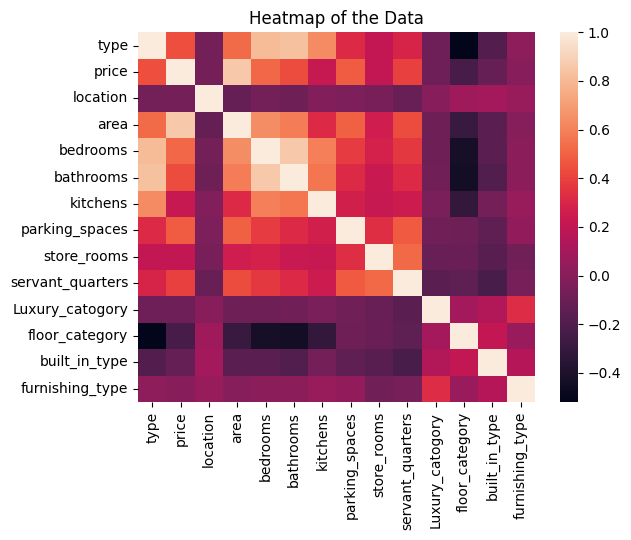

In [ ]:
sns.heatmap(
    df_encoded.corr()
)
plt.title("Heatmap of the Data")
plt.show()

In [ ]:
df_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})

feature  corr_coeff
0              price    1.000000
1           location   -0.065270
2               area    0.861114
3           bedrooms    0.516793
4          bathrooms    0.432908
5           kitchens    0.226203
6     parking_spaces    0.478464
7        store_rooms    0.207688
8   servant_quarters    0.392486
9    Luxury_catogory   -0.087739
10    floor_category   -0.231260
11     built_in_type   -0.117715
12   furnishing_type    0.002464

In [ ]:
fi_df1 = df_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

feature  corr_coeff
0              price    1.000000
1           location   -0.065270
2               area    0.861114
3           bedrooms    0.516793
4          bathrooms    0.432908
5           kitchens    0.226203
6     parking_spaces    0.478464
7        store_rooms    0.207688
8   servant_quarters    0.392486
9    Luxury_catogory   -0.087739
10    floor_category   -0.231260
11     built_in_type   -0.117715
12   furnishing_type    0.002464

## **6.2.2 Technique 2: Random Forest Feature Importance**

In [ ]:
X = df_encoded.drop(columns=['price'],axis=1)
y=df_encoded['price']

In [ ]:

rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X, y)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

feature  rf_importance
2               area       0.805145
1           location       0.137612
3           bedrooms       0.014852
6     parking_spaces       0.011057
11     built_in_type       0.006820
9    Luxury_catogory       0.005048
4          bathrooms       0.004748
5           kitchens       0.004283
8   servant_quarters       0.003878
7        store_rooms       0.003187
12   furnishing_type       0.001989
0               type       0.000816
10    floor_category       0.000565

## **6.2.3 Technique 3: Gradient Boosting Feature Importance**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor


gb_label = GradientBoostingRegressor()
gb_label.fit(X, y)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

feature  gb_importance
2               area       0.847722
1           location       0.127060
3           bedrooms       0.010153
6     parking_spaces       0.007142
8   servant_quarters       0.001909
7        store_rooms       0.001467
4          bathrooms       0.001446
9    Luxury_catogory       0.001042
11     built_in_type       0.000795
5           kitchens       0.000724
0               type       0.000420
12   furnishing_type       0.000120
10    floor_category       0.000000

In [ ]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()


selector_label = RFE(estimator, n_features_to_select=X.shape[1], step=1)
selector_label = selector_label.fit(X, y)


selected_features = X.columns[selector_label.support_]


selected_coefficients = selector_label.estimator_.feature_importances_


fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

feature  rfe_score
2               area   0.803938
1           location   0.138067
3           bedrooms   0.014904
6     parking_spaces   0.011449
11     built_in_type   0.006867
9    Luxury_catogory   0.004968
4          bathrooms   0.004708
5           kitchens   0.004409
7        store_rooms   0.003662
8   servant_quarters   0.003462
12   furnishing_type   0.001947
0               type   0.001045
10    floor_category   0.000576

In [ ]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df6,on='feature').set_index('feature')
final_fi_df


corr_coeff  rf_importance  gb_importance  rfe_score
feature                                                              
location           -0.065270       0.137612       0.127060   0.138067
area                0.861114       0.805145       0.847722   0.803938
bedrooms            0.516793       0.014852       0.010153   0.014904
bathrooms           0.432908       0.004748       0.001446   0.004708
kitchens            0.226203       0.004283       0.000724   0.004409
parking_spaces      0.478464       0.011057       0.007142   0.011449
store_rooms         0.207688       0.003187       0.001467   0.003662
servant_quarters    0.392486       0.003878       0.001909   0.003462
Luxury_catogory    -0.087739       0.005048       0.001042   0.004968
floor_category     -0.231260       0.000565       0.000000   0.000576
built_in_type      -0.117715       0.006820       0.000795   0.006867
furnishing_type     0.002464       0.001989       0.000120   0.001947

In [ ]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)
final_fi_df

corr_coeff  rf_importance  gb_importance  rfe_score
feature                                                              
location           -0.024949       0.137724       0.127113   0.138211
area                0.329155       0.805802       0.848078   0.804779
bedrooms            0.197540       0.014864       0.010157   0.014919
bathrooms           0.165476       0.004752       0.001447   0.004713
kitchens            0.086464       0.004286       0.000724   0.004413
parking_spaces      0.182890       0.011066       0.007145   0.011461
store_rooms         0.079387       0.003189       0.001468   0.003665
servant_quarters    0.150025       0.003881       0.001910   0.003465
Luxury_catogory    -0.033538       0.005052       0.001043   0.004973
floor_category     -0.088398       0.000566       0.000000   0.000576
built_in_type      -0.044996       0.006825       0.000795   0.006875
furnishing_type     0.000942       0.001991       0.000120   0.001949

In [ ]:
final_fi_df[['rf_importance','gb_importance','rfe_score',]].mean(axis=1).sort_values(ascending=False)


feature
area                0.819553
location            0.134350
bedrooms            0.013314
parking_spaces      0.009891
built_in_type       0.004832
Luxury_catogory     0.003689
bathrooms           0.003637
kitchens            0.003141
servant_quarters    0.003085
store_rooms         0.002774
furnishing_type     0.001353
floor_category      0.000381
dtype: float64

In [ ]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X, y, cv=5, scoring='r2')

In [ ]:
scores.mean()

0.9235258775323129

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X.drop(columns=['furnishing_type', 'floor_category', 'store_rooms','servant_quarters']), y, cv=5, scoring='r2')

In [ ]:
scores.mean()

0.925167115360684

In [ ]:
df_encoded=df_encoded.drop(columns=['furnishing_type', 'floor_category', 'store_rooms','servant_quarters'])

In [ ]:
df_encoded.head()

type  price  location  area  bedrooms  bathrooms  kitchens  parking_spaces  \
0   1.0  50.00      23.0  48.0       4.0        5.0       2.0             7.0   
1   0.0   0.42       3.0   2.1       1.0        1.0       1.0             2.0   
2   0.0   0.55      34.0   1.2       2.0        1.0       1.0             2.0   
3   1.0  11.50      17.0  20.0       6.0        6.0       2.0             3.0   
4   0.0   1.10      57.0   6.6       4.0        4.0       1.0             1.0   

   Luxury_catogory  built_in_type  
0              0.0            1.0  
1              2.0            3.0  
2              1.0            3.0  
3              0.0            1.0  
4              0.0            1.0

In [ ]:
df=df.drop(columns=['furnishing_type', 'floor_category', 'store_rooms','servant_quarters'])

In [ ]:
unique_values = df['location'].value_counts()[df['location'].value_counts() > 5].index
df=df[df['location'].isin(unique_values)]

In [ ]:
df.head()

type  price            location  area  bedrooms  bathrooms  kitchens  \
0  House  50.00                 E-7  48.0       4.0        5.0       2.0   
1   Flat   0.42                B-17   2.1       1.0        1.0       1.0   
2   Flat   0.55  Faisal Town - F-18   1.2       2.0        1.0       1.0   
3  House  11.50         DHA Defence  20.0       6.0        6.0       2.0   
4   Flat   1.10                I-16   6.6       4.0        4.0       1.0   

   parking_spaces Luxury_catogory            built_in_type  
0             7.0            High             New Property  
1             2.0          Medium  Relatively New Property  
2             2.0             Low  Relatively New Property  
3             3.0            High             New Property  
4             1.0            High             New Property

# **7. Machine Learning Pipeline**

In [ ]:
X=df.loc[:,df.columns!='price']
y=df['price']
y_transformed=np.log1p(y)

## **7.1 Ordinal Encoder**

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['area','bedrooms', 'bathrooms', 'kitchens', 'parking_spaces']),
        ('cat', OrdinalEncoder(), ['type','location','Luxury_catogory','built_in_type'])
    ],

    remainder='passthrough'
)


In [ ]:
# Creating a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X, y_transformed, cv=kfold, scoring='r2')

In [ ]:
scores.mean(),scores.std()

(0.8093985690166644, 0.018047294349533016)

In [ ]:
def scorer(model_name, model):

    output = []

    output.append(model_name)

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X, y_transformed, cv=kfold, scoring='r2')

    output.append(scores.mean())

    X_train, X_test, y_train, y_test = train_test_split(X,y_transformed,test_size=0.2,random_state=42)

    pipeline.fit(X_train,y_train)

    y_pred = pipeline.predict(X_test)

    y_pred = np.expm1(y_pred)

    output.append(mean_absolute_error(np.expm1(y_test),y_pred))

    return output

In [ ]:
model_dict = {
    'linear_reg':LinearRegression(),
    'decision tree': DecisionTreeRegressor(),
    'random forest':RandomForestRegressor(),
    'mlp': MLPRegressor(),
    'Knn':KNeighborsRegressor(),
    'xgboost':XGBRegressor()
}

In [ ]:
model_output = []
for model_name,model in model_dict.items():
    model_output.append(scorer(model_name, model))

model_df = pd.DataFrame(model_output, columns=['name','r2','mae'])
model_df.sort_values(['mae'])

name        r2       mae
5        xgboost  0.967181  1.253155
2  random forest  0.955028  1.343221
1  decision tree  0.922851  1.534529
4            Knn  0.920947  1.785861
3            mlp  0.880018  2.398888
0     linear_reg  0.809399  4.048250

## **7.2 OneHotEncoding**

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['area','bedrooms', 'bathrooms', 'kitchens', 'parking_spaces']),
        ('cat', OrdinalEncoder(), ['Luxury_catogory','built_in_type']),
        ('cat1',OneHotEncoder(drop='first'),['type','location'])
    ],
    remainder='passthrough'
)


In [ ]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X, y_transformed, cv=kfold, scoring='r2')

In [ ]:
def scorer(model_name, model):

    output = []

    output.append(model_name)

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # K-fold cross-validation
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X, y_transformed, cv=kfold, scoring='r2')

    output.append(scores.mean())

    X_train, X_test, y_train, y_test = train_test_split(X,y_transformed,test_size=0.2,random_state=42)

    pipeline.fit(X_train,y_train)

    y_pred = pipeline.predict(X_test)

    y_pred = np.expm1(y_pred)

    output.append(mean_absolute_error(np.expm1(y_test),y_pred))

    return output

In [ ]:
model_dict = {
    'linear_reg':LinearRegression(),
    'decision tree': DecisionTreeRegressor(),
    'random forest':RandomForestRegressor(),
    'KNN':KNeighborsRegressor(),
    'mlp': MLPRegressor(),
    'xgboost':XGBRegressor()
}

In [ ]:
model_output = []
for model_name,model in model_dict.items():
    model_output.append(scorer(model_name, model))

In [ ]:
model_df = pd.DataFrame(model_output, columns=['name','r2','mae'])
model_df.sort_values(['mae'])

name        r2       mae
5        xgboost  0.965972  1.241736
4            mlp  0.965369  1.253480
2  random forest  0.961573  1.340105
1  decision tree  0.941735  1.531666
0     linear_reg  0.937650  2.063703
3            KNN  0.905275  2.170641

## **7.3 Target Encoding**


In [ ]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.3 MB/s eta 0:00:00


In [ ]:
columns_to_encode = ['type','built_in_type']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['area','bedrooms', 'bathrooms', 'kitchens', 'parking_spaces']),
        ('cat', OrdinalEncoder(), ['Luxury_catogory']),
        ('cat1',OneHotEncoder(drop='first',sparse_output=False),columns_to_encode),
        ('target_enc', ce.TargetEncoder(), ['location'])
    ],
    remainder='passthrough'
)


In [ ]:

# Creating a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X, y_transformed, cv=kfold, scoring='r2')

In [ ]:
scores.mean(),scores.std()

(0.8901672331846517, 0.013403215561472443)

In [ ]:

def scorer(model_name, model):

    output = []

    output.append(model_name)

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # K-fold cross-validation
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X, y_transformed, cv=kfold, scoring='r2')

    output.append(scores.mean())

    X_train, X_test, y_train, y_test = train_test_split(X,y_transformed,test_size=0.2,random_state=42)

    pipeline.fit(X_train,y_train)

    y_pred = pipeline.predict(X_test)

    y_pred = np.expm1(y_pred)

    output.append(mean_absolute_error(np.expm1(y_test),y_pred))

    return output

In [ ]:
model_dict = {
    'linear_reg':LinearRegression(),
    'decision tree': DecisionTreeRegressor(),
    'random forest':RandomForestRegressor(),
    'KNN':KNeighborsRegressor(),
    'mlp': MLPRegressor(),
    'xgboost':XGBRegressor()
}

In [ ]:
model_output = []
for model_name,model in model_dict.items():
    model_output.append(scorer(model_name, model))

In [ ]:
model_df = pd.DataFrame(model_output, columns=['name','r2','mae'])
model_df.sort_values(['mae'])

name        r2       mae
5        xgboost  0.968814  1.171554
2  random forest  0.964073  1.270735
1  decision tree  0.938097  1.545138
4            mlp  0.916940  1.975443
3            KNN  0.896257  2.078505
0     linear_reg  0.890167  2.586898

Hyper paramter Tuning

In [ ]:
param_grid = {
    'regressor__n_estimators': [50, 100, 200, 300],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__max_samples':[0.1, 0.25, 0.5, 1.0],
    'regressor__max_features': ['auto', 'sqrt']
}

In [ ]:
columns_to_encode = ['type','built_in_type']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['area','bedrooms', 'bathrooms', 'kitchens', 'parking_spaces']),
        ('cat', OrdinalEncoder(), ['Luxury_catogory']),
        ('cat1',OneHotEncoder(drop='first',sparse_output=False),columns_to_encode),
        ('target_enc', ce.TargetEncoder(), ['location'])
    ],
    remainder='passthrough'
)


In [ ]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
search = GridSearchCV(pipeline, param_grid, cv=kfold, scoring='r2', n_jobs=-1, verbose=4)

In [ ]:
search.fit(X, y_transformed)

Fitting 10 folds for each of 128 candidates, totalling 1280 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['area',
                                                                          'bedrooms',
                                                                          'bathrooms',
                                                                          'kitchens',
                                                                          'parking_spaces']),
                                                                        ('cat',
                                                                         OrdinalEncoder(),
                                                                         ['Luxury_catogory']),
                                                                        ('cat1',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         ['type',
                                                                          'built_in_type']),
                                                                        ('target_enc',
                                                                         TargetEncoder(),
                                                                         ['location'])])),
                                       ('regressor', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [None, 10, 20, 30],
                         'regressor__max_features': ['auto', 'sqrt'],
                         'regressor__max_samples': [0.1, 0.25, 0.5, 1.0],
                         'regressor__n_estimators': [50, 100, 200, 300]},
             scoring='r2', verbose=4)

In [ ]:
final_pipe = search.best_estimator_

In [ ]:
search.best_params_

{'regressor__max_depth': 20,
 'regressor__max_features': 'auto',
 'regressor__max_samples': 1.0,
 'regressor__n_estimators': 300}

In [ ]:
search.best_score_

0.96428281842263

In [ ]:
final_pipe.fit(X,y_transformed)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['area', 'bedrooms',
                                                   'bathrooms', 'kitchens',
                                                   'parking_spaces']),
                                                 ('cat', OrdinalEncoder(),
                                                  ['Luxury_catogory']),
                                                 ('cat1',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['type', 'built_in_type']),
                                                 ('target_enc', TargetEncoder(),
                                                  ['location'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=20, max_features='auto',
                                       max_samples=1.0, n_estimators=300))])

In [ ]:

import category_encoders as ce


columns_to_encode = ['type','built_in_type']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['area','bedrooms', 'bathrooms', 'kitchens', 'parking_spaces']),
        ('cat', OrdinalEncoder(), ['Luxury_catogory']),
        ('cat1',OneHotEncoder(drop='first',sparse_output=False),columns_to_encode),
        ('target_enc', ce.TargetEncoder(), ['location'])
    ],
    remainder='passthrough'
)


In [ ]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor())
])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y_transformed,test_size=0.2,random_state=42)

pipeline.fit(X_train,y_train)

y_pred = pipeline.predict(X_test)

y_pred = np.expm1(y_pred)

mean_absolute_error(np.expm1(y_test),y_pred)

1.1715537992312488

In [ ]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

In [ ]:
with open('df.pkl', 'wb') as file:
    pickle.dump(X, file)

In [ ]:
data = [['House', 'F-6', 17.5, 6,6, 2,2,'High','Relatively New Property']]
columns = ['type', 'location', 'area', 'bedrooms', 'bathrooms', 'kitchens',
       'parking_spaces', 'Luxury_catogory',
       'built_in_type']

# Convert to DataFrame
one_df = pd.DataFrame(data, columns=columns)

one_df

type location  area  bedrooms  bathrooms  kitchens  parking_spaces  \
0  House      F-6  17.5         6          6         2               2   

  Luxury_catogory            built_in_type  
0            High  Relatively New Property

In [ ]:
with open('/content/model.pkl', 'rb') as file:
    pipe = pickle.load(file)



In [ ]:
np.expm1(pipe.predict(one_df))

array([3.5738022], dtype=float32)